# Introduction

This project aims to analyze prices and locations of Airbnbs using Airbnb data of Chicago, as well as other data sources about Chicago, mainly crime data. The following 12 suggested questions from the instructions should give an introduction to our project (in addition to the report):

1. **Which dataset(s) did you choose? Why?** <br>
   We used essentially three types of data:
   - Airbnb *listings data* (each row is an Airbnb with a number of attributes including geographic information via longitude and latitude values).
   - *Crime data* (each row is a crime incident with a number of attributes, including geographic information via longitude and latitude values).
   - Chicago city data (labeled as "*population data*"; it contains geographic data of Chicago as GeoPandas polygons, including population data. This data serves as a common ground for merging Airbnb and crime data).

2. **How did you clean/transform the data? Why?** <br>
   Thankfully, most of the data was already quite "clean." The main challenge was obtaining the correct geospheric projection of longitude-latitude pairs. In order to make meaningful joins of the data, they all need to be transformed to a common projection (we used this one: [https://epsg.io/26916](https://epsg.io/26916)). Also, in the listings data, one Airbnb was listed with a price of $9999999, which we had to get rid of for obvious reasons. Afterward, we only did variable selection and filtering of rows for the EDA and modeling steps.

3. **How did you solve the problem of missing values? Why?** <br>
   There were barely any missing values, which we dropped. We didn't think this would impact the analyses as it was much less than 1%.

4. **What questions did you ask of the data?**
   - Q1: Can we analyze and predict the locations of Airbnbs within Chicago? <br>
   - Q2: What are the influencing factors behind Airbnb prices, and can we model this meaningfully? <br>

5. **Why were these good questions?**
   - Relevance: Addresses a practical concern in the Airbnb market—location prediction and understanding price determinants are crucial for stakeholders.
   - Applicability: They provide insights for users, hosts, and policymakers in the Airbnb ecosystem.
   - Complexity: Many factors, such as crime rates, population data, and competition, making the study comprehensive.
   - Practical Impact: Outcomes could have practical implications for users looking to book Airbnbs, hosts setting prices, and authorities planning urban development.

6. **What were the answers to these questions?**
   - **ad (q1)** While we were able to analyze the average prices per grid cell (left plot), we discovered a high density of Airbnbs in the north of the map. However, this observation is only partially useful as an explanatory variable, as higher density in Airbnbs also results in higher competition and thus self-regulation in the prices. Conversely, we observed that the density of homicides is much higher in the southwest of Chicago. This, however, is one of the top 10 most relevant features, as we discovered in our combined model.
   - **ad (q2)** The analysis aims to predict Airbnb prices using different combinations of features. Three sets of features (10, 15, and 20) were evaluated with the Random Forest, Linear Regression, and XGBRegressor models. The results reveal an improvement in performance with an increasing number of features, especially with 20 features. The Random Forest model outperforms the others, showing a net with a positive r2_score, suggesting a better fit to the data. Potential reasons for these findings could include the inherent complexity of relationships between Airbnb location features and price. Adding more features may have allowed the models, particularly Random Forest, to better capture the variability in the data. However, this can also lead to overfitting to the training data, hence the need for validation on independent test datasets. Alternatively, the models' moderate performance may be explained by the essentially complex and dynamic nature of the Airbnb rental market, where many factors can influence prices and more likely models are needed to capture these nuances. Parameter adjustments, deeper exploration of features, and use of advanced techniques could also help improve Airbnb price prediction.

7. **How did you obtain them?**
   - **ad (q1)** was basically obtained by the visualizations we created.
   - **ad (q2)** has more "proof" as we have performance measures for our models.

8. **Do the answers make sense?**
   - Overall, most of the results were expected but actually, the **unimportance** of some features surprised us (e.g., the amount of people is not that relevant for predicting the price).

9. **Were there any difficulties in analyzing the data? What were the key insights obtained?**
   - One major problem was the size of the initial crime dataset. 
   - The amenity column was a string of a list like "[]" and hat to be unpacked and then pivoted to a dummy dataframe to be analyzed properly. 
   - Price had to be converted to float (was string before with $ sign)
   
   As for key insights: 
   
   ● Higher Airbnb density in the north, but competition is a problem. 
   
   ● Homicide density is a good predictor of prices. 
   
   ● Random Forest model outperformed others in price prediction.

10. **What are potential biases in the data and analysis?**
    - We only tested our model for the city of Chicago and did not apply it to other cities, so we are not sure how well it generalizes. However, this would have extended the scope of this assignment a fair bit, so we accepted this Closed Classification World Assumption.

11. **Which Data Science tools and techniques were learned during this exercise?**
    - Associate Rule Learning, Geocoder, Uszipcode, K-Means-Clustering

12. **How was the work divided up between the members of the group?**
    - Overall, everyone was involved in all main processes (from finding datasets, finding questions, to preprocessing, EDA, model training, creating the slides and the report). We utilized tools that allowed us to work on projects simultaneously, we used WhatsApp for communication, had Zoom calls, or met in the old-fashioned way in the "Bib" to work on it together.


# **Table of Contents**

- **[1. Load and Process Data](#load-and-process-data)**
    - **[1.1. Airbnb data](#airbnb-data)**
    - **[1.2. Crime data](#crime-data)**
        - **[1.2.1. Filter](#filter)**
    - **[1.3. Population data](#population-data)**
    - **[1.4. Additional City data](#additional-city-data)**
- **[2. Exploratory Data Analysis (EDA)](#exploratory-data-analysis)**
    - **[2.1. Geographic EDA](#geographic-eda)**
    - **[2.2. Non-Geographic EDA](#non-geographic-eda)**
- **[3. In-Depth Analysis & Modeling - Airbnb Locations](#in-depth-analysis-airbnb-locations)**
- **[4. In-Depth Analysis & Modeling - Airbnb Prices](#in-depth-analysis-airbnb-prices)**
    - **[4.1. K-means clustering](#k-means-clustering)**
        - **[4.1.1. Data Processing steps](#data-processing-steps)**
        - **[4.1.2. The Model](#the-model)**
    - **[4.2. Associate Rule Learning (unsupervised co-occurence analysis)](#associate-rule-learning)**
    - **[4.3. Supervised learning](#supervised-learning)**
        - **[4.3.1. Data processing](#data-processing)**
        - **[4.3.2. Train-test split](#train-test-split)**
        - **[4.3.3. Choosing suitable ML](#choosing-suitable-ml)**
        - **[4.3.4. Feature Selection](#feature-selection)**
        - **[4.3.5. Scale features](#scale-features)**
- **[5. Metrics & Evaluation](#metrics-evaluation)**

In [126]:
!jupyter nbconvert --to html "main copy.ipynb" --output "AirBnB-Crime-Analysis.html"

[NbConvertApp] Converting notebook main copy.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 28 image(s).
[NbConvertApp] Writing 6954110 bytes to AirBnB-Crime-Analysis.html


In [18]:
!pip install -r requirements.txt

  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
INFO: pip is looking at multiple versions of jupyterlab-server to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jupyterlab-server to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
INFO: pip is looking at multiple versions of notebook to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of notebook to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking lo

In [2]:
import os
import geopandas as gpd
import geohash #--> !pip install python-geohash 
import gzip
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns
from shapely.geometry import Point, Polygon
from shapely import wkt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import ggplot, aes, geom_point, geom_smooth, facet_wrap, geom_text, theme
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from geopy.geocoders import Nominatim
from uszipcode import SearchEngine
import plotly.express as px
from sodapy import Socrata # crime data API
import requests
from io import StringIO
import gdown


/Users/markus/GitHub/VIZZ/AirBnB/AIRBNBVENV/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning


In [3]:
########################### AIRBNB DATA ##########################################################################################################
# source 1+2+3: http://insideairbnb.com/get-the-data/


airbnb_data_path = "./data/airbnb_data/"
listings_csv_path = airbnb_data_path + "listings.csv.gz"
############################ CRIME DATA ##########################################################################################################
crime_data_path = "./data/crime_data/"
# source 1: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
response = requests.get('https://data.cityofchicago.org/resource/ijzp-q8t2.csv')
assert response.status_code == 200
data = response.content.decode('utf-8')
df = pd.read_csv(StringIO(data))
# df.to_csv(crime_data_path + "Crimes_-_2001_to_Present.csv") # uncomment to store data
#crime_csv_path = crime_data_path + "Crimes_-_2001_to_Present.csv"
# source 2: https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e/
# below: retrieve first 1000 rows
file_id = '1Nl7eEWJFA8709eAy9EbdAXi7ZORRul0n'
output_file = 'crime.csv'

# Download the file from Google Drive
if not os.path.exists(output_file):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

response = requests.get('https://data.cityofchicago.org/resource/c7ck-438e.csv')
assert response.status_code == 200
data = response.content.decode('utf-8')
df = pd.read_csv(StringIO(data))
df.to_csv(crime_data_path + "Chicago_Police_Department_-_Illinois_Uniform_Crime_Reporting__IUCR__Codes.csv") 
crime_codes_csv_path = crime_data_path + "Chicago_Police_Department_-_Illinois_Uniform_Crime_Reporting__IUCR__Codes.csv"

########################### POPULATION DATA ########################################################################################################
population_data_path = "./data/population_data/"
# source 1: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Population-by-2010-Census-Block/5yjb-v3mj/about_data 
population_census_csv_path = population_data_path + "Population_by_2010_Census_Block.csv"
# source 2: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik 
census_boundaries_csv_path = population_data_path + "CensusTractsTIGER2010.csv"

# 1. Load and Process Data
<a id='load-and-process-data'></a>

## 1.1. Airbnb data
<a id='airbnb-data'></a>

In [5]:
with gzip.open(listings_csv_path, 'rt', encoding='utf-8') as f:
    file_content = f.read()

df_listings = pd.read_csv(listings_csv_path, compression='gzip', header=0, sep=',', quotechar='"')

# df_listings = pd.read_csv(listings_csv_path)
# df_listings.columns

In [6]:
# get rid of the dollar signs
df_listings = df_listings.dropna(subset=['price'])  # remove missings
df_listings['price'] = df_listings['price'].astype(str)
df_listings['price'] = df_listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

# listings data as gdf
gdf_listings = gpd.GeoDataFrame(df_listings, geometry=gpd.points_from_xy(df_listings.longitude, df_listings.latitude))
gdf_listings.crs = 'EPSG:4326'
gdf_listings.to_crs(epsg=26916, inplace=True)  # common projection

# remove one outlier value (faulty data?)
gdf_listings = gdf_listings[gdf_listings['price'] <= 10000]

# only keep certain columns for now
# gdf_listings_filtered = gdf_listings[['geometry', 'accommodates', 'price', 'review_scores_location', 'review_scores_rating', 'reviews_per_month']].copy()
gdf_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
#calculate correlations
print(gdf_listings['price'].corr(gdf_listings['beds']))
print(gdf_listings['price'].corr(gdf_listings['bedrooms']))
print(gdf_listings['price'].corr(gdf_listings['accommodates']))
print(gdf_listings['price'].corr(gdf_listings['number_of_reviews']))
print(gdf_listings['price'].corr(gdf_listings['review_scores_rating']))
print(gdf_listings['price'].corr(gdf_listings['review_scores_accuracy']))
print(gdf_listings['price'].corr(gdf_listings['review_scores_cleanliness']))

0.39983311251999737
0.4389075733734059
0.4951626630592687
-0.06226923929452505
0.06397931465624156
0.050697341741963234
0.09205110004297448


## 1.2. Crime data
<a id='crime-data'></a>

In [7]:
df_crime = pd.read_csv('crime.csv')
len(df_crime.index)
#It has 8 million rows! Need to reduce this for now to have quicker processing/visualizations.

7975195

In [8]:
# rename columns for consistency
df_crime.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)
df_crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'latitude', 'longitude',
       'Location'],
      dtype='object')

In [8]:
# types of crime
print(len(df_crime["Primary Type"].unique()))
df_crime["Primary Type"].unique()

36


array(['ASSAULT', 'HOMICIDE', 'BURGLARY', 'BATTERY', 'THEFT',
       'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'CRIMINAL SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'SEX OFFENSE', 'OTHER OFFENSE', 'WEAPONS VIOLATION', 'STALKING',
       'CRIMINAL TRESPASS', 'PROSTITUTION', 'ARSON', 'NARCOTICS',
       'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'OBSCENITY', 'LIQUOR LAW VIOLATION', 'INTIMIDATION', 'GAMBLING',
       'HUMAN TRAFFICKING', 'CRIM SEXUAL ASSAULT',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'RITUALISM', 'DOMESTIC VIOLENCE',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

### 1.2.1 Filter
<a id='filter'></a>

In [9]:
df_crime['Date'] = pd.to_datetime(df_crime['Date'], format='%m/%d/%Y %I:%M:%S %p')
df_crime_recent = df_crime[df_crime['Date'].dt.year >= 2018] # only take last n years for now

crimes_to_inspect = ["HOMICIDE"]  # a list of crime types from the "Primary Type" column
df_crime_recent = df_crime_recent[df_crime_recent["Primary Type"].isin(crimes_to_inspect)]
df_crime_recent = df_crime_recent[~df_crime_recent['Domestic']]

# randomly sample a fraction for reduced size
df_crime_recent_sampled = df_crime_recent # .sample(frac=0.30, random_state=1)

# remove strange location outliers
df_crime_recent_sampled = df_crime_recent_sampled[
    (df_crime_recent_sampled['latitude'] >= 41) & 
    (df_crime_recent_sampled['latitude'] <= 42.5) & 
    (df_crime_recent_sampled['longitude'] >= -88.5) &      
    (df_crime_recent_sampled['longitude'] <= -87)]

gdf_crime = gpd.GeoDataFrame(df_crime_recent_sampled, geometry=[Point(xy) for xy in zip(df_crime_recent_sampled.longitude, df_crime_recent_sampled.latitude)])

# change projection
gdf_crime.set_crs(epsg=4326, inplace=True)  # set the original CRS to EPSG:4326
gdf_crime = gdf_crime.to_crs(epsg=26916)  # reproject to EPSG:26916

gdf_crime_filtered = gdf_crime[['ID', 'Date', 'IUCR', 'Primary Type', 
                                      'Description', 'Location Description', 'geometry']].copy()

gdf_crime_filtered = gdf_crime_filtered[gdf_crime_filtered['Description'] == 'FIRST DEGREE MURDER']
gdf_crime_filtered

ID                Date  IUCR Primary Type          Description  \
1       25953 2021-05-24 15:06:00  0110     HOMICIDE  FIRST DEGREE MURDER   
2       26038 2021-06-26 09:24:00  0110     HOMICIDE  FIRST DEGREE MURDER   
84      26262 2021-09-08 16:45:00  0110     HOMICIDE  FIRST DEGREE MURDER   
905     27854 2023-11-10 21:26:00  0110     HOMICIDE  FIRST DEGREE MURDER   
922     27742 2023-06-24 01:23:00  0110     HOMICIDE  FIRST DEGREE MURDER   
...       ...                 ...   ...          ...                  ...   
237287  25596 2020-11-06 02:22:00  0110     HOMICIDE  FIRST DEGREE MURDER   
237375  27289 2023-01-06 21:25:00  0110     HOMICIDE  FIRST DEGREE MURDER   
237432  25460 2020-09-12 23:18:00  0110     HOMICIDE  FIRST DEGREE MURDER   
237476  27015 2022-08-31 09:30:00  0110     HOMICIDE  FIRST DEGREE MURDER   
237594  27577 2023-06-20 12:42:00  0110     HOMICIDE  FIRST DEGREE MURDER   

       Location Description                        geometry  
1                    STREET  POINT (437311.776 4640930.236)  
2               PARKING LOT  POINT (440917.058 4649491.537)  
84                 CAR WASH  POINT (438307.241 4635964.141)  
905                  STREET  POINT (444675.160 4652245.615)  
922                   ALLEY  POINT (436898.424 4636352.921)  
...                     ...                             ...  
237287                 AUTO  POINT (444210.296 4624412.403)  
237375                HOUSE  POINT (445391.649 4626865.081)  
237432               STREET  POINT (436670.709 4637818.552)  
237476          GAS STATION  POINT (448344.068 4614689.311)  
237594               STREET  POINT (440097.024 4636285.554)  

[3738 rows x 7 columns]

In [10]:
value_counts = gdf_crime_filtered['Location Description'].value_counts()
print(value_counts.head(20))

Location Description
STREET                      2151
AUTO                         290
ALLEY                        236
APARTMENT                    216
PORCH                        116
HOUSE                        113
YARD                         108
PARKING LOT                  101
GAS STATION                   43
PARK PROPERTY                 41
VACANT LOT                    37
RETAIL STORE                  29
GAS STATION DRIVE/PROP.       27
HALLWAY                       23
GARAGE                        19
CHA PARKING LOT               18
RESTAURANT                    17
BARBER SHOP/BEAUTY SALON      14
HOTEL                         10
VESTIBULE                     10
Name: count, dtype: int64


## 1.3. Population data
<a id='population-data'></a>

Merge two data sets to get areas (districts) as well as their population.

In [11]:
df_population_census = pd.read_csv(population_census_csv_path)
df_population_census

CENSUS BLOCK  CENSUS BLOCK FULL  TOTAL POPULATION
0         310003002    170310310003002               104
1         310003003    170310310003003                46
2         310003004    170310310003004                40
3         310003005    170310310003005                58
4         310003006    170310310003006                75
...             ...                ...               ...
46286    8419002052    170318419002052                 0
46287    8419002053    170318419002053                32
46288    8419002054    170318419002054               131
46289    8419002055    170318419002055                79
46290    8419002056    170318419002056                20

[46291 rows x 3 columns]

In [12]:
df_population_census["TOTAL POPULATION"].sum() # corresponds to Chicago population

2695598

In [13]:
df_population_census['CENSUS BLOCK FULL'] = df_population_census['CENSUS BLOCK FULL'].astype(str)
df_population_census['GEOID10_Subset'] = df_population_census['CENSUS BLOCK FULL'].str[:11]

df_census_grouped = df_population_census.groupby('GEOID10_Subset')['TOTAL POPULATION'].sum().reset_index()
df_census_grouped

GEOID10_Subset  TOTAL POPULATION
0      17031010100              4854
1      17031010201              6450
2      17031010202              2818
3      17031010300              6236
4      17031010400              5042
..             ...               ...
802    17031843700              2117
803    17031843800              2110
804    17031843900              3533
805    17031980000                 0
806    17031980100                 0

[807 rows x 2 columns]

In [14]:
df_census_boundaries = pd.read_csv(census_boundaries_csv_path)
df_census_boundaries['the_geom'] = df_census_boundaries['the_geom'].apply(wkt.loads)
gdf_census_boundaries = gpd.GeoDataFrame(df_census_boundaries, geometry='the_geom')
gdf_census_boundaries

the_geom  STATEFP10  COUNTYFP10  \
0    MULTIPOLYGON (((-87.62405 41.73022, -87.62405 ...         17          31   
1    MULTIPOLYGON (((-87.68608 41.82296, -87.68607 ...         17          31   
2    MULTIPOLYGON (((-87.62935 41.85280, -87.62934 ...         17          31   
3    MULTIPOLYGON (((-87.68813 41.85569, -87.68816 ...         17          31   
4    MULTIPOLYGON (((-87.63312 41.87449, -87.63306 ...         17          31   
..                                                 ...        ...         ...   
796  MULTIPOLYGON (((-87.65746 41.93258, -87.65722 ...         17          31   
797  MULTIPOLYGON (((-87.66349 41.93036, -87.66350 ...         17          31   
798  MULTIPOLYGON (((-87.71436 41.98300, -87.71472 ...         17          31   
799  MULTIPOLYGON (((-87.71317 41.85523, -87.71357 ...         17          31   
800  MULTIPOLYGON (((-87.71129 41.79340, -87.71090 ...         17          31   

     TRACTCE10      GEOID10  NAME10         NAMELSAD10  COMMAREA  COMMAREA_N  \
0       842400  17031842400  8424.0  Census Tract 8424        44          44   
1       840300  17031840300  8403.0  Census Tract 8403        59          59   
2       841100  17031841100  8411.0  Census Tract 8411        34          34   
3       841200  17031841200  8412.0  Census Tract 8412        31          31   
4       839000  17031839000  8390.0  Census Tract 8390        32          32   
..         ...          ...     ...                ...       ...         ...   
796      70400  17031070400   704.0   Census Tract 704         7           7   
797      70500  17031070500   705.0   Census Tract 705         7           7   
798     130300  17031130300  1303.0  Census Tract 1303        13          13   
799     292200  17031292200  2922.0  Census Tract 2922        29          29   
800     630900  17031630900  6309.0  Census Tract 6309        63          63   

    NOTES  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
..    ...  
796   NaN  
797   NaN  
798   NaN  
799   NaN  
800   NaN  

[801 rows x 10 columns]

In [15]:
# join the data
gdf_census_boundaries['GEOID10'] = gdf_census_boundaries['GEOID10'].astype(str)
gdf_population_merged = gdf_census_boundaries.merge(df_census_grouped, left_on='GEOID10', right_on='GEOID10_Subset', how='left')

# we only need a few columns
selected_columns = ['the_geom', 'GEOID10', 'TOTAL POPULATION']  
gdf_population_merged = gdf_population_merged[selected_columns]

# obtain polygon area
gdf_population_merged.crs = 'EPSG:4326'
gdf_population_merged.to_crs(epsg=26916, inplace=True)
gdf_population_merged['Area_km2'] = gdf_population_merged['the_geom'].area / 1e6

# population density
gdf_population_merged['Population_Density'] = gdf_population_merged['TOTAL POPULATION'] / gdf_population_merged['Area_km2']
gdf_population_merged # FINAL POPULATION GDF

the_geom      GEOID10  \
0    MULTIPOLYGON (((448099.985 4620011.369, 448099...  17031842400   
1    MULTIPOLYGON (((443023.106 4630347.019, 443024...  17031840300   
2    MULTIPOLYGON (((447758.910 4633624.092, 447759...  17031841100   
3    MULTIPOLYGON (((442881.562 4633982.840, 442880...  17031841200   
4    MULTIPOLYGON (((447463.312 4636034.682, 447468...  17031839000   
..                                                 ...          ...   
796  MULTIPOLYGON (((445493.406 4642499.467, 445512...  17031070400   
797  MULTIPOLYGON (((444991.000 4642257.173, 444990...  17031070500   
798  MULTIPOLYGON (((440822.244 4648135.181, 440793...  17031130300   
799  MULTIPOLYGON (((440802.854 4633948.727, 440770...  17031292200   
800  MULTIPOLYGON (((440902.402 4627082.334, 440934...  17031630900   

     TOTAL POPULATION  Area_km2  Population_Density  
0                3304  1.967197         1679.547464  
1                3950  0.830626         4755.450572  
2                7254  1.142409         6349.739874  
3                5262  0.624955         8419.804840  
4                7311  0.516078        14166.465239  
..                ...       ...                 ...  
796              2984  0.324134         9206.075171  
797              2928  0.305194         9593.884111  
798              5064  0.720585         7027.623420  
799              2961  0.397729         7444.769197  
800              5363  0.659286         8134.552157  

[801 rows x 5 columns]

In [16]:
# validity checks
print("Total Area of Chicago", gdf_population_merged["Area_km2"].sum())
print("Total Population of Chicago", gdf_population_merged["TOTAL POPULATION"].sum())

Total Area of Chicago 627.184916230284
Total Population of Chicago 2695598


--> the whole population got matched to a polygon (it matches the sum from before). Great!

The numbers for population and area roughly add up to the correct amount (https://en.wikipedia.org/wiki/Chicago)

## 1.4. Additional City data
<a id='additional-city-data'></a>

In [17]:
# Parks
# https://data.cityofchicago.org/Parks-Recreation/Parks-Shapefiles-deprecated-November-2016-/5msb-wbxn/about_data
gdf_parks = gpd.read_file(population_data_path + 'Parks_Aug2012.shp')
gdf_parks.crs = 'EPSG:3435'
gdf_parks.to_crs(epsg=26916, inplace=True)  # common projection
gdf_parks.head(2)

PARK_NO          PARK            LOCATION    ZIP  ACRES  WARD  \
0   1220.0  LEVIN (JOHN)      462 N PINE AVE  60644   5.76  37.0   
1   1149.0   SAINT LOUIS  347 N ST LOUIS AVE  60624   0.37  28.0   

       PARK_CLASS        LABEL  WHEELCHR_A  ALFRED_CAL  ...  LAGOON  CAROUSEL  \
0  COMMUNITY PARK        Levin           0           0  ...       0      None   
1       MINI-PARK  Saint Louis           0           0  ...       0      None   

   CROQUET  GOLF_COU_1  HARBOR  MODEL_TRAI  MODEL_YACH  NATURE_BIR  \
0     None        None    None        None        None        None   
1     None        None    None        None        None        None   

   CRICKET_FI                                           geometry  
0           0  POLYGON ((436684.676 4637712.287, 436903.835 4...  
1           0  POLYGON ((440802.126 4637533.483, 440801.359 4...  

[2 rows x 77 columns]

In [ ]:
# Boulevards
# https://data.cityofchicago.org/Environment-Sustainable-Development/Open-Spaces-Boulevards-KML/uhyd-nthd/about_data --> select shp (not kml) file from this site
gdf_boulevards = gpd.read_file(population_data_path + 'DATA_ADMIN_OPNSP_BOULEVARDS.shp')
gdf_boulevards.crs = 'EPSG:3435'
gdf_boulevards.to_crs(epsg=26916, inplace=True)  # common projection
gdf_boulevards.head(2)

ID   SQ_FOOTAGE  ACREAGE  CA     SHAPE_AREA     SHAPE_LEN  \
0   0  918222.1731    21.08  23  918222.184638  35404.355558   
1   0  102764.8106     2.36  24  102764.817307   3422.576960   

                                            geometry  
0  MULTIPOLYGON (((441691.13 4638816.453, 441724....  
1  MULTIPOLYGON (((441795.549 4640256.285, 441804...

In [26]:
# Riverwalks
# https://data.cityofchicago.org/Environment-Sustainable-Development/Open-Spaces-Riverwalk-KML/22bv-uv6r/about_data --> select shp (not kml) file from this site 
gdf_riverwalks = gpd.read_file(population_data_path + 'DATA_ADMIN_OPNSP_RIVERWALK.shp')
gdf_riverwalks.crs = 'EPSG:3435'
gdf_riverwalks.to_crs(epsg=26916, inplace=True)  # common projection
gdf_riverwalks.head(2)

AttributeError: module 'fiona' has no attribute 'path'

# 2. Exploratory Data Analysis (EDA)
<a id='exploratory-data-analysis'></a>

Now we have 3 main dataframes:
* `gdf_listings` (Airbnb data)
* `gdf_crime_filtered` (Crime data)
* `gdf_population_merged` (Population/geographic data)

Moreover, 3 "side" dataframes: `gdf_parks`, `gdf_boulevards`, `gdf_riverwalks`

## 2.1. Geographic EDA
<a id='geographic-eda'></a>

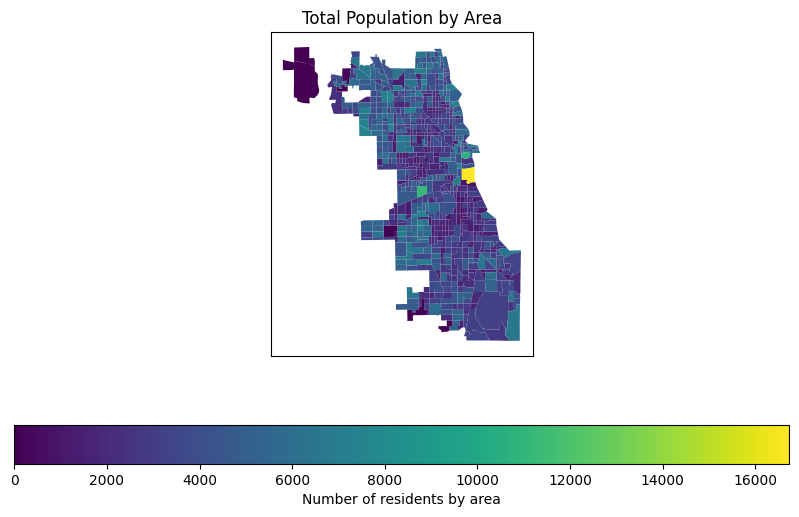

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_population_merged.plot(column='TOTAL POPULATION', ax=ax, legend=True,
                          legend_kwds={'label': "Number of residents by area",
                                       'orientation': "horizontal"})
plt.title('Total Population by Area')

# remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.show()

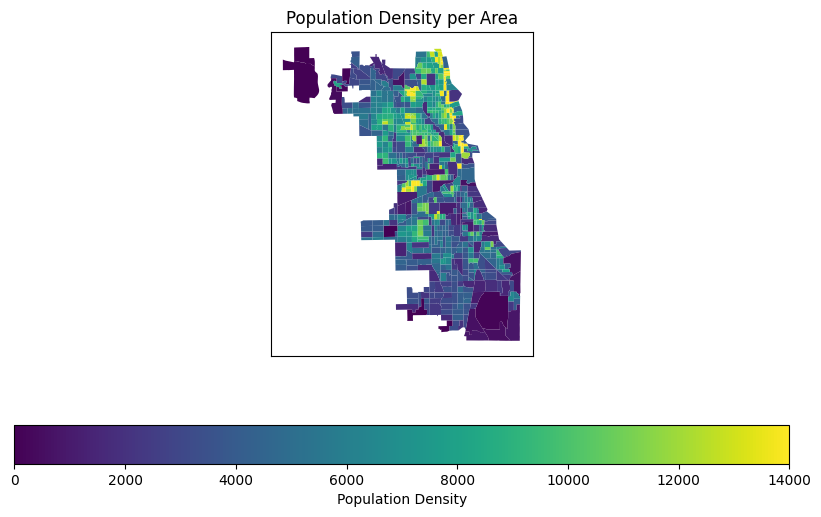

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_population_merged.plot(column='Population_Density', ax=ax, legend=True,
                          vmin=0, vmax=14000,  # adjust scale
                          legend_kwds={'label': "Population Density",
                                       'orientation': "horizontal"})
plt.title('Population Density per Area')
# remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.show()

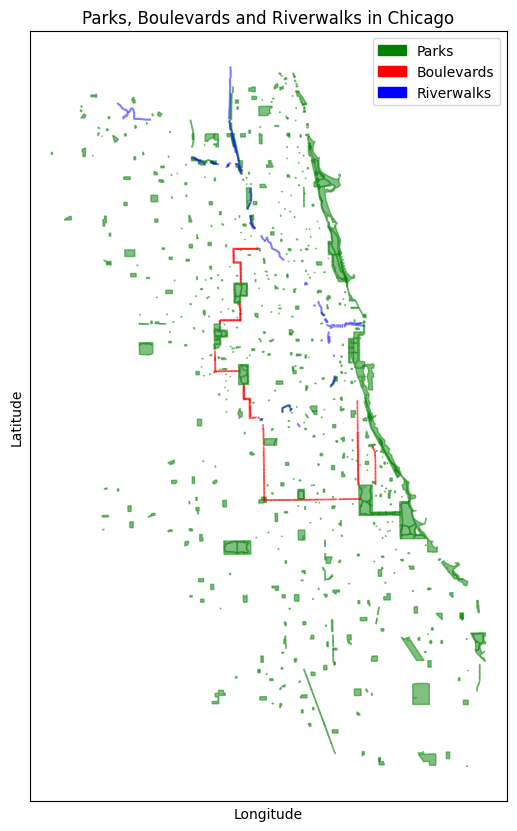

In [26]:
# plot all three
fig, ax = plt.subplots(figsize=(10, 10))

gdf_parks.plot(ax=ax, color='green', edgecolor='green', alpha=0.5)
gdf_boulevards.plot(ax=ax, color='red', edgecolor='red', alpha=0.5)
gdf_riverwalks.plot(ax=ax, color='blue', edgecolor='blue', alpha=0.5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title('Parks, Boulevards and Riverwalks in Chicago')
# plt.legend(['Parks', 'Boulevards', 'Riverwalks'])
park_patch = mpatches.Patch(color='green', label='Parks')
boulevard_patch = mpatches.Patch(color='red', label='Boulevards')
riverwalk_patch = mpatches.Patch(color='blue', label='Riverwalks')
plt.legend(handles=[park_patch, boulevard_patch, riverwalk_patch])

plt.show()

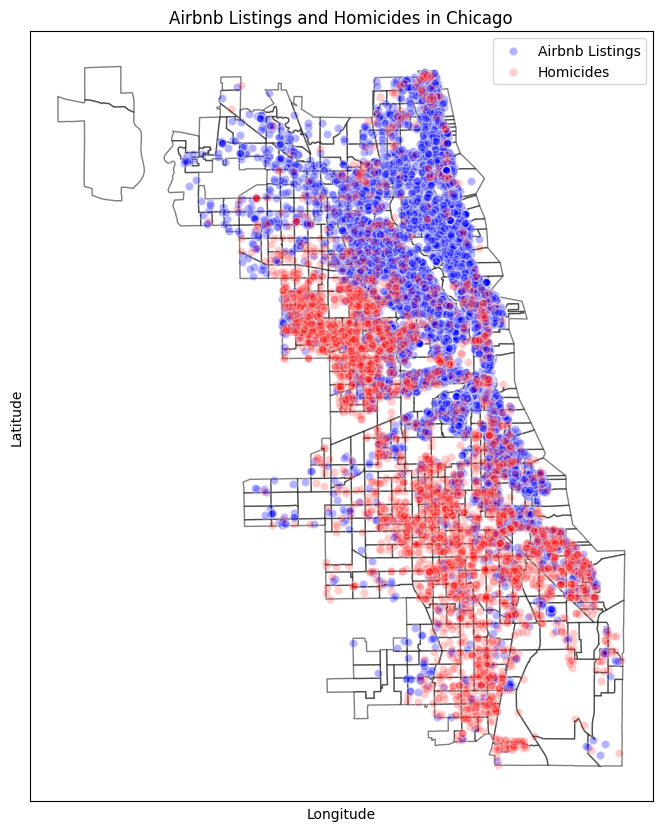

In [27]:
from matplotlib import colors


fig, ax = plt.subplots(figsize=(10, 10))

gdf_population_merged.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)
gdf_listings.plot(ax=ax, color='blue', edgecolor='white', alpha=0.3)
gdf_crime_filtered.plot(ax=ax, color='red', edgecolor='white', alpha=0.2)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
# plot legend with original color not alpha
plt.legend(['Airbnb Listings', 'Homicides'], loc='upper right')
plt.title('Airbnb Listings and Homicides in Chicago')
plt.show()

In [29]:
gdf_listings['geohash'] = gdf_listings.apply(lambda row: geohash.encode(row['latitude'], row['longitude'], precision=5), axis=1)


geometry = [Point(xy) for xy in zip(gdf_listings['longitude'], gdf_listings['latitude'])]
geo_df = gpd.GeoDataFrame(gdf_listings, geometry=geometry)

# Define the boundaries of the  grid
num_of_columns, num_of_rows = 100, 100
minx, miny, maxx, maxy = geo_df.geometry.total_bounds
dx = (maxx - minx) / num_of_columns  # width of grid cell
dy = (maxy - miny) / num_of_rows  # height of grid cell


grid = []
for x in range(num_of_columns):
    for y in range(num_of_rows):
        xmin = minx + x * dx
        xmax = minx + (x+1) * dx
        ymin = miny + y * dy
        ymax = miny + (y+1) * dy
        grid.append(Polygon([(xmin,ymin), (xmax,ymin), (xmax,ymax), (xmin,ymax)]))
grid = gpd.GeoDataFrame(grid, columns=['geometry'], crs=geo_df.crs)


joined = gpd.sjoin(geo_df, grid, how='left', predicate='within')
joined.head(3)

id                         listing_url       scrape_id last_scraped  \
0   2384   https://www.airbnb.com/rooms/2384  20230912032549   2023-09-12   
1   7126   https://www.airbnb.com/rooms/7126  20230912032549   2023-09-12   
2  10945  https://www.airbnb.com/rooms/10945  20230912032549   2023-09-12   

        source                                               name  \
0  city scrape  Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...   
1  city scrape  Rental unit in Chicago · ★4.70 · 1 bedroom · 1...   
2  city scrape  Rental unit in Chicago · ★4.65 · 2 bedrooms · ...   

                                         description  \
0  You are invited stay in the guest room of my v...   
1  A very small studio in a wonderful neighborhoo...   
2  Beautiful first floor apartment in Historic Ol...   

                               neighborhood_overview  \
0  The apartment is less than one block from beau...   
1  Ukrainian Village was just named "Hottest Neig...   
2                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/acf6b3c0-47f2...     2613  ...   
1  https://a0.muscache.com/pictures/51073/16c81c7...    17928  ...   
2  https://a0.muscache.com/pictures/58d1a420-a24b...    33004  ...   

        license instant_bookable calculated_host_listings_count  \
0  R17000015609                f                              1   
1  R21000075737                f                              1   
2       2209984                t                              7   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           1   
2                                           7   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  \
0                                           0              2.15   
1                                           0              2.92   
2                                           0              0.63   

                 geometry geohash index_right  
0  POINT (-87.588 41.788)   dp3tw      8137.0  
1   POINT (-87.68 41.902)   dp3wk      5267.0  
2   POINT (-87.64 41.912)   dp3wm      6570.0  

[3 rows x 78 columns]

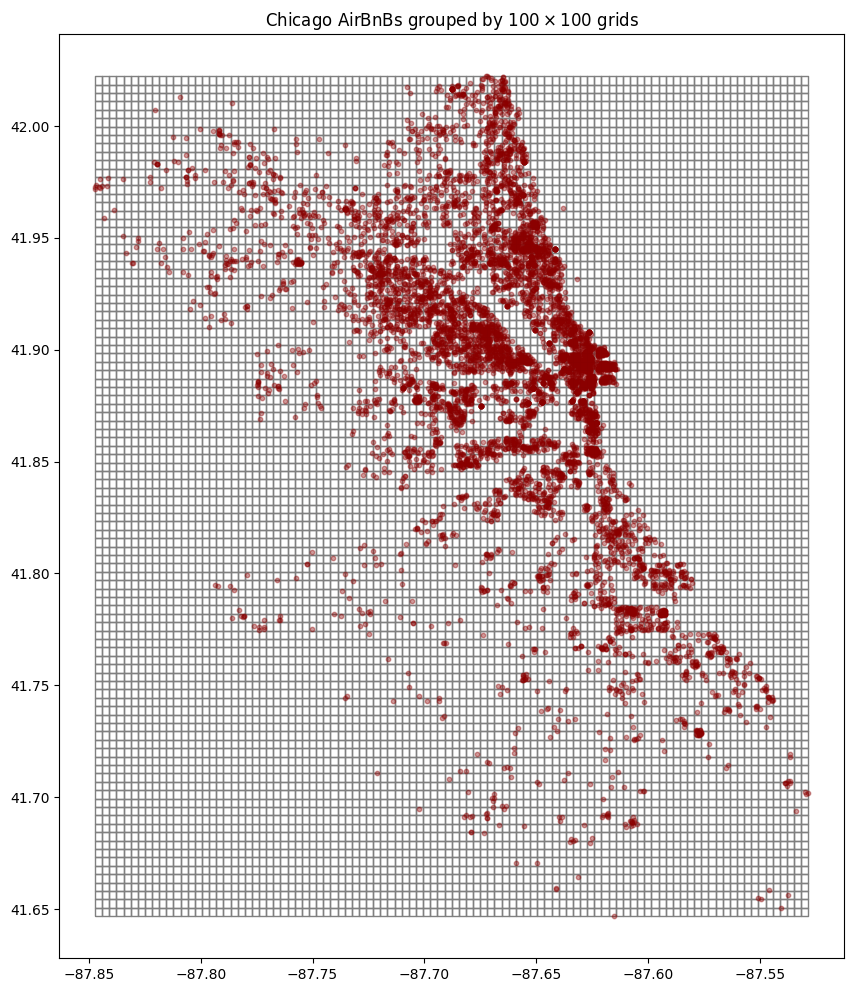

In [30]:
# Plot 1
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
grid.plot(ax=ax, facecolor='none', edgecolor='grey')  # plot grid
joined.plot(ax=ax, markersize=10, color='darkred', alpha=0.4)  # plot the scatters 
plt.title('Chicago AirBnBs grouped by $100\\times100$ grids')
plt.show()

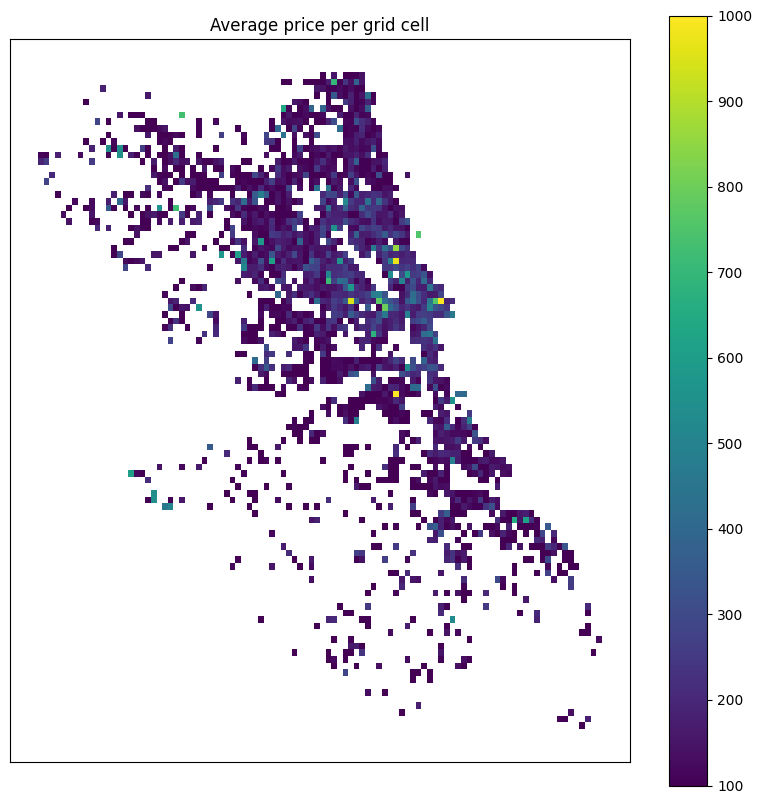

In [31]:
# Plot 2
joined.groupby(joined.index_right)['price'].mean()
average_price = joined.groupby(joined.index_right)['price'].mean()

# join the average prices back to the grid
grid['price'] = average_price

# plot the grid with colors according to the average price
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
vmin = 100  
vmax = 1000  
grid.plot(column='price', ax=ax, legend=True, vmin=vmin, vmax=vmax)
plt.title('Average price per grid cell')

# remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.show()

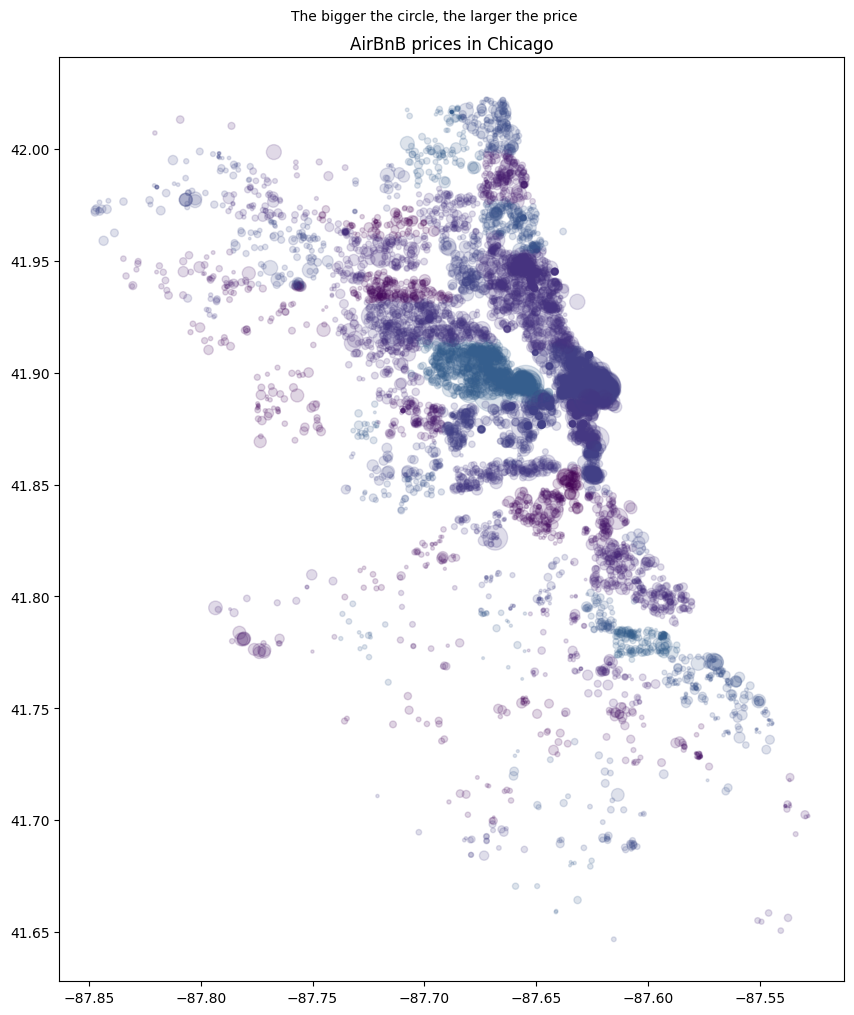

In [32]:
# Plot 3
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# create a color map
cmap = plt.get_cmap('viridis')
colors = cmap(joined['neighbourhood_cleansed'].astype('category').cat.codes)

# create a size variable that is proportional to the price_float value
sizes = joined['price'] / joined['price'].max() * 1200

# plot the scatters 
joined.plot(ax=ax, markersize=sizes, color=colors, alpha=.17)
plt.title('AirBnB prices in Chicago')
plt.suptitle('The bigger the circle, the larger the price', fontsize=10, y=0.92)
plt.show()

## 2.2. Non-Geographic EDA
<a id='non-geographic-eda'></a>

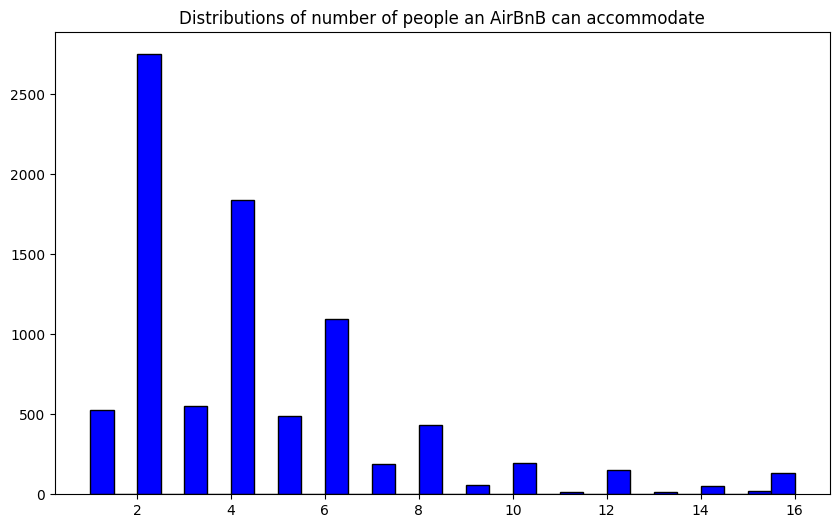

In [33]:
metric = df_listings["accommodates"] # gdf_population_merged['Population_Density']

plt.figure(figsize=(10, 6))
plt.hist(metric, bins=30, color='blue', edgecolor='black')
plt.title('Distributions of number of people an AirBnB can accommodate')
plt.show()

In [34]:
gdf_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

neighbourhood_cleansed
Clearing           351.176471
Near North Side    337.975915
West Town          277.413793
Near South Side    261.841463
Loop               250.688034
                      ...    
Calumet Heights     66.468750
West Lawn           66.000000
West Englewood      61.722222
Fuller Park         59.000000
New City            56.982143
Name: price, Length: 77, dtype: float64

In [35]:
gdf_listings[['neighbourhood_cleansed', 'price', 'bedrooms', 'beds', 'accommodates']].groupby('neighbourhood_cleansed').median().sort_values(by='price')

price  bedrooms  beds  accommodates
neighbourhood_cleansed                                     
Calumet Heights          29.0       1.0   1.0           1.0
Fuller Park              31.0       2.5   1.0           2.0
New City                 31.5       2.0   1.0           2.0
South Chicago            33.0       2.0   1.0           2.0
East Side                42.0       2.0   1.0           2.0
...                       ...       ...   ...           ...
Loop                    186.5       1.0   1.0           3.0
Burnside                200.0       2.0   2.0           6.0
Ohare                   200.0       1.0   1.0           3.0
Near South Side         246.5       2.0   3.0           6.0
Clearing                463.0       4.0   5.0          10.0

[77 rows x 4 columns]

In [36]:
top_10_nbds = gdf_listings['neighbourhood_cleansed'].value_counts()[:10].index
top_10_nbds

Index(['Near North Side', 'West Town', 'Lake View', 'Near West Side',
       'Logan Square', 'Loop', 'Lincoln Park', 'Near South Side',
       'Lower West Side', 'Uptown'],
      dtype='object', name='neighbourhood_cleansed')

In [37]:
df_top10 = gdf_listings.loc[gdf_listings['neighbourhood_cleansed'].isin(top_10_nbds)]
df_top10.head(3)

id                         listing_url       scrape_id last_scraped  \
1   7126   https://www.airbnb.com/rooms/7126  20230912032549   2023-09-12   
2  10945  https://www.airbnb.com/rooms/10945  20230912032549   2023-09-12   
3  12140  https://www.airbnb.com/rooms/12140  20230912032549   2023-09-12   

        source                                               name  \
1  city scrape  Rental unit in Chicago · ★4.70 · 1 bedroom · 1...   
2  city scrape  Rental unit in Chicago · ★4.65 · 2 bedrooms · ...   
3  city scrape  Boutique hotel in Chicago · ★4.93 · 1 bedroom ...   

                                         description  \
1  A very small studio in a wonderful neighborhoo...   
2  Beautiful first floor apartment in Historic Ol...   
3  Bed and Breakfast license issued by the City o...   

                               neighborhood_overview  \
1  Ukrainian Village was just named "Hottest Neig...   
2                                                NaN   
3  The Guest House is in the heart of Chicago's m...   

                                         picture_url  host_id  ...  \
1  https://a0.muscache.com/pictures/51073/16c81c7...    17928  ...   
2  https://a0.muscache.com/pictures/58d1a420-a24b...    33004  ...   
3  https://a0.muscache.com/pictures/miso/Hosting-...    46734  ...   

  review_scores_value       license instant_bookable  \
1                4.75  R21000075737                f   
2                4.65       2209984                t   
3                4.87  R20000055258                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
1                              1                                           1   
2                              7                                           7   
3                              1                                           0   

  calculated_host_listings_count_private_rooms  \
1                                            0   
2                                            0   
3                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  \
1                                           0              2.92   
2                                           0              0.63   
3                                           0              0.15   

                         geometry geohash  
1  POINT (443579.828 4639081.416)   dp3wk  
2  POINT (446939.361 4640199.221)   dp3wm  
3  POINT (446147.997 4641494.278)   dp3wm  

[3 rows x 77 columns]

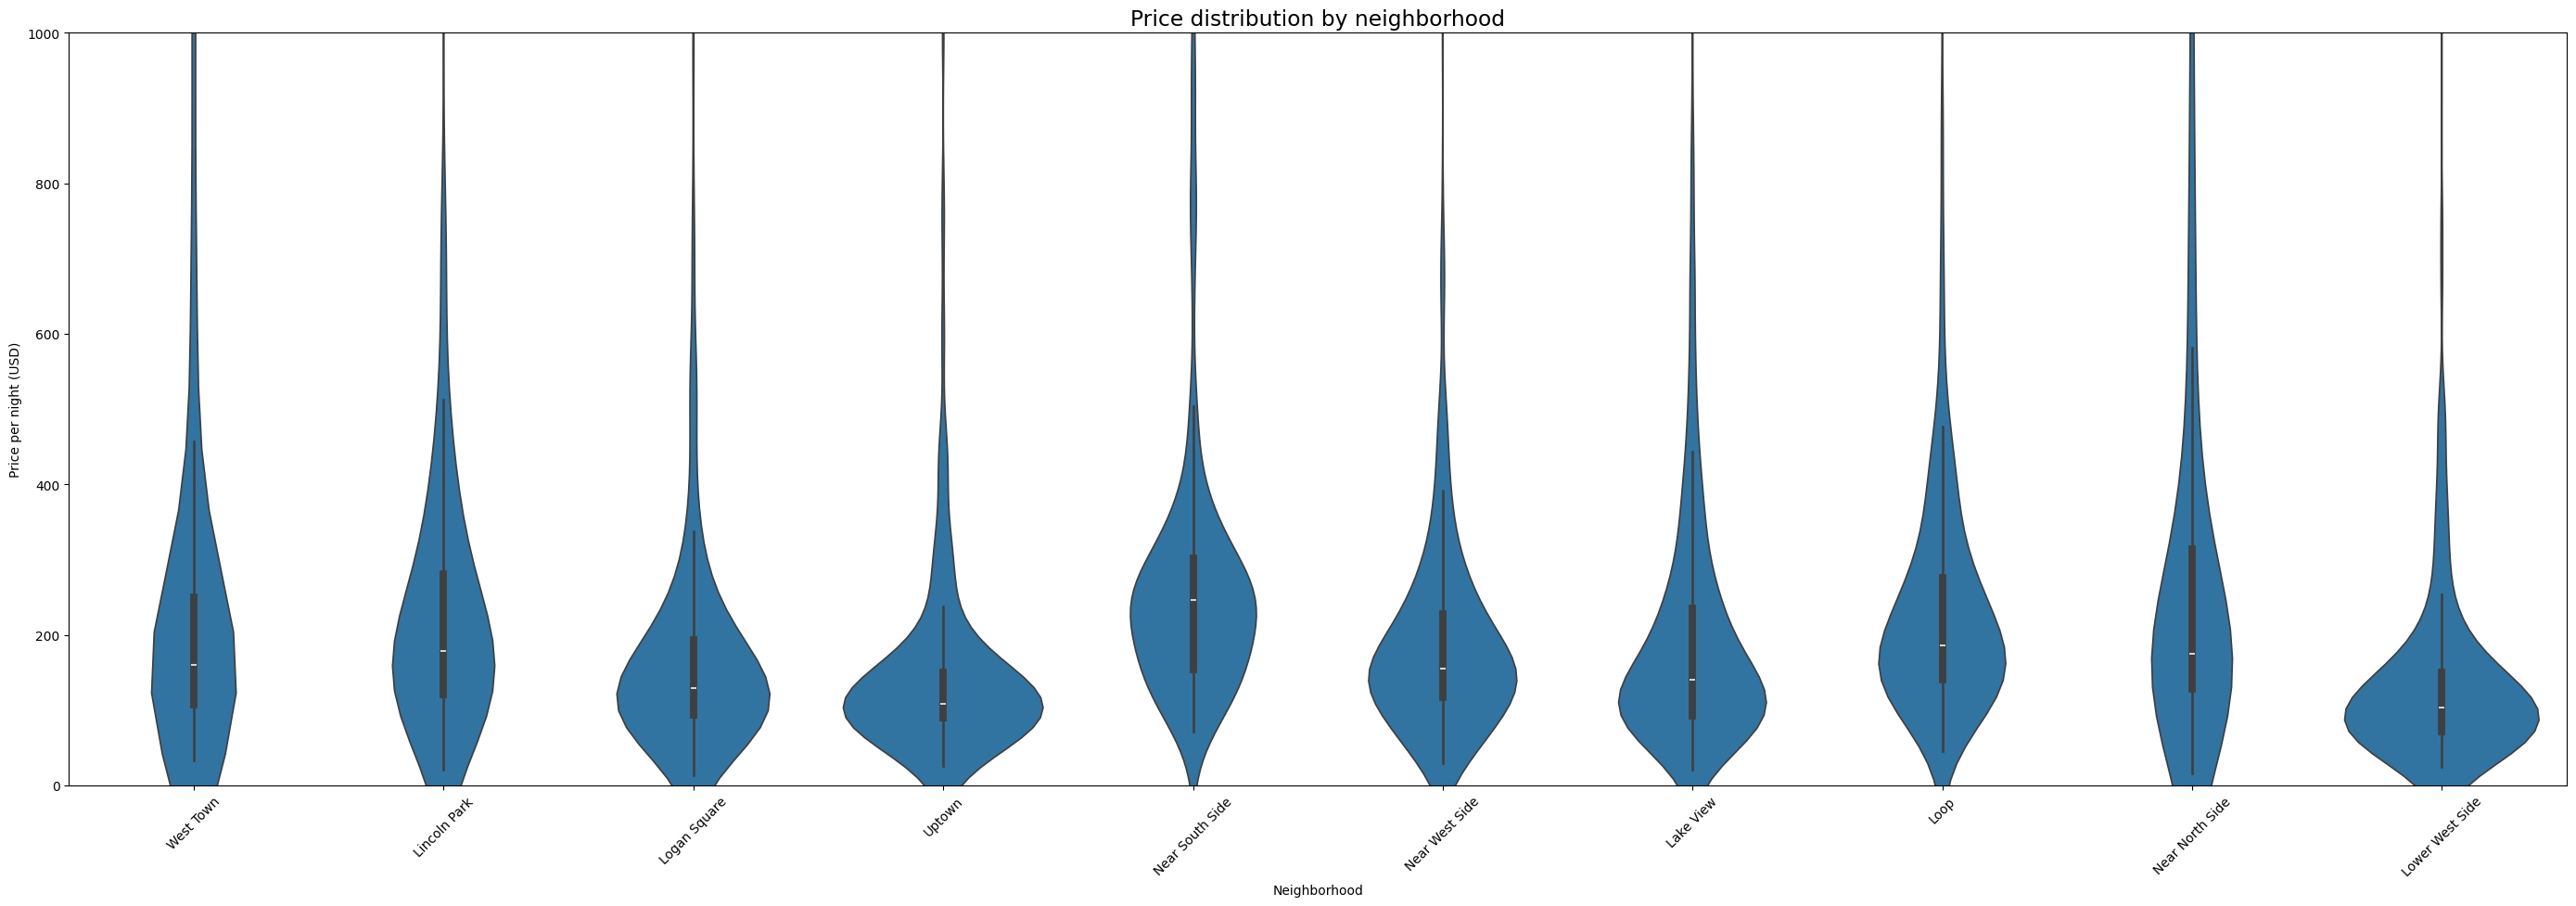

In [38]:
plt.figure(figsize=(28,10))
sns.violinplot(data=df_top10, x='neighbourhood_cleansed', y='price')
plt.rcParams['font.size'] = 14
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Price per night (USD)')
plt.title('Price distribution by neighborhood')
plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

In [39]:
gdf_listings[['neighbourhood_cleansed', 'price', 'bedrooms', 'beds', 'accommodates']].groupby('neighbourhood_cleansed').median().sort_values(by='price')

price  bedrooms  beds  accommodates
neighbourhood_cleansed                                     
Calumet Heights          29.0       1.0   1.0           1.0
Fuller Park              31.0       2.5   1.0           2.0
New City                 31.5       2.0   1.0           2.0
South Chicago            33.0       2.0   1.0           2.0
East Side                42.0       2.0   1.0           2.0
...                       ...       ...   ...           ...
Loop                    186.5       1.0   1.0           3.0
Burnside                200.0       2.0   2.0           6.0
Ohare                   200.0       1.0   1.0           3.0
Near South Side         246.5       2.0   3.0           6.0
Clearing                463.0       4.0   5.0          10.0

[77 rows x 4 columns]

# 3. In-Depth Analysis & Modeling - Airbnb Locations
<a id='in-depth-analysis-airbnb-locations'></a>
Here, we create a final dataset which is based on "population". When computing further statistics for each district, it's important to account for the district's size ("normalization"). 

In [40]:
# listings data as gdf
gdf_listings = gpd.GeoDataFrame(df_listings, geometry=gpd.points_from_xy(df_listings.longitude, df_listings.latitude))
gdf_listings.crs = 'EPSG:4326'
gdf_listings.to_crs(epsg=26916, inplace=True)  # common projection

# remove one outlier value (faulty data?)
gdf_listings = gdf_listings[gdf_listings['price'] <= 10000]

# only keep certain columns for now
gdf_listings_filtered = gdf_listings[['geometry', 'accommodates', 'price', 'review_scores_location', 
                                      'review_scores_rating', 'reviews_per_month']].copy()
gdf_listings_filtered

geometry  accommodates  price  \
0     POINT (451158.383 4626394.394)             1  114.0   
1     POINT (443579.828 4639081.416)             2   92.0   
2     POINT (446939.361 4640199.221)             4  170.0   
3     POINT (446147.997 4641494.278)             3  329.0   
4     POINT (445578.398 4641764.099)             3   61.0   
...                              ...           ...    ...   
8523   POINT (442786.466 4636164.59)            13  438.0   
8524  POINT (444431.643 4630673.558)             1   32.0   
8525  POINT (445444.069 4623685.767)             4   24.0   
8526  POINT (447616.595 4635477.377)             2  127.0   
8527  POINT (445525.754 4644263.788)             8  366.0   

      review_scores_location  review_scores_rating  reviews_per_month  
0                       4.96                  4.99               2.15  
1                       4.89                  4.70               2.92  
2                       4.99                  4.65               0.63  
3                       5.00                  4.93               0.15  
4                       4.90                  4.29               0.26  
...                      ...                   ...                ...  
8523                     NaN                   NaN                NaN  
8524                     NaN                   NaN                NaN  
8525                     NaN                   NaN                NaN  
8526                     NaN                   NaN                NaN  
8527                     NaN                   NaN                NaN  

[8528 rows x 6 columns]

In [42]:
# join Airbnb and population data
gdf_joined = gpd.sjoin(gdf_listings_filtered, gdf_population_merged, how="inner", predicate="within")
statistics = gdf_joined.groupby('GEOID10').agg(  # compute various descriptive statistics
    Airbnb_Count=('price', 'count'),
    Median_Price=('price', 'median'),
    Average_Price=('price', 'mean'),
    Median_Review_Score=('review_scores_rating', 'median'))
statistics = statistics.join(gdf_population_merged.set_index('GEOID10')['Area_km2'])

# calculate Airbnbs per km²
statistics['Airbnb_per_km2'] = statistics['Airbnb_Count'] / statistics['Area_km2']

# join back
gdf_population_merged_stats = gdf_population_merged.merge(statistics, on='GEOID10', how='left')
gdf_population_merged_stats.drop(columns=['Area_km2_y'], inplace=True)
gdf_population_merged_stats.rename(columns={'Area_km2_x': 'Area_km2'}, inplace=True)

# add crime counts
gdf_joined_crime = gpd.sjoin(gdf_crime_filtered, gdf_population_merged_stats, how="inner", predicate="within")
gdf_crime_counts = gdf_joined_crime.groupby('GEOID10').size().reset_index(name='Crime_Count')

# merge back
gdf_population_final = gdf_population_merged_stats.merge(gdf_crime_counts, on='GEOID10', how='left')
gdf_population_final.rename(columns={'Crime_Count_x': 'Crime_Count'}, inplace=True)
gdf_population_final['Crime_Count'].fillna(0, inplace=True)
gdf_population_final['Crimes_per_km2'] = gdf_population_final['Crime_Count'] / gdf_population_final['Area_km2']  # crime density column
gdf_population_final

the_geom      GEOID10  \
0    MULTIPOLYGON (((448099.985 4620011.369, 448099...  17031842400   
1    MULTIPOLYGON (((443023.106 4630347.019, 443024...  17031840300   
2    MULTIPOLYGON (((447758.91 4633624.092, 447759....  17031841100   
3    MULTIPOLYGON (((442881.562 4633982.84, 442880....  17031841200   
4    MULTIPOLYGON (((447463.312 4636034.682, 447468...  17031839000   
..                                                 ...          ...   
796  MULTIPOLYGON (((445493.406 4642499.467, 445512...  17031070400   
797  MULTIPOLYGON (((444991 4642257.173, 444990.349...  17031070500   
798  MULTIPOLYGON (((440822.244 4648135.181, 440793...  17031130300   
799  MULTIPOLYGON (((440802.854 4633948.727, 440770...  17031292200   
800  MULTIPOLYGON (((440902.402 4627082.334, 440934...  17031630900   

     TOTAL POPULATION  Area_km2  Population_Density  Airbnb_Count  \
0                3304  1.967197         1679.547464           2.0   
1                3950  0.830626         4755.450572          12.0   
2                7254  1.142409         6349.739874          56.0   
3                5262  0.624955         8419.804840          20.0   
4                7311  0.516078        14166.465239          47.0   
..                ...       ...                 ...           ...   
796              2984  0.324134         9206.075171          13.0   
797              2928  0.305194         9593.884111          15.0   
798              5064  0.720585         7027.623420           7.0   
799              2961  0.397729         7444.769197           3.0   
800              5363  0.659286         8134.552157           1.0   

     Median_Price  Average_Price  Median_Review_Score  Airbnb_per_km2  \
0           170.5     170.500000                4.540        1.016675   
1           105.5     114.250000                4.890       14.446938   
2           156.5     218.214286                4.800       49.019222   
3           106.5     105.950000                4.850       32.002299   
4           211.0     249.851064                4.805       91.071518   
..            ...            ...                  ...             ...   
796         137.0     208.692308                4.750       40.106896   
797         165.0     169.533333                4.670       49.148996   
798         200.0     281.857143                4.930        9.714329   
799         469.0     391.666667                4.830        7.542826   
800         108.0     108.000000                4.470        1.516791   

     Crime_Count  Crimes_per_km2  
0           23.0       11.691765  
1            6.0        7.223469  
2            6.0        5.252059  
3           10.0       16.001149  
4            1.0        1.937692  
..           ...             ...  
796          0.0        0.000000  
797          0.0        0.000000  
798          0.0        0.000000  
799          5.0       12.571377  
800          6.0        9.100748  

[801 rows x 12 columns]

In [43]:
gdf_population_final_nonan = gdf_population_final.dropna(subset=['Median_Price', 'Crime_Count'])  # drop some missings

X = gdf_population_final_nonan[['Crimes_per_km2']]
y = gdf_population_final_nonan['Airbnb_per_km2']
X = sm.add_constant(X)  # add a constant to the model (the intercept)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Airbnb_per_km2   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.958
Date:                Wed, 29 Oct 2025   Prob (F-statistic):            0.00854
Time:                        15:33:12   Log-Likelihood:                -3554.6
No. Observations:                 672   AIC:                             7113.
Df Residuals:                     670   BIC:                             7122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             34.8744      2.240     15.

# 4. In-Depth Analysis & Modeling - Airbnb Prices
<a id='in-depth-analysis-airbnb-prices'></a>

In a first step, we will extend the gdf_listings by some further data. We add 3 columns:

* `crime_count` which tells us how many homicides occured in a 2km radius
* `distance_to_center` which gives the distance to the city center
* `has_park_within_100m` which gives a boolean indicator whether there is a park nearby

In [44]:
if 'buffer' not in gdf_listings.columns:
    gdf_listings['buffer'] = gdf_listings['geometry'].buffer(2000)  # 2000 meters = 2km

if 'gdf_listings_buffer' not in locals():
    gdf_listings_buffer = gdf_listings[['id', 'buffer']].copy()
    gdf_listings_buffer.set_geometry('buffer', inplace=True)

# Perform the spatial join
joined = gpd.sjoin(gdf_listings_buffer, gdf_crime_filtered, how='left', predicate='intersects')

# Count the crimes and merge with the original dataframe
crime_count = joined.groupby('id').size().reset_index(name='crime_count_temp')
gdf_listings = gdf_listings.merge(crime_count, on='id', how='left')

# Update crime_count column
gdf_listings['crime_count'] = gdf_listings['crime_count_temp'].fillna(0)
gdf_listings.drop(['buffer', 'crime_count_temp'], axis=1, inplace=True, errors='ignore')

In [45]:
gdf_listings[["id", "crime_count"]].head(3)

id  crime_count
0   2384           62
1   7126           56
2  10945           31

In [46]:
# Get distance to city center for each airbnb

# Create a Point object for the given coordinates
center_point = Point(448156, 4635454)

# Calculate distances and add/update the column in gdf_listings
if 'distance_to_center' in gdf_listings.columns:
    # Update the column if it already exists
    gdf_listings['distance_to_center'] = gdf_listings['geometry'].distance(center_point)
else:
    # Create the column if it does not exist
    gdf_listings = gdf_listings.assign(distance_to_center=gdf_listings['geometry'].distance(center_point))

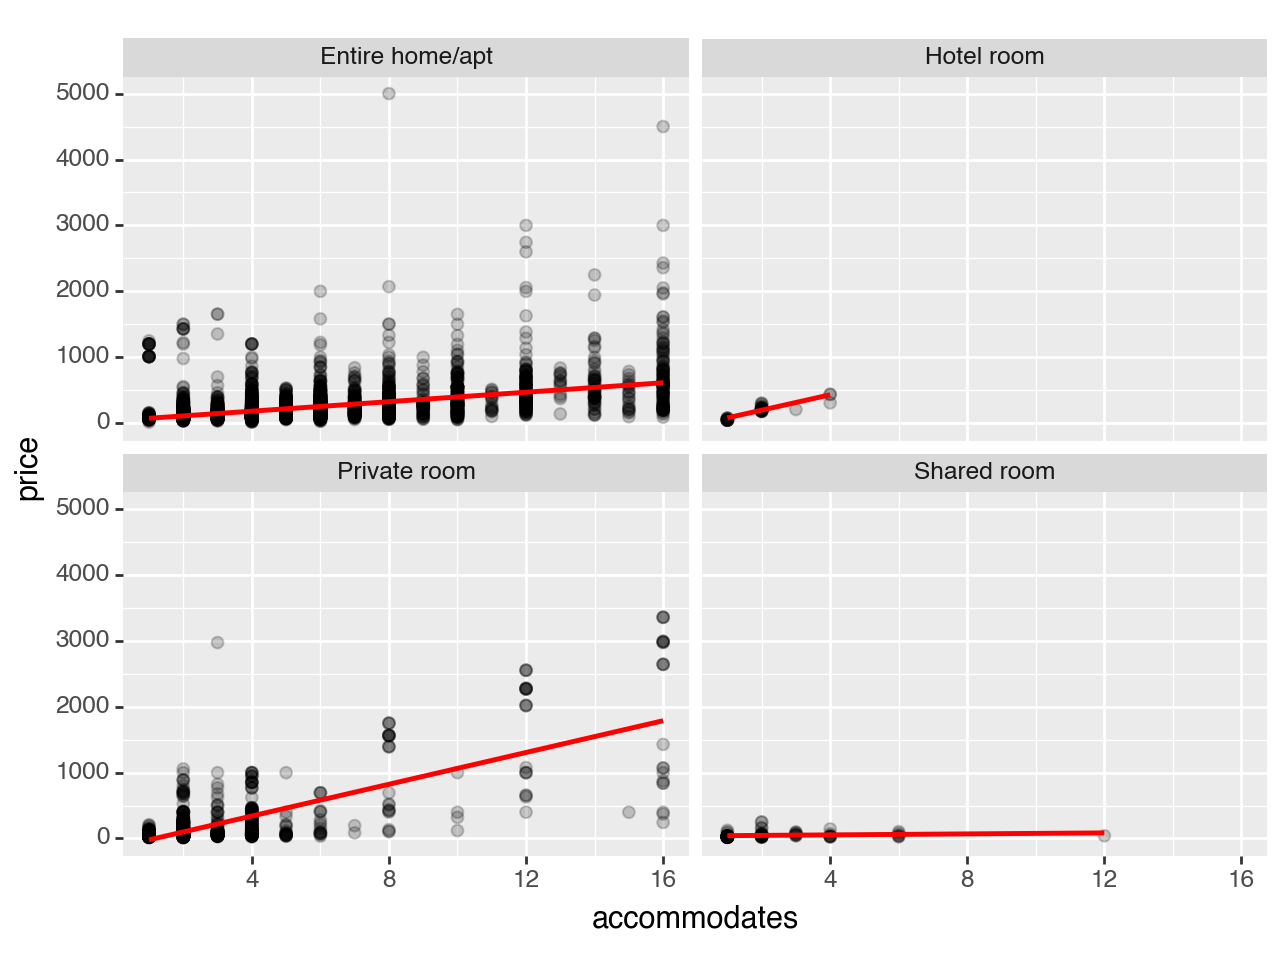

<Figure Size: (640 x 480)>

In [47]:
def plot_price_relationships(x:str, facet:str, ax_scaling:str='free', outlier_cutoff:float=6000):
    g =(ggplot(gdf_listings[gdf_listings['price'] <= outlier_cutoff], # filter out the outlier
            aes(x=x, y='price', color=facet)) +
            geom_point(color='black', alpha=0.2, size=2, stroke=0.4) +
            geom_smooth(method='lm', color='r', se=False) +
            facet_wrap(facets=facet, scales=ax_scaling) 
    )
    return g

plot_price_relationships(x='accommodates', facet='room_type', ax_scaling='fixed')

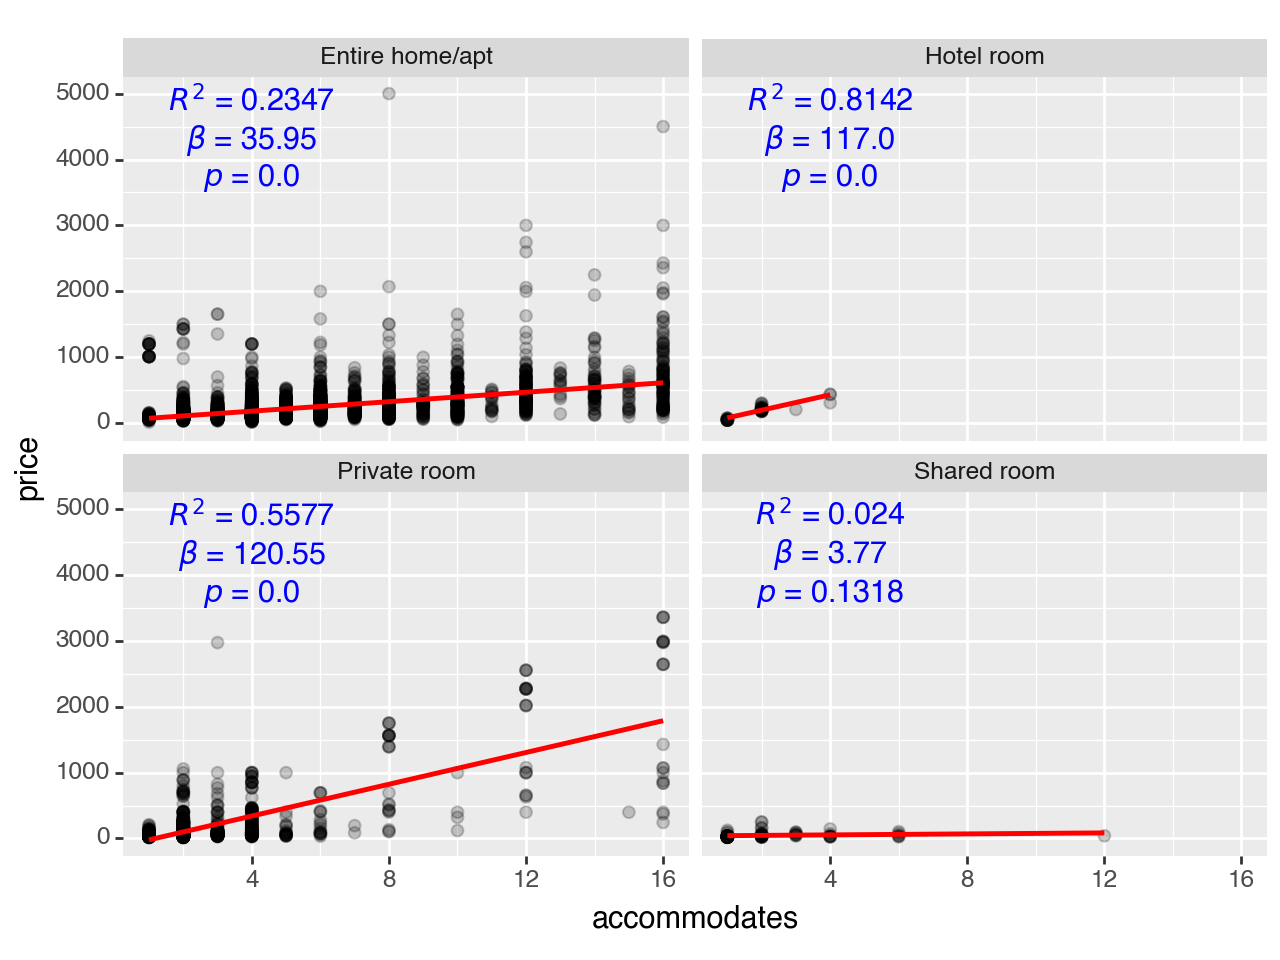

<Figure Size: (640 x 480)>

In [48]:
def plot_price_relationships_r2(x:str, facet:str, df:pd.DataFrame=gdf_listings, ax_scaling:str='free', outlier_cutoff:float=6000):
    import warnings
    warnings.filterwarnings("ignore")
    df = df[df['price'] <= outlier_cutoff]
    
    # calculate R^2 for each facet
    facets = df[facet].unique()
    r2_values = {}
    for f in facets:
        model = smf.ols(formula=f'price ~ {x}', data=df[df[facet] == f]).fit()
        # r2_values[f] = f"R2 = {round(model.rsquared, 4)}"
        # r2_values[f] = f"$R^2$ = {round(model.rsquared, 4)}\n$\\beta$ = {round(model.params[x],2)}"
        r2_values[f] = f"$R^2$ = {round(model.rsquared, 4)}\n$\\beta$ = {round(model.params[x],2)}\n$p$ = {round(model.pvalues[x],4)}"
    
    # create a new dataframe for R^2 values
    r2_df = pd.DataFrame(list(r2_values.items()), columns=[facet, 'R2'])
    g = (ggplot(df, aes(x=x, y='price', color=facet)) +
         geom_point(color='black', alpha=0.2, size=2, stroke=0.4) +
         geom_smooth(method='lm', color='r', se=False) +
         geom_text(data=r2_df, mapping=aes(label='R2'), color='b', x=len(df[x].unique())/4, y=outlier_cutoff-1700) +
         facet_wrap(facets=facet, scales=ax_scaling))
    return g

plot_price_relationships_r2(x='accommodates', facet='room_type', ax_scaling='fixed')



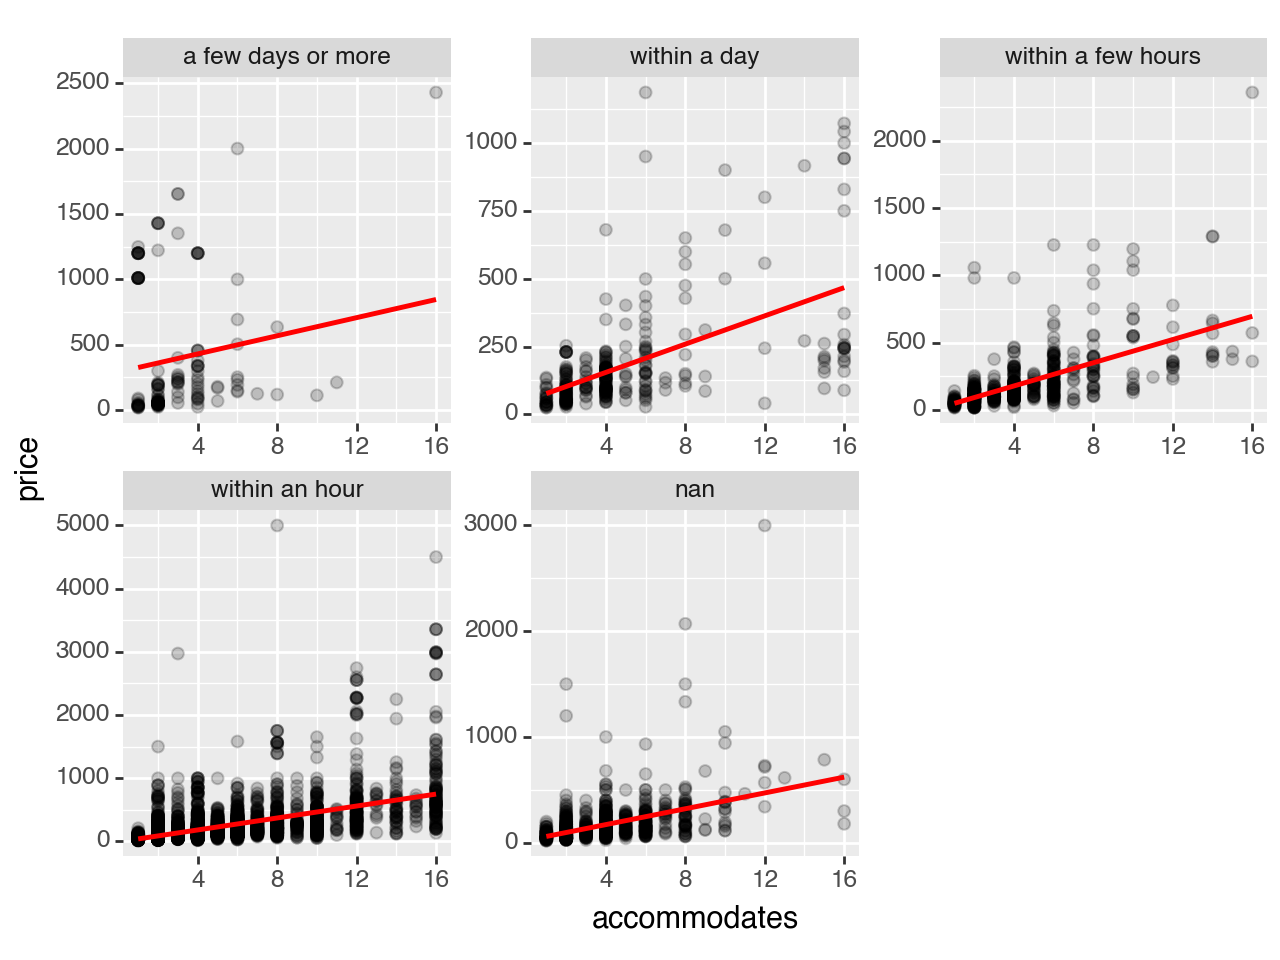

<Figure Size: (640 x 480)>

In [49]:
facet = 'host_response_time'
plot_price_relationships(x='accommodates', facet=facet)

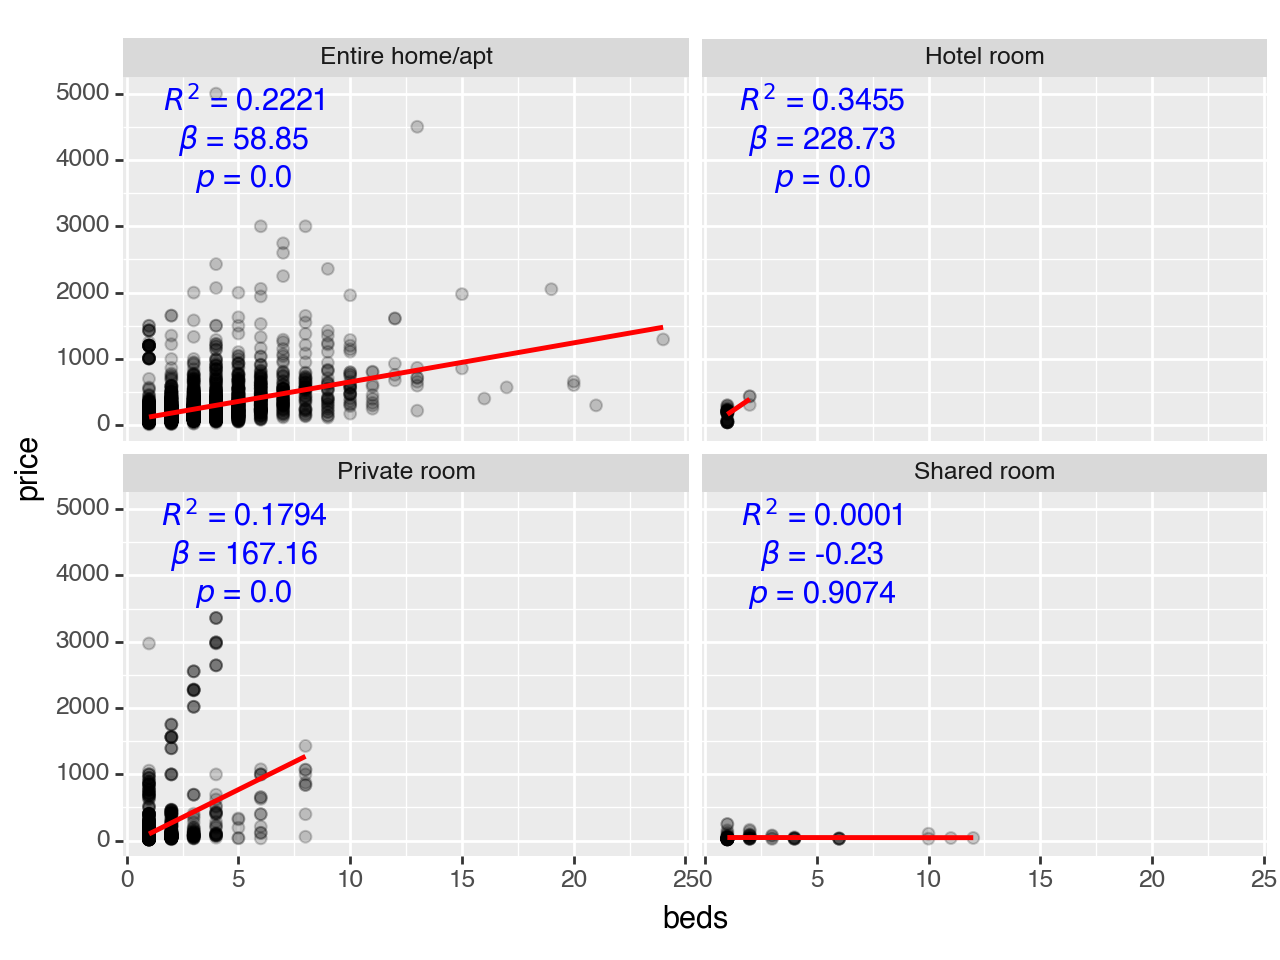

<Figure Size: (640 x 480)>

In [50]:
plot_price_relationships_r2(x='beds', facet='room_type', ax_scaling='fixed')

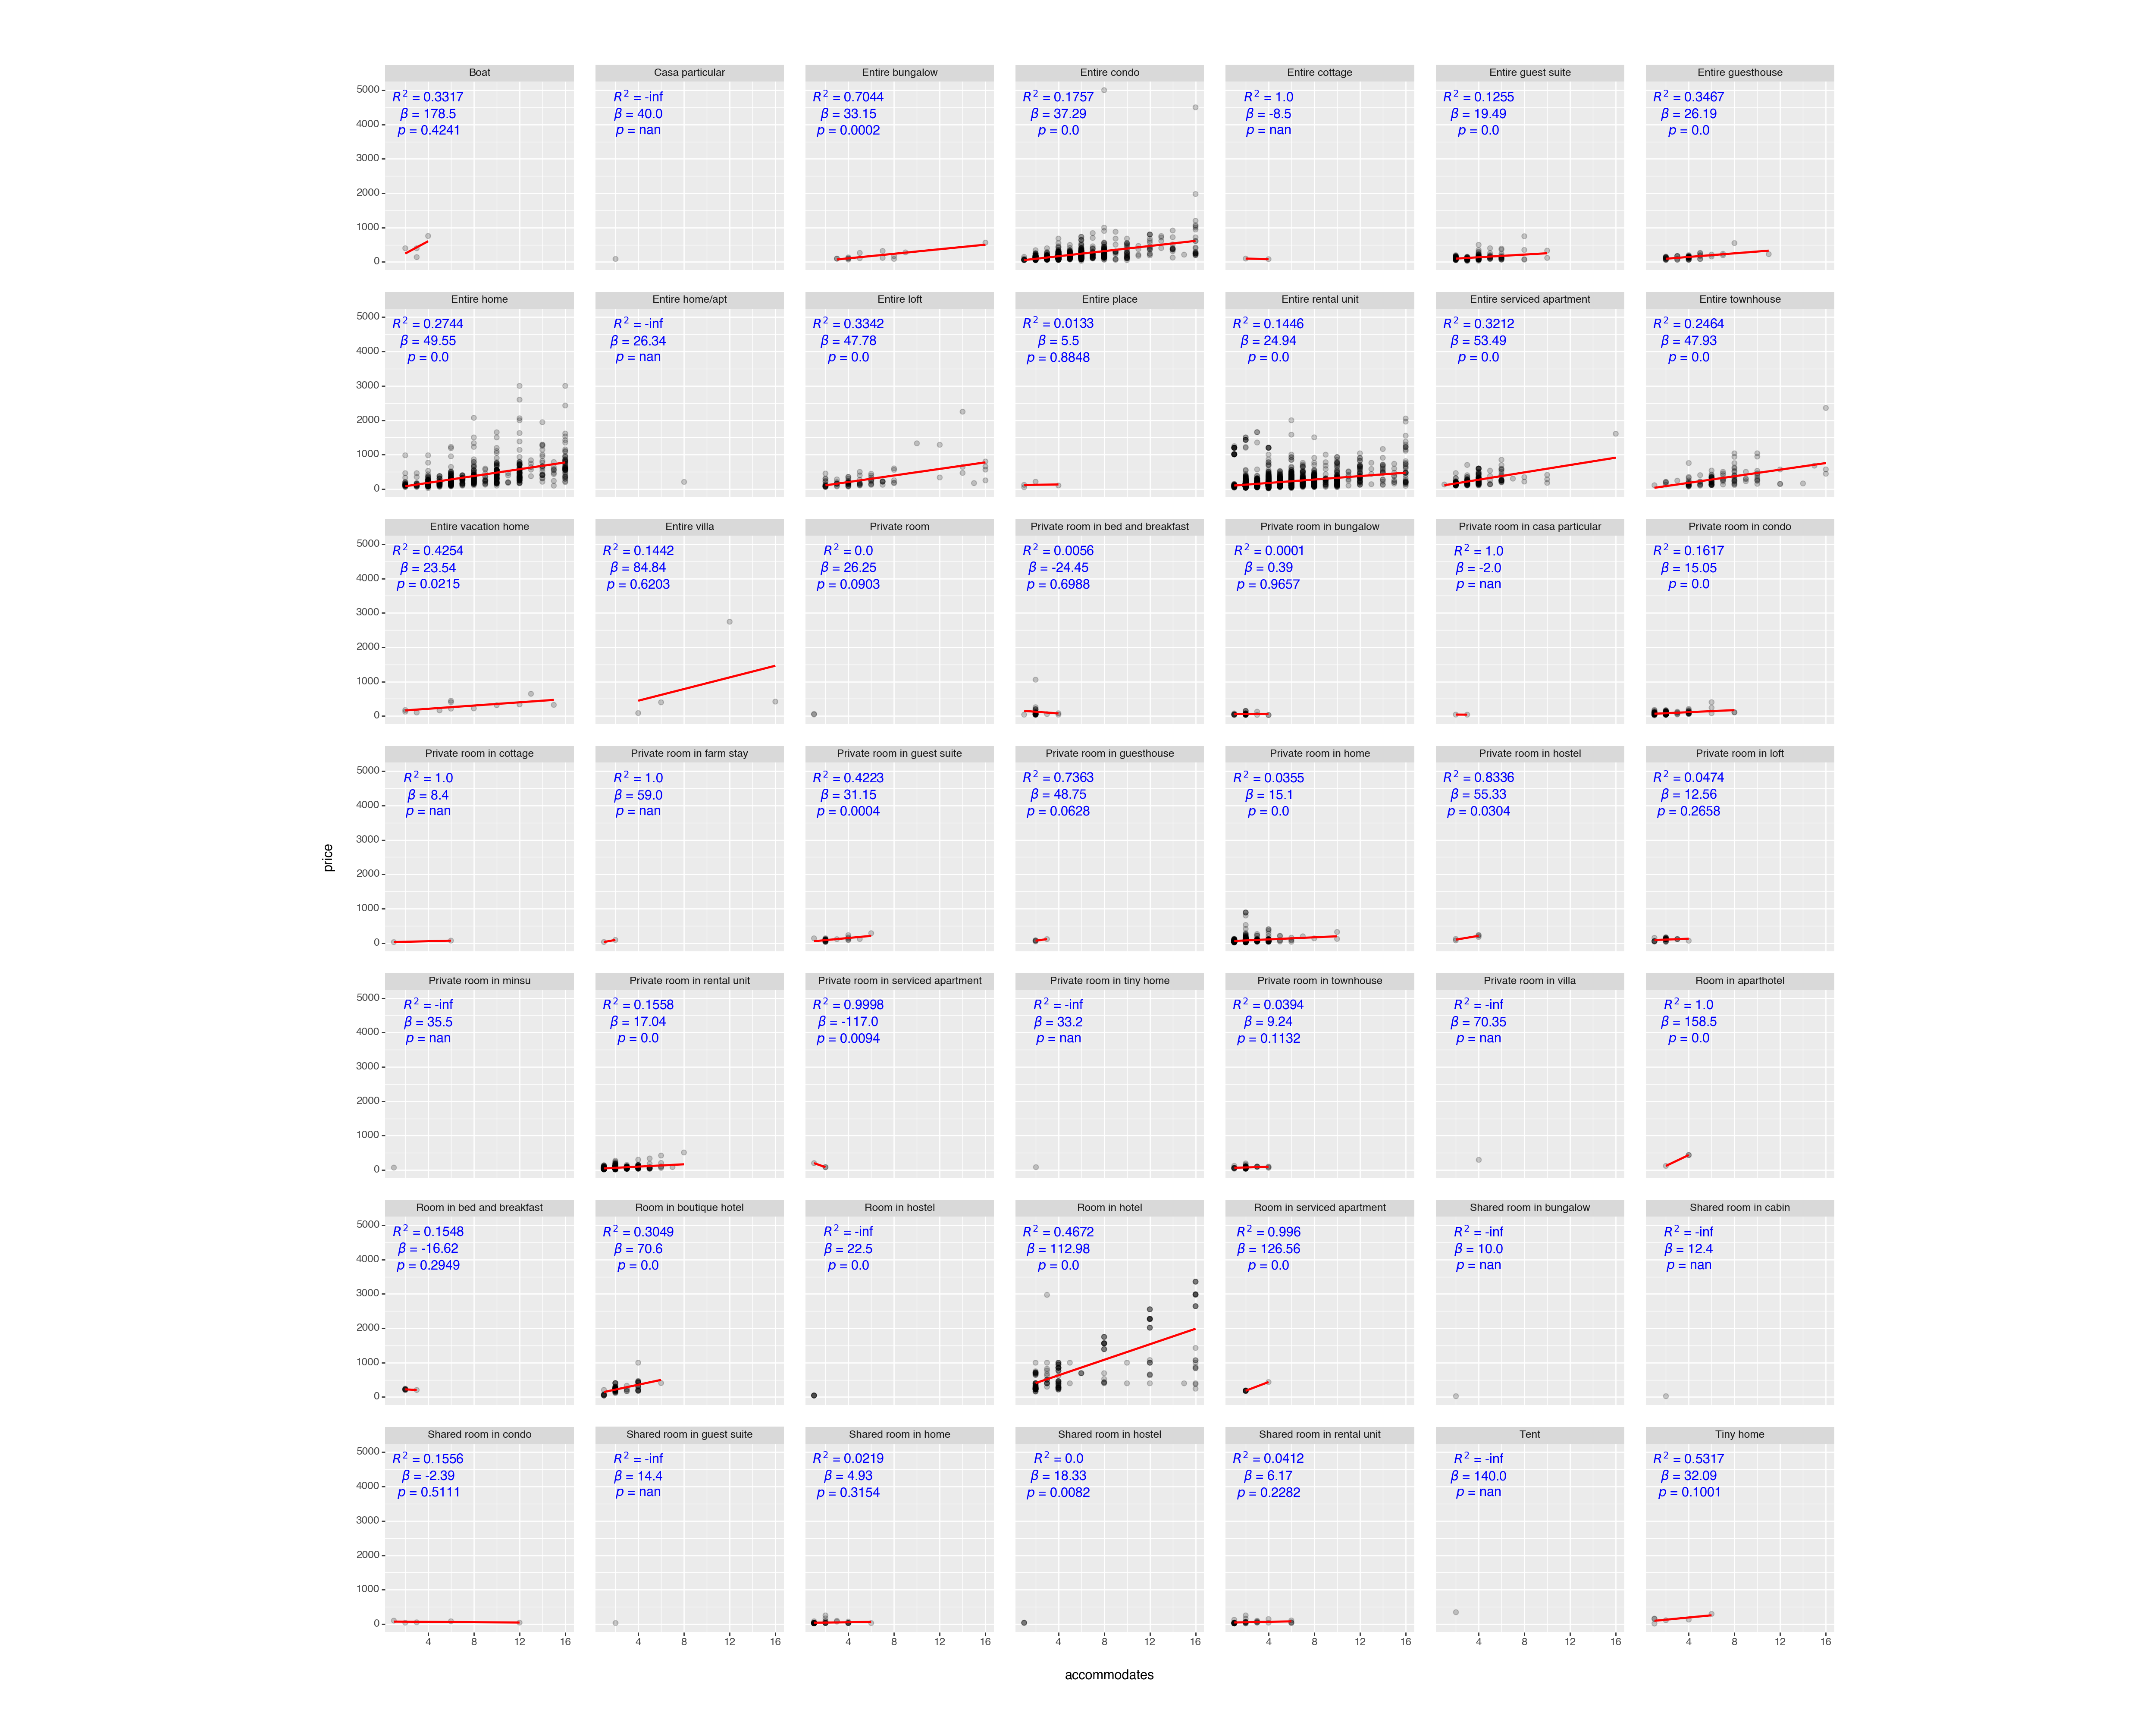

<Figure Size: (2500 x 2000)>

In [51]:
plot_price_relationships_r2(x='accommodates', facet='property_type', ax_scaling='fixed') + theme(aspect_ratio=1, figure_size=(25, 20))

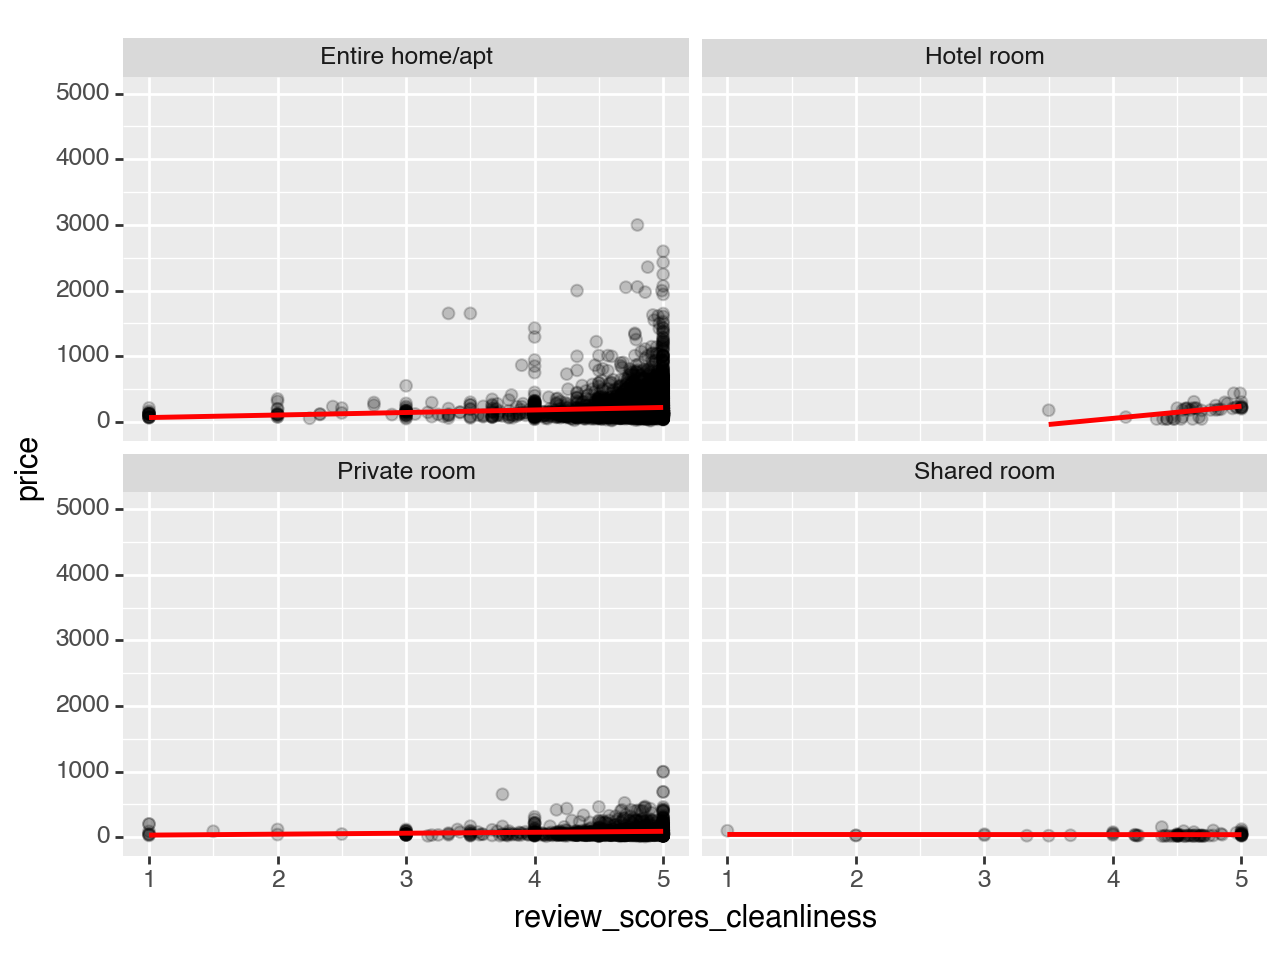

<Figure Size: (640 x 480)>

In [52]:
facet = 'room_type'
plot_price_relationships_r2(x='review_scores_cleanliness', facet=facet, ax_scaling='fixed')

## 4.1 K-means clustering
<a id='k-means-clustering'></a>
-  ```StandardScaler```: subtracting mean, dividing by stdev $\to$ $x_{scaled}=\frac{x - \bar{x}}{\sigma}$  
-  ```MinMaxScaler```: scaling to squish values btw 0 and 1 $\to$ $x_{scaled}=(\frac{x - x_{min}}{x_{max}- x_{min}}) \times (x_{max}- x_{min}) - x_{min}$  

### 4.1.1 Data Processing steps
<a id='data-processing-steps'></a>

In [53]:
property_type = gdf_listings['property_type'].tolist()
pt_dict = {}
for pt in property_type:
    if pt in pt_dict:
        pt_dict[pt] += 1
    else:
        pt_dict[pt] = 1
sorted(pt_dict.items(), key=lambda item: item[1], reverse=False)

[('Private room in tiny home', 1),
 ('Shared room in bungalow', 1),
 ('Shared room in guest suite', 1),
 ('Casa particular', 1),
 ('Entire home/apt', 1),
 ('Private room in villa', 1),
 ('Shared room in cabin', 1),
 ('Private room in minsu', 1),
 ('Tent', 1),
 ('Private room in farm stay', 2),
 ('Private room in cottage', 2),
 ('Private room', 2),
 ('Entire cottage', 2),
 ('Private room in casa particular', 2),
 ('Shared room in hostel', 3),
 ('Room in aparthotel', 3),
 ('Private room in serviced apartment', 3),
 ('Entire place', 4),
 ('Entire villa', 4),
 ('Boat', 4),
 ('Private room in hostel', 5),
 ('Room in hostel', 5),
 ('Private room in guesthouse', 5),
 ('Shared room in condo', 5),
 ('Tiny home', 6),
 ('Room in serviced apartment', 9),
 ('Room in bed and breakfast', 9),
 ('Entire vacation home', 12),
 ('Entire bungalow', 14),
 ('Private room in guest suite', 25),
 ('Private room in loft', 28),
 ('Private room in bed and breakfast', 29),
 ('Private room in bungalow', 30),
 ('Shar

In [54]:
def convert_object_to_numeric(dataframe:pd.DataFrame):
    df = dataframe.copy()
    for col in df.columns:
        try:
            df[col] = df[col].astype('int64')
        except TypeError:
            try:
                df[col] = df[col].astype('float64')
            except TypeError:
                pass
        except ValueError:
            try:
                df[col] = df[col].astype('float64')
            except ValueError:
                pass
    return df

numerical_df = convert_object_to_numeric(gdf_listings)
numerical_df = numerical_df.select_dtypes(include=['int64', 'float64'])

In [55]:
numerical_df2 = numerical_df.copy()
numerical_df2.drop(['neighbourhood_group_cleansed','bathrooms','calendar_updated','reviews_per_month',
                   'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
                    'latitude', 'longitude', 'availability_30'], axis=1, inplace=True)
numerical_df2['bedrooms'].fillna(1, inplace=True)
numerical_df2['beds'].fillna(1, inplace=True)
print(numerical_df2['bedrooms'].isna().sum())
print(numerical_df2['beds'].isna().sum())

0
0


In [56]:
numerical_df3 = numerical_df2[['accommodates', 'bedrooms', 'beds', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'price']]
numerical_df3.shape

(8528, 8)

### 4.1.2 The Model
<a id='the-model'></a>

In [57]:
stds = StandardScaler()
mmxs = MinMaxScaler()

df_std = pd.DataFrame(stds.fit_transform(numerical_df3))
df_mmx = pd.DataFrame(mmxs.fit_transform(numerical_df3))
df_std.columns, df_mmx.columns = numerical_df3.columns, numerical_df3.columns
display(df_std.head())
display(df_mmx.head())

accommodates  bedrooms      beds  availability_60  availability_90  \
0     -1.103415 -0.716494 -0.727375        -0.710123        -0.200745   
1     -0.770721 -0.716494 -0.727375         0.508041         0.618873   
2     -0.105332  0.179307 -0.140187        -0.271584         0.094318   
3     -0.438027 -0.716494 -0.727375         0.654220         0.717227   
4     -0.438027 -0.716494 -0.727375        -1.538475        -1.446564   

   availability_365  number_of_reviews     price  
0          0.847434           2.055314 -0.318389  
1          1.044915           5.222512 -0.400637  
2         -0.542832           0.289430 -0.109030  
3         -0.392746          -0.359959  0.485399  
4          0.547263          -0.052354 -0.516532

accommodates  bedrooms      beds  availability_60  availability_90  \
0      0.000000  0.000000  0.000000         0.283333         0.522222   
1      0.066667  0.000000  0.000000         0.700000         0.800000   
2      0.200000  0.083333  0.043478         0.433333         0.622222   
3      0.133333  0.000000  0.000000         0.750000         0.833333   
4      0.133333  0.000000  0.000000         0.000000         0.100000   

   availability_365  number_of_reviews     price  
0          0.882192           0.068127  0.013469  
1          0.950685           0.151561  0.010564  
2          0.400000           0.021609  0.020864  
3          0.452055           0.004502  0.041859  
4          0.778082           0.012605  0.006470

In [58]:
# X = numerical_df3.values
X = df_std.values

# kmeans = KMeans(n_clusters=8, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=1, random_state=None, copy_x=True, algorithm='lloyd')
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [59]:
numerical_df3['cluster'] = kmeans.labels_
df_std['cluster'] = kmeans.labels_
numerical_df3.head()

accommodates  bedrooms  beds  availability_60  availability_90  \
0             1       1.0   1.0               17               47   
1             2       1.0   1.0               42               72   
2             4       2.0   2.0               26               56   
3             3       1.0   1.0               45               75   
4             3       1.0   1.0                0                9   

   availability_365  number_of_reviews  price  cluster  
0               322                227    114        1  
1               347                505     92        1  
2               146                 72    170        1  
3               165                 15    329        1  
4               284                 42     61        0

In [60]:
# drop overlapping columns from the right dataframe before the merge
joined = pd.read_csv(airbnb_data_path + "listings.csv.gz")
joined = joined.dropna(subset=['price']) # remove missings
joined['price'] = joined['price'].astype(str)
joined['price'] = joined['price'].str.replace('$', '').str.replace(',', '').astype(float)
columns_to_drop = [col for col in joined.columns if col in numerical_df2.columns and col not in ['id', 'price']]

joined_drop = joined.drop(columns=columns_to_drop, inplace=False)

joined2 = numerical_df2.merge(joined_drop, on=['id', 'price'])
print(joined_drop.shape)
print(joined2.columns)
print(joined2.shape)
print(len(kmeans.labels_))

(8528, 50)
Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'crime_count',
       'distance_to_center', 'listing_url', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'hos

In [76]:
# drop overlapping columns from the right dataframe before the merge
columns_to_drop = [col for col in joined.columns if col in numerical_df3.columns and col not in ['accommodates', 'bedrooms', 'beds', 'availability_60', 
                                                                                                 'availability_90', 'availability_365', 'number_of_reviews', 'price']]
joined_drop = joined.drop(columns=columns_to_drop, inplace=False)


joined3 = numerical_df3.merge(joined_drop, on=['accommodates', 'bedrooms', 'beds', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'price'])
joined3 = pd.concat([joined2, numerical_df3['cluster']], axis=1)
joined3.columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'crime_count',
       'distance_to_center', 'listing_url', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptanc

In [77]:
# joined2['cluster'] = joined2['cluster'].astype('str')
joined3['cluster'] = joined3['cluster'].astype('str')
joined3.cluster.value_counts()

cluster
1    3551
0    2621
2    1908
3     448
Name: count, dtype: int64

In [ ]:
custom_color_sequence = ["blue", "red", "fuchsia", "green"]

# ensure coords are merged correctly by id if possible, otherwise align by index
if 'id' in joined3.columns and 'id' in joined.columns:
    coords = joined[['id', 'latitude', 'longitude']].drop_duplicates(subset='id')
    # merge coords into joined3
    if 'latitude' in joined3.columns and 'longitude' in joined3.columns:
        joined3 = joined3.drop(columns=['latitude', 'longitude'])
    joined3 = joined3.merge(coords, on='id', how='left')
else:
    # fallback: align by index (both reset to avoid misalignment)
    joined3 = pd.concat([joined3.reset_index(drop=True), joined[['latitude', 'longitude']].reset_index(drop=True)], axis=1)

# drop rows without valid coordinates
joined3 = joined3.dropna(subset=['latitude', 'longitude']).copy()

# ensure numeric types
joined3['latitude'] = joined3['latitude'].astype(float)
joined3['longitude'] = joined3['longitude'].astype(float)

# ensure cluster column exists and is string/categorical
if 'cluster' in joined3.columns:
    joined3['cluster'] = joined3['cluster'].astype(str)
else:
    joined3['cluster'] = '0'

# use price for marker size so higher price => bigger dot
if 'price' not in joined3.columns:
    joined3['price'] = 0

print("Interactive geoplot:\ndot color -> cluster\ndot size -> price (higher price, bigger dot)")

try:
    fig = px.scatter_mapbox(
        joined3,
        lat="latitude",
        lon="longitude",
        hover_name="beds",
        hover_data=["price", "beds"],
        color="cluster",
        color_discrete_sequence=custom_color_sequence,
        size="price",
        size_max=15,
        zoom=10,
        height=500,
        opacity=0.65
    )
except (KeyError, Exception) as e:
    fig = px.scatter_mapbox(
        joined3,
        lat="latitude",
        lon="longitude",
        hover_name="beds",
        hover_data=["price", "beds"],
        color="cluster",
        color_discrete_sequence=px.colors.qualitative.Safe,
        size="price",
        size_max=15,
        zoom=10,
        height=500,
        opacity=0.65
    )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

In [85]:
#let's see what factors contributed to the clusters
cmap='YlGnBu'
print('true values:')
display(numerical_df3.groupby('cluster').mean().style.background_gradient(cmap=cmap))

print('scaled values:')
display(df_std.groupby('cluster').mean().style.background_gradient(cmap=cmap))

true values:


scaled values:


## 4.2 Associate Rule Learning (unsupervised co-occurence analysis)
<a id='associate-rule-learning'></a>

In [86]:
gdf_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [87]:
gdf_listings['amenities'] = gdf_listings['amenities'].astype('str')
amenities = gdf_listings['amenities']

ls_amen = amenities.apply(lambda x: len(x.strip('[]').split(','))).to_list() # strip and split required as amenities col actually contains lists in str format
max_len = max(ls_amen)
idx = ls_amen.index(max_len)

print(f"the longest list contains {max_len} amenities")

len(gdf_listings['amenities'].iloc[idx].strip('[]').split(',')) == max_len


the longest list contains 97 amenities


True

In [88]:
# preprocessing -> converting amenities column to actual lists
gdf_listings['amenities_list'] = gdf_listings['amenities'].apply(lambda x: x.strip('[]').split(','))

gdf_listings['amenities_list'][:5]

0    ["Fire extinguisher",  "Long term stays allowe...
1    ["Fire extinguisher",  "Long term stays allowe...
2    ["Fire extinguisher",  "Dishes and silverware"...
3    ["Fire extinguisher",  "Free street parking", ...
4    ["Fire extinguisher",  "Long term stays allowe...
Name: amenities_list, dtype: object

In [89]:
amenities_df = pd.DataFrame(gdf_listings['amenities_list'].apply(set))


amenities_ls = gdf_listings['amenities_list']
flattened_list = [elem for sub_ls in amenities_ls for elem in sub_ls]


amenities_columns = pd.DataFrame(columns=list(set(sorted(flattened_list))))


amenities_df = pd.concat([amenities_df, amenities_columns], axis=1)

amenities_df.fillna(0, inplace=True)

for idx, row in amenities_df.iterrows(): #omit first column which contains the lists
    # get the amenities for the current row
    amenities = amenities_ls.loc[idx]
    
    for amenity in amenities:
        # if the amenity is in the DataFrame columns, set its value to 1
        if amenity in amenities_df.columns:
            amenities_df.loc[idx, amenity] = 1
                

In [90]:
amenities_df.shape

(8528, 2801)

In [91]:
amenities_dummies = amenities_df.drop(columns=['amenities_list'])

amenities_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8528 entries, 0 to 8527
Columns: 2800 entries,  to  "58\" HDTV with Disney+"
dtypes: int64(2800)
memory usage: 182.2 MB


Metrics used in associate rule mining are the following:

- **Support**

It indicates how frequently an item set appears in the data set.

Let $frq(A)$ be the number of occurrences (frequency) from the total number of transactions $frq(T) = T$:

$$
supp(A) = \frac{frq(A)}{T}
$$


- **Confidence**

It says how likely item set B is purchased when item set A is purchased

$$
conf(A \to B) = \frac{supp(A,B)}{supp(A)}
$$

with $supp(A,B) = \frac{frq(A,B)}{frq(T)}$ and $supp(A) = \frac{frq(A)}{frq(T)}$ it holds that:

$$
conf(A \to B) = \frac{supp(A,B)}{supp(A)} = 
\frac{\frac{frq(A,B)}{frq(T)}}{\frac{frq(A)}{frq(T)}} = 
\frac{frq(A,B)}{frq(A)}
$$

- **Lift**

Lift: It says how likely item set B is purchased when item set A is purchased while controlling for how popular item set B is.

Lift is the ratio of the observed support to that expected if A and B were independent or equivalently the ratio of the confidence of the rule to the expected confidence of the RHS item set by independence.

$$
lift(A \to B) = \frac{conf(A,B)}{supp(B)} = \frac{supp(A,B)}{supp(A) \times supp(B)}
$$

Note:

$$
lift(A \to B) == lift(B \to A)
$$


In [92]:
def support(df, cols):
  if type(cols) != list:
    cols = [cols]
    #cols = np.array(cols)
  #print(cols)
  bool_mask = df[cols].isin([1]).all(axis=1)
  frqA = len(df[bool_mask])
  T = len(df[cols])
  return frqA/T

# item set of 3 different products
# print(support(retail, ["Bread", "Yogurt", "Egg"]))
# # also works with single item sets
# support(retail,'Bread')
  

def confidence(df, A, B):
  if type(A)==list and type(B)==list:
    AB = A + B
  elif type(A)==list and type(B)!=list:
    AB = A
    AB.append(B)
  elif type(A)!=list and type(B)==list:
    AB = B
    AB.append(A)
  elif type(A)!=list and type(B)!=list:
    AB = [A, B]
  return support(df, AB) / support(df, A)

# print(confidence(retail, "Bread", "Egg"))

# confidence(retail, ["Bread"], ["Dog_Food","Flowers"])


def lift(df, A, B):
  return confidence(df, A, B) / support(df, B)

# lift(retail, "Bread", "Egg")

In [ ]:
# Calculate support for each amenity
support_values = {amenity: support(amenities_dummies, amenity) for amenity in amenities_dummies.columns}

# Filter amenities with support > 10%
filter_amenities = [amenity for amenity, support in support_values.items() if support > 0.15]
print("number of features with support > 15%:", len(filter_amenities))

amenities_names = amenities_dummies[filter_amenities].columns

lift_vals = {}

for i, a1 in enumerate(amenities_names):
    for a2 in amenities_names[i:]:
        if a1 != a2:
            # print(f"lift of {a1} and {a2} is {lift(amenities_dummies, a1, a2)}")
            lift_value = lift(amenities_dummies, a1, a2)
            combo = f"{a1} & {a2}"
            lift_vals[combo] = lift_value


In [ ]:
highest_lift = sorted(lift_vals.items(), key=lambda item: item[1], reverse=True)[:10]
pd.DataFrame(highest_lift, columns=['Itemsets', 'Lift']).style.background_gradient(cmap=cmap)



- If the lift is equal to 1, it means that the antecedent and the consequent are independent of each other. When two events are independent of each other, no rule can be drawn involving those two events.

- If the lift is greater than 1, it means that the antecedent and the consequent are positively correlated. This indicates that the occurrences of the antecedent and the consequent are dependent on one another, and the rule could be useful for predicting the consequent in future data sets.

- If the lift is less than 1, it means that the antecedent and the consequent are negatively correlated.

So, a lift value of 4.182987 means that the antecedent and the consequent are positively correlated and occur together more than 4 times as often as would be expected if they were independent. This suggests a strong association between the antecedent and the consequent.


further analysis of the amenities column

In [94]:
amenities_dummies['price'] = gdf_listings['price']

# removing outlier
amenities_dummies = amenities_dummies[amenities_dummies['price'] <= 25000]

average_price = {}
median_price = {}
for col in amenities_dummies.columns:
    if col != 'price' and amenities_dummies[col].sum() > 3:
        average_price[col] = amenities_dummies[amenities_dummies[col] == 1]['price'].mean()
        median_price[col] = amenities_dummies[amenities_dummies[col] == 1]['price'].median()


In [95]:
amenities_count = pd.DataFrame(amenities_dummies[amenities_dummies.columns[:-1]].sum().sort_values(ascending=False), columns=['count'])
amenities_count.reset_index(inplace=True)
amenities_count.rename(columns={'index': 'amenity'}, inplace=True)
amenities_count.head()

amenity  count
0             "Smoke alarm"   8312
1                 "Kitchen"   7853
2   "Carbon monoxide alarm"   7724
3              "Essentials"   7711
4                    "Wifi"   7522

In [96]:
avg = pd.DataFrame(sorted(average_price.items(), key=lambda item: item[1], reverse=True), columns=['amenity', 'average_price'])
med = pd.DataFrame(sorted(median_price.items(), key=lambda item: item[1], reverse=True), columns=['amenity', 'median_price'])

avg = avg.merge(amenities_count, on='amenity')
med = med.merge(amenities_count, on='amenity')


combined = avg.merge(med, on=['amenity', 'count'], suffixes=('_avg', '_med'))
combined['diff'] = abs(combined['average_price'] - combined['median_price'])
combined = combined.sort_values(by='diff', ascending=False)
combined.head(20).style.background_gradient(cmap='RdYlGn_r', subset=['average_price', 'median_price', 'count', 'diff'])

Features which we also want to consider in predicting the price

In [97]:
# SELECTING THE AMENITIES WHICH HAVE A DIFFERENCE OF 10% OR LESS BETWEEN THE AVERAGE AND MEDIAN PRICE
features_df = combined[combined['diff'] <= ((combined['average_price']+ combined['median_price'])/2) * 0.1] \
            .sort_values(by=['median_price', 'average_price', 'count'], ascending=False) 
features_df.head(20).style.background_gradient(cmap='RdYlGn_r', subset=['average_price', 'median_price', 'count', 'diff'])

In [98]:
features = features_df['amenity'][:20].tolist()
print('the following features will be considered by the feature selector:\n')
for feature in features:
    print(feature)

the following features will be considered by the feature selector:

 "Private outdoor kitchen"
 "Thermador refrigerator"
 "Thermador stainless steel oven"
 "Shared hot tub - available seasonally"
 "Thermador stainless steel gas stove"
 "Viking stainless steel oven"
 "Wolf stainless steel gas stove"
 "Wolf stainless steel oven"
 "75\" HDTV with Roku"
 "Shared pool - available seasonally"
 "Exercise equipment: stationary bike
 "85\" HDTV with Amazon Prime Video
 "Shared pool - available all year
 "Free parking garage on premises"
 "Paid parking lot on premises \u2013 30 spaces"
 open specific hours"
 "70\" HDTV with Amazon Prime Video
 "KitchenAid stainless steel gas stove"
 "Fast wifi \u2013 109 Mbps"
 "Golf course view"


## 4.3 Supervised learning
<a id='supervised-learning'></a>

Trying to predict Airbnb prices and see which features are relevant.

### 4.3.1 Data processing
<a id='data-processing'></a>

In [99]:
room_types = pd.get_dummies(gdf_listings['room_type'])
room_types = room_types.astype(int)

# num_df_for_ml = pd.concat([numerical_df2, room_types, amenities_df[features]], axis=1)
num_df_for_ml = pd.concat([numerical_df2, room_types], axis=1)

num_df_for_ml.drop(['id', 'host_id', 'scrape_id'], inplace=True, axis=1)
num_df_for_ml

host_listings_count  host_total_listings_count  accommodates  bedrooms  \
0                       1                          1             1       1.0   
1                       2                          2             2       1.0   
2                       7                         82             4       2.0   
3                       1                          1             3       1.0   
4                      10                         13             3       1.0   
...                   ...                        ...           ...       ...   
8523                    3                          3            13       5.0   
8524                   13                         18             1       1.0   
8525                    1                          1             4       3.0   
8526                 4565                       5836             2       1.0   
8527                   28                         31             8       3.0   

      beds  price  minimum_nights  maximum_nights  minimum_minimum_nights  \
0      1.0    114               3              60                       3   
1      1.0     92              32              60                       2   
2      2.0    170               4            1125                       2   
3      1.0    329               2              10                       2   
4      1.0     61              32             395                      32   
...    ...    ...             ...             ...                     ...   
8523   8.0    438              30             365                      30   
8524   1.0     32               2             365                       2   
8525   3.0     24              32             365                      32   
8526   1.0    127              32            1125                      32   
8527   4.0    366               1             365                       2   

      maximum_minimum_nights  ...  calculated_host_listings_count  \
0                          3  ...                               1   
1                         32  ...                               1   
2                          4  ...                               7   
3                          2  ...                               1   
4                         45  ...                               4   
...                      ...  ...                             ...   
8523                      30  ...                               3   
8524                       2  ...                               9   
8525                      32  ...                               1   
8526                     366  ...                             645   
8527                       2  ...                              28   

      calculated_host_listings_count_entire_homes  \
0                                               0   
1                                               1   
2                                               7   
3                                               0   
4                                               4   
...                                           ...   
8523                                            3   
8524                                            0   
8525                                            1   
8526                                          645   
8527                                           27   

      calculated_host_listings_count_private_rooms  \
0                                                1   
1                                                0   
2                                                0   
3                                                1   
4                                                0   
...                                            ...   
8523                                             0   
8524                                             9   
8525                                             0   
8526                                             0   
8527                                             1   

     

In [100]:
na_col = num_df_for_ml.isnull().sum()

### 4.3.2 Train-test split
<a id='train-test-split'></a>

In [101]:
def create_split(df:pd.DataFrame, valid_size:float):
    # Separate features and target variable
    X = df.drop(columns='price')
    y = df['price']

    # Split the data into train and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_size)

    return X_train, y_train, X_valid, y_valid

In [102]:
X_train, y_train, X_test, y_test = create_split(num_df_for_ml, valid_size=0.2)

### 4.3.3 Choosing suitable ML
<a id='choosing-suitable-ml'></a>

In [103]:
#We choose to train Random Forest Regressor for this task. Then we will compare it with simple Linear regression.

ml_methods = []

ml_methods.append(RandomForestRegressor)
ml_methods.append(LinearRegression)
ml_methods.append(XGBRegressor)


In [104]:
def predict_price(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, model_class: type, cv: int = 5) -> tuple:
    y_pred = None
    trained_model = None
    
    # Initialize the model
    trained_model = model_class()
    
    # Fit the model on the entire training data
    trained_model.fit(X_train, y_train)

    y_pred = trained_model.predict(X_test)

    return y_pred, trained_model

### 4.3.4 Feature Selection
<a id='feature-selection'></a>

In [105]:
def create_split_with_features(df: pd.DataFrame, valid_size: float, num_features: int):
    # Separate features and target variable
    X = df.drop(columns='price')
    y = df['price']

    # Feature selection
    selector = RFE(RandomForestRegressor(), n_features_to_select=num_features)
    selector.fit(X, y)
    X_selected = selector.transform(X)
    features = [col for col, selected in zip(X.columns, selector.support_) if selected]

    print("Num Features: %s" % (selector.n_features_))
    print("Selected Features: %s" % (features))

    # Split the data into train and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(X_selected, y, test_size=valid_size)

    return X_train, y_train, X_valid, y_valid

### 4.3.5 Scale features
<a id='scale-features'></a>

In [106]:
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [107]:
# Create split with 10 features
X_train_10, y_train, X_test_10, y_test = create_split_with_features(num_df_for_ml, valid_size=0.2, num_features=10)
X_train_10_scaled, X_test_10_scaled = scale_features(X_train_10, X_test_10)

# Create split with 15 features
X_train_15, y_train, X_test_15, y_test = create_split_with_features(num_df_for_ml, valid_size=0.2, num_features=15)
X_train_15_scaled, X_test_15_scaled = scale_features(X_train_15, X_test_15)

# Create split with 20 features
X_train_20, y_train, X_test_20, y_test = create_split_with_features(num_df_for_ml, valid_size=0.2, num_features=20)
X_train_20_scaled, X_test_20_scaled = scale_features(X_train_20, X_test_20)

Num Features: 10
Selected Features: ['host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'availability_60', 'availability_365', 'number_of_reviews', 'calculated_host_listings_count_private_rooms', 'crime_count', 'distance_to_center']
Num Features: 15
Selected Features: ['host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_minimum_nights', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'calculated_host_listings_count_private_rooms', 'crime_count', 'distance_to_center']
Num Features: 20
Selected Features: ['host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'calculated_host_listings_count', 'ca

# 5. Metrics & Evaluation
<a id='metrics-evaluation'></a>

In [108]:
suitable_metrics = []

suitable_metrics.append(sklearn.metrics.mean_squared_error)
suitable_metrics.append(sklearn.metrics.mean_absolute_error)
def rmse(y_true, y_pred):
    return np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
suitable_metrics.append(rmse)
suitable_metrics.append(sklearn.metrics.r2_score)

In [109]:
def compare_metrics(y_true:pd.DataFrame, y_pred:pd.DataFrame) -> dict:
    scores = {}  # dict of metric name -> metric value/score
    
    for metric in suitable_metrics:
        metric_name = metric.__name__
        
        score = metric(y_true, y_pred)
        
        scores[metric_name] = score

    return scores

def print_scores(scores: dict, model_name: str):
  print(f"\nScores:\t{model_name}\n================================")
  for metric_name, metric_value in scores.items():
    print(f"{metric_name}: {metric_value}")

In [110]:
def compare_models(X_train, y_train, X_test):
    # Train Random Forest model with selected features
    y_pred_rf, _ = predict_price(X_train, y_train, X_test, RandomForestRegressor)

    # Train Linear Regression model with selected features
    y_pred_lin, _ = predict_price(X_train, y_train, X_test, LinearRegression)

    # Train XGBRegressor model with selected features
    y_pred_xgb, _ = predict_price(X_train, y_train, X_test, XGBRegressor)

    return y_pred_rf, y_pred_lin, y_pred_xgb

In [111]:
def plot_metrics_evolution(metric_values, model_names, feature_counts, metric_name):
    plt.figure(figsize=(10, 6))
    
    for i, model_values in enumerate(metric_values):
        plt.plot(feature_counts, model_values, label=model_names[i])

    plt.title(f'{metric_name} Evolution for different Models')
    plt.xlabel('Number of Features')
    plt.ylabel(metric_name)
    plt.legend()
    plt.show()

In [112]:
# Performance with 10 features
y_pred_rf_10, y_pred_lin_10, y_pred_xgb_10 = compare_models(X_train_10_scaled, y_train, X_test_10_scaled)

metrics_scores_sel_10 = compare_metrics(y_test, y_pred_rf_10)
metrics_scores_lin_10 = compare_metrics(y_test, y_pred_lin_10)
metrics_scores_xgb_10 = compare_metrics(y_test, y_pred_xgb_10)

print("\nPerformance with 10 features:")
print_scores(metrics_scores_sel_10, model_name='Random Forest')
print_scores(metrics_scores_lin_10, model_name='Linear Regression')
print_scores(metrics_scores_xgb_10, model_name='XGBRegressor')

# Performance with 15 features
y_pred_rf_15, y_pred_lin_15, y_pred_xgb_15 = compare_models(X_train_15_scaled, y_train, X_test_15_scaled)

metrics_scores_sel_15 = compare_metrics(y_test, y_pred_rf_15)
metrics_scores_lin_15 = compare_metrics(y_test, y_pred_lin_15)
metrics_scores_xgb_15 = compare_metrics(y_test, y_pred_xgb_15)

print("\nPerformance with 15 features:")
print_scores(metrics_scores_sel_15, model_name='Random Forest')
print_scores(metrics_scores_lin_15, model_name='Linear Regression')
print_scores(metrics_scores_xgb_15, model_name='XGBRegressor')

# Performance with 20 features
y_pred_rf_20, y_pred_lin_20, y_pred_xgb_20 = compare_models(X_train_20_scaled, y_train, X_test_20_scaled)

metrics_scores_sel_20 = compare_metrics(y_test, y_pred_rf_20)
metrics_scores_lin_20 = compare_metrics(y_test, y_pred_lin_20)
metrics_scores_xgb_20 = compare_metrics(y_test, y_pred_xgb_20)

print("\nPerformance with 20 features:")
print_scores(metrics_scores_sel_20, model_name='Random Forest')
print_scores(metrics_scores_lin_20, model_name='Linear Regression')
print_scores(metrics_scores_xgb_20, model_name='XGBRegressor')


Performance with 10 features:

Scores:	Random Forest
mean_squared_error: 104447.81797981133
mean_absolute_error: 150.663306890924
rmse: 323.18387642302224
r2_score: -0.14396838533101963

Scores:	Linear Regression
mean_squared_error: 91665.45641880699
mean_absolute_error: 132.1907565448995
rmse: 302.7630367445917
r2_score: -0.00396912255574744

Scores:	XGBRegressor
mean_squared_error: 117616.5673486465
mean_absolute_error: 153.93811519763673
rmse: 342.9527188238147
r2_score: -0.2881995741070944

Performance with 15 features:

Scores:	Random Forest
mean_squared_error: 99254.21574860252
mean_absolute_error: 149.0247545078993
rmse: 315.0463707910353
r2_score: -0.08708527495684315

Scores:	Linear Regression
mean_squared_error: 91411.98373552356
mean_absolute_error: 132.36038787901123
rmse: 302.34414784401497
r2_score: -0.0011929541126947107

Scores:	XGBRegressor
mean_squared_error: 105811.64457099648
mean_absolute_error: 149.61657350954948
rmse: 325.287018755739
r2_score: -0.15890574384712

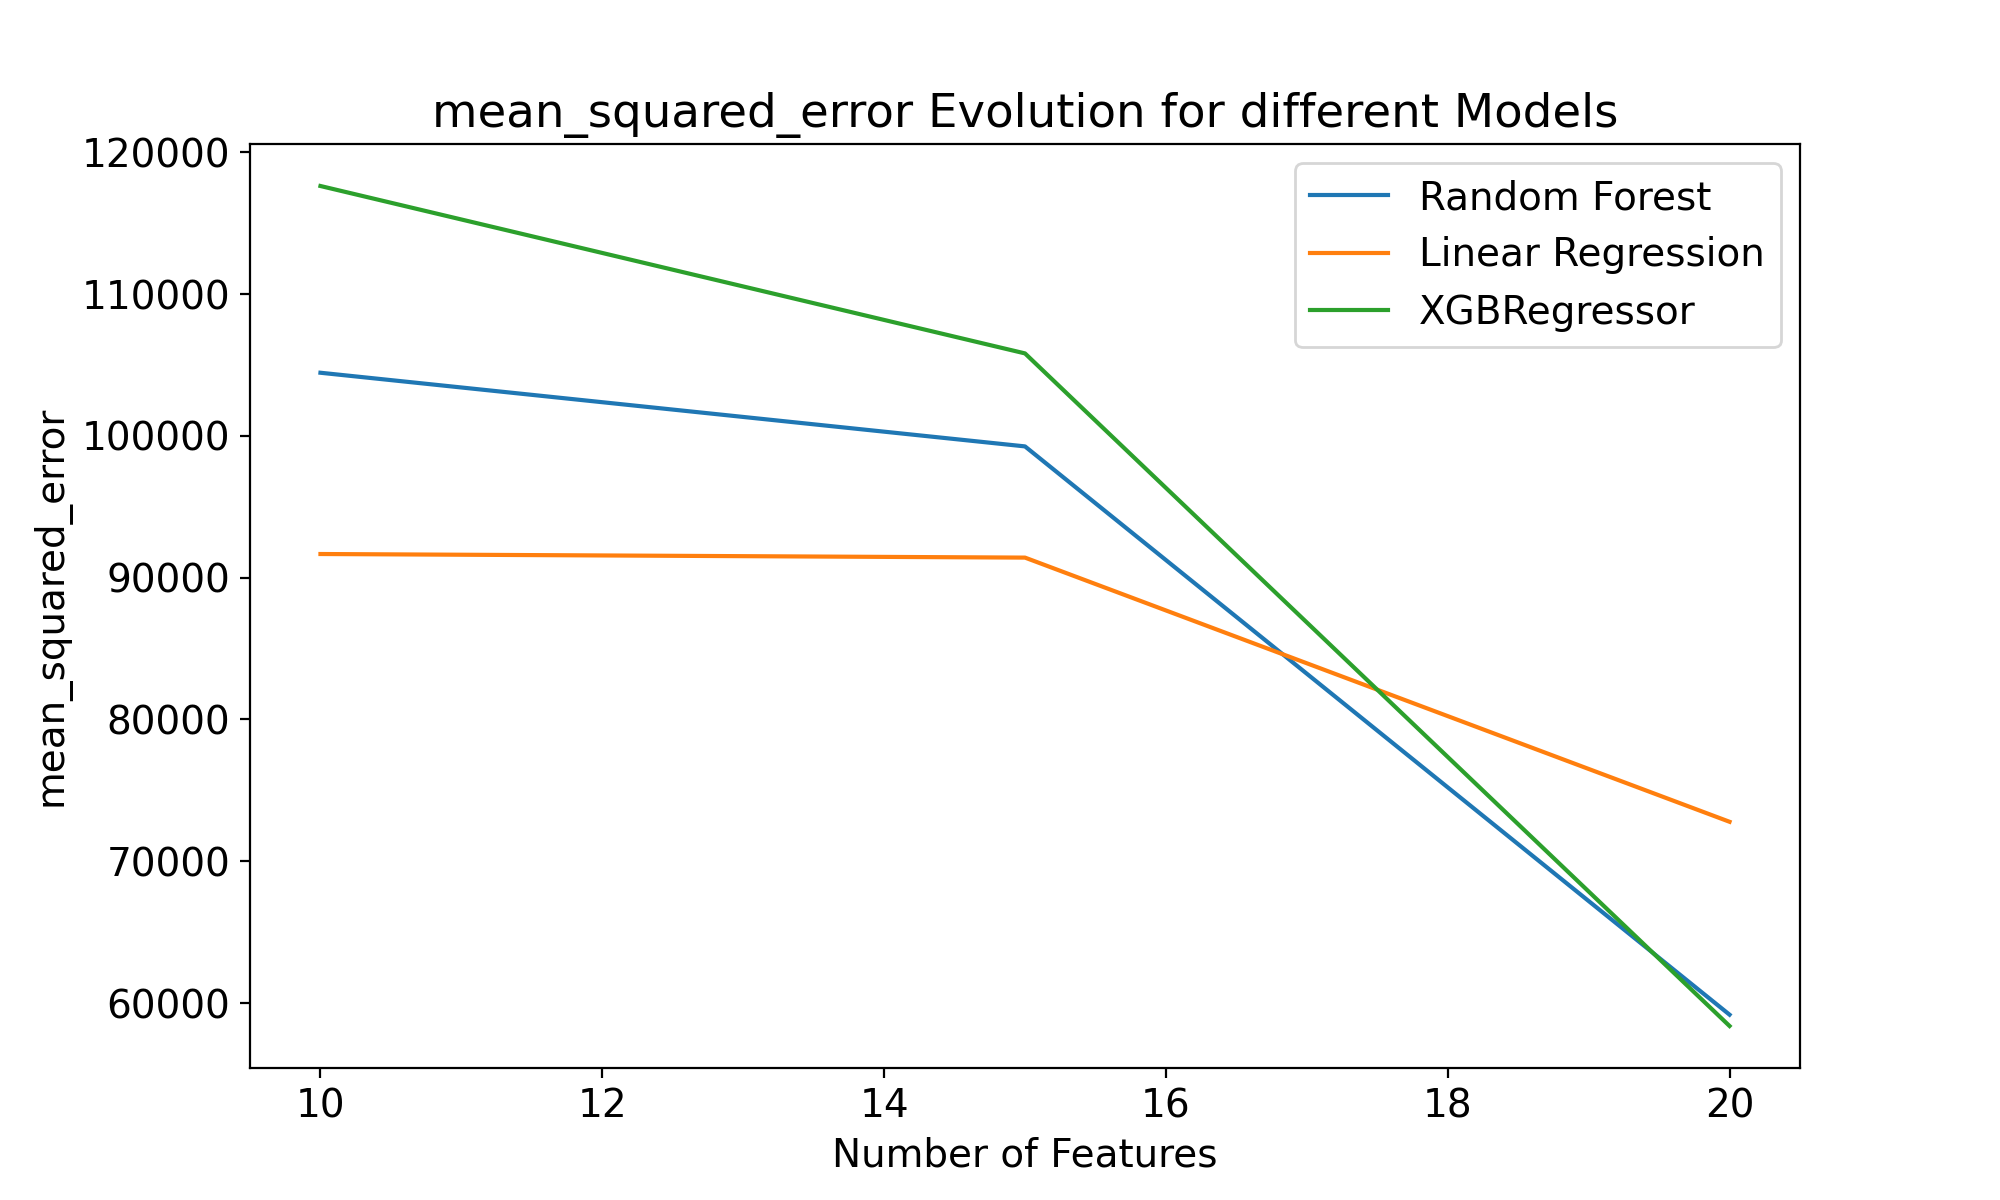

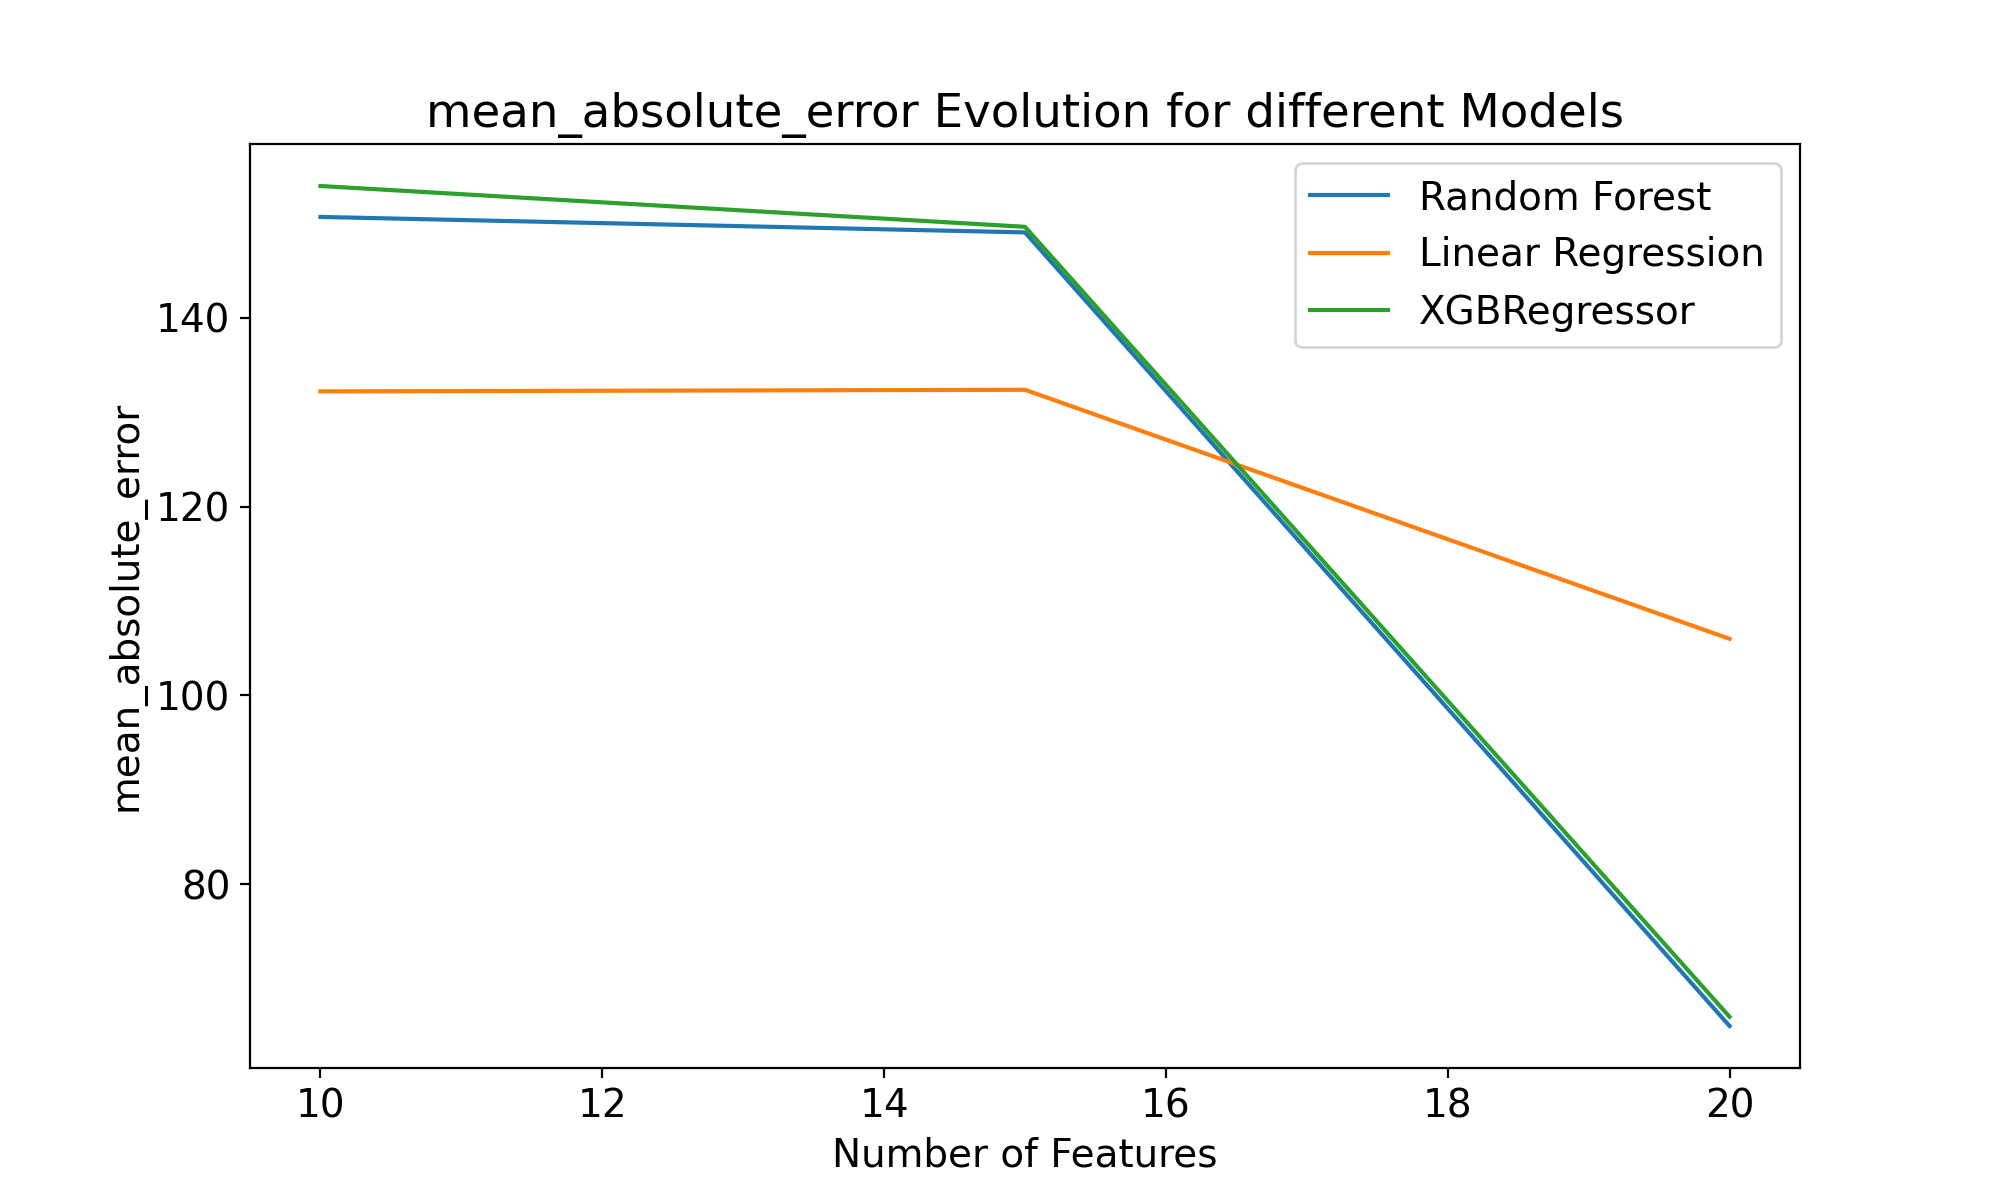

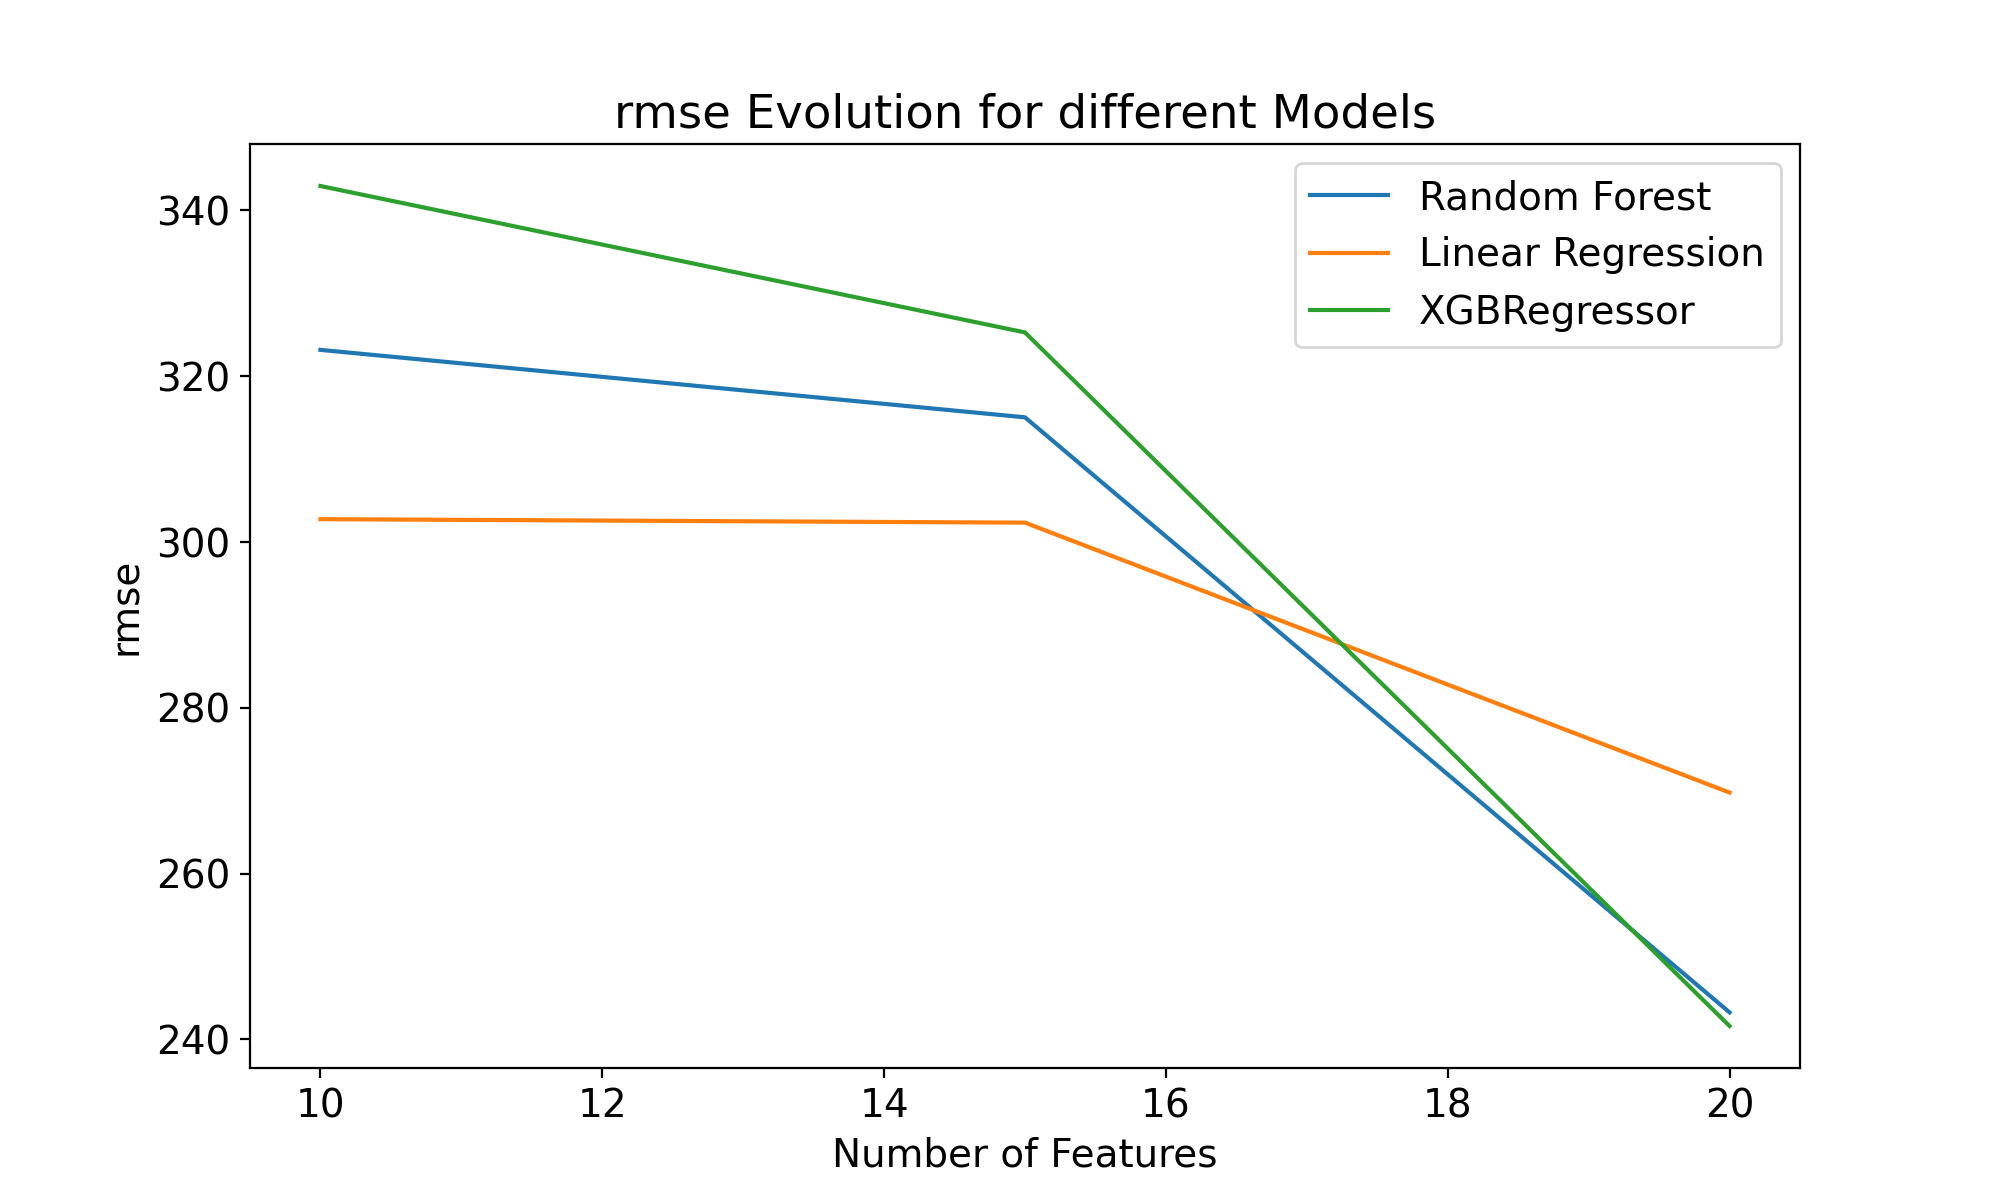

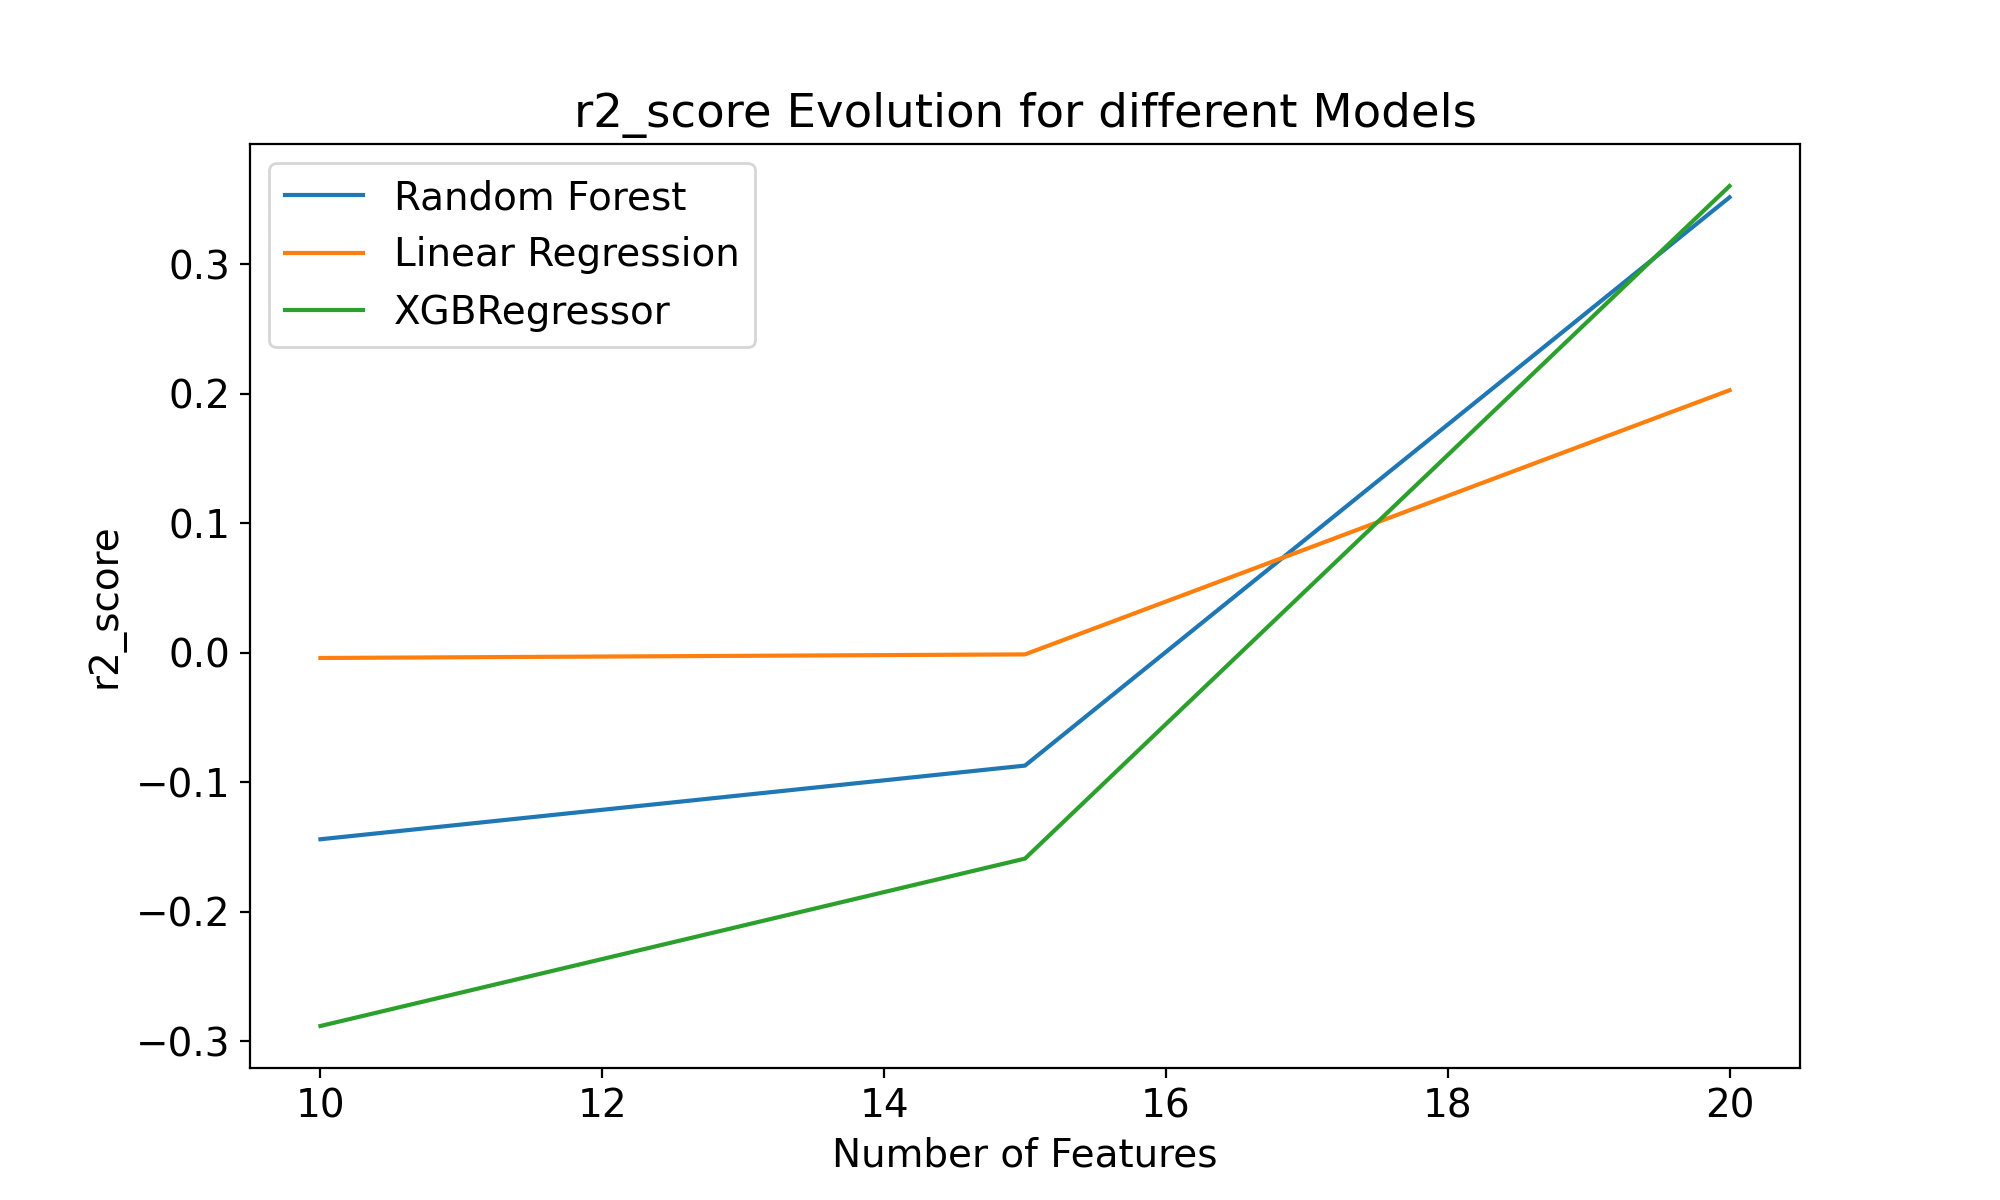

In [113]:
# Plotting Metrics Evolution
metric_names = ['mean_squared_error', 'mean_absolute_error', 'rmse', 'r2_score']
feature_counts = [10, 15, 20]

for metric_name in metric_names:
    plot_metrics_evolution(
        [[metrics_scores_sel_10[metric_name], metrics_scores_sel_15[metric_name], metrics_scores_sel_20[metric_name]],
         [metrics_scores_lin_10[metric_name], metrics_scores_lin_15[metric_name], metrics_scores_lin_20[metric_name]],
         [metrics_scores_xgb_10[metric_name], metrics_scores_xgb_15[metric_name], metrics_scores_xgb_20[metric_name]]],
        ['Random Forest', 'Linear Regression', 'XGBRegressor'],
        feature_counts,
        metric_name
    )

In [114]:
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--k', linewidth=2)
    plt.title(title)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.show()

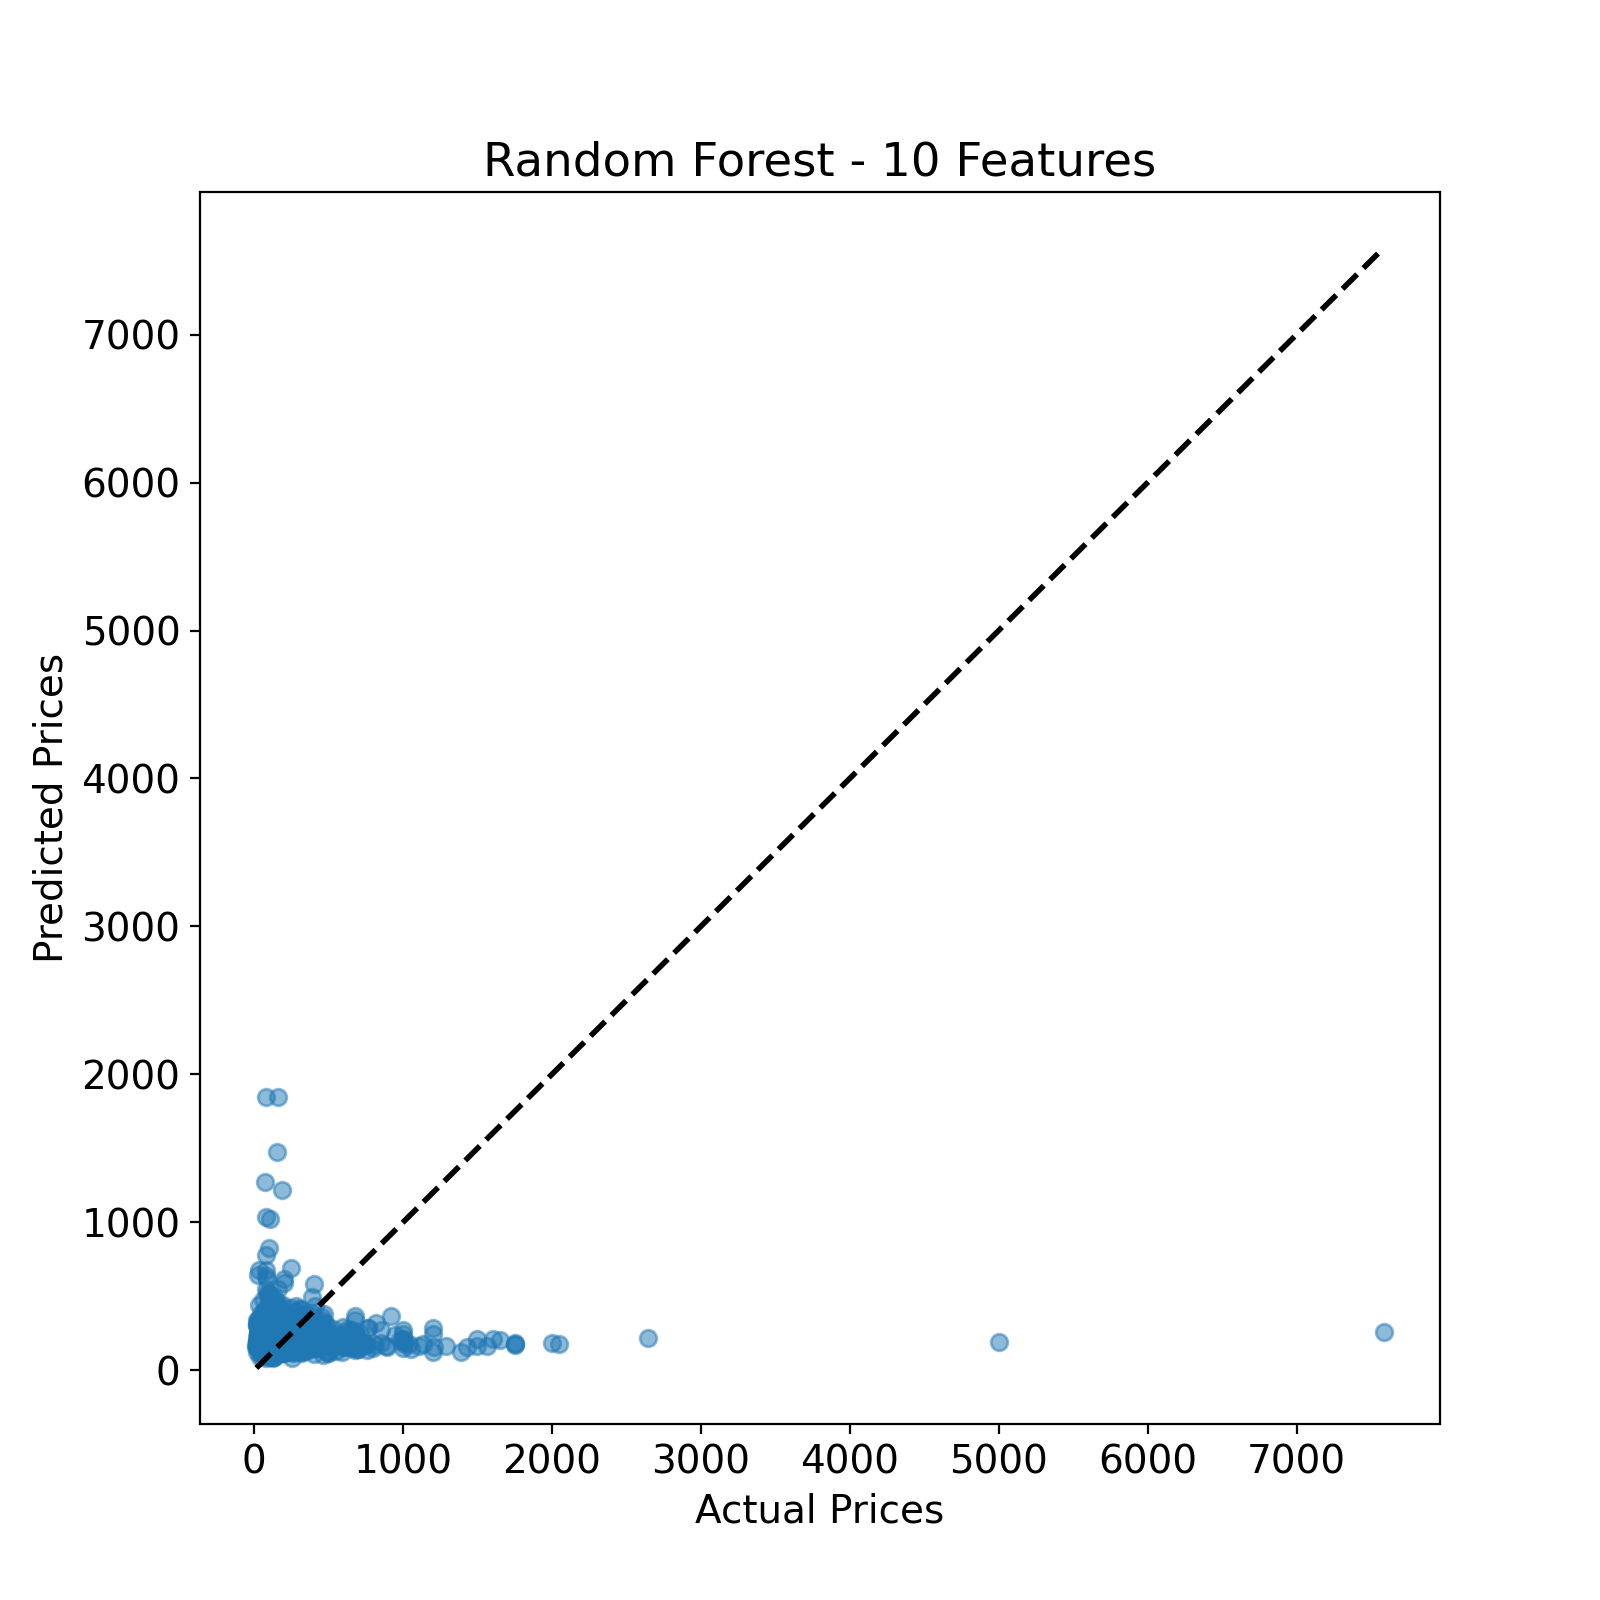

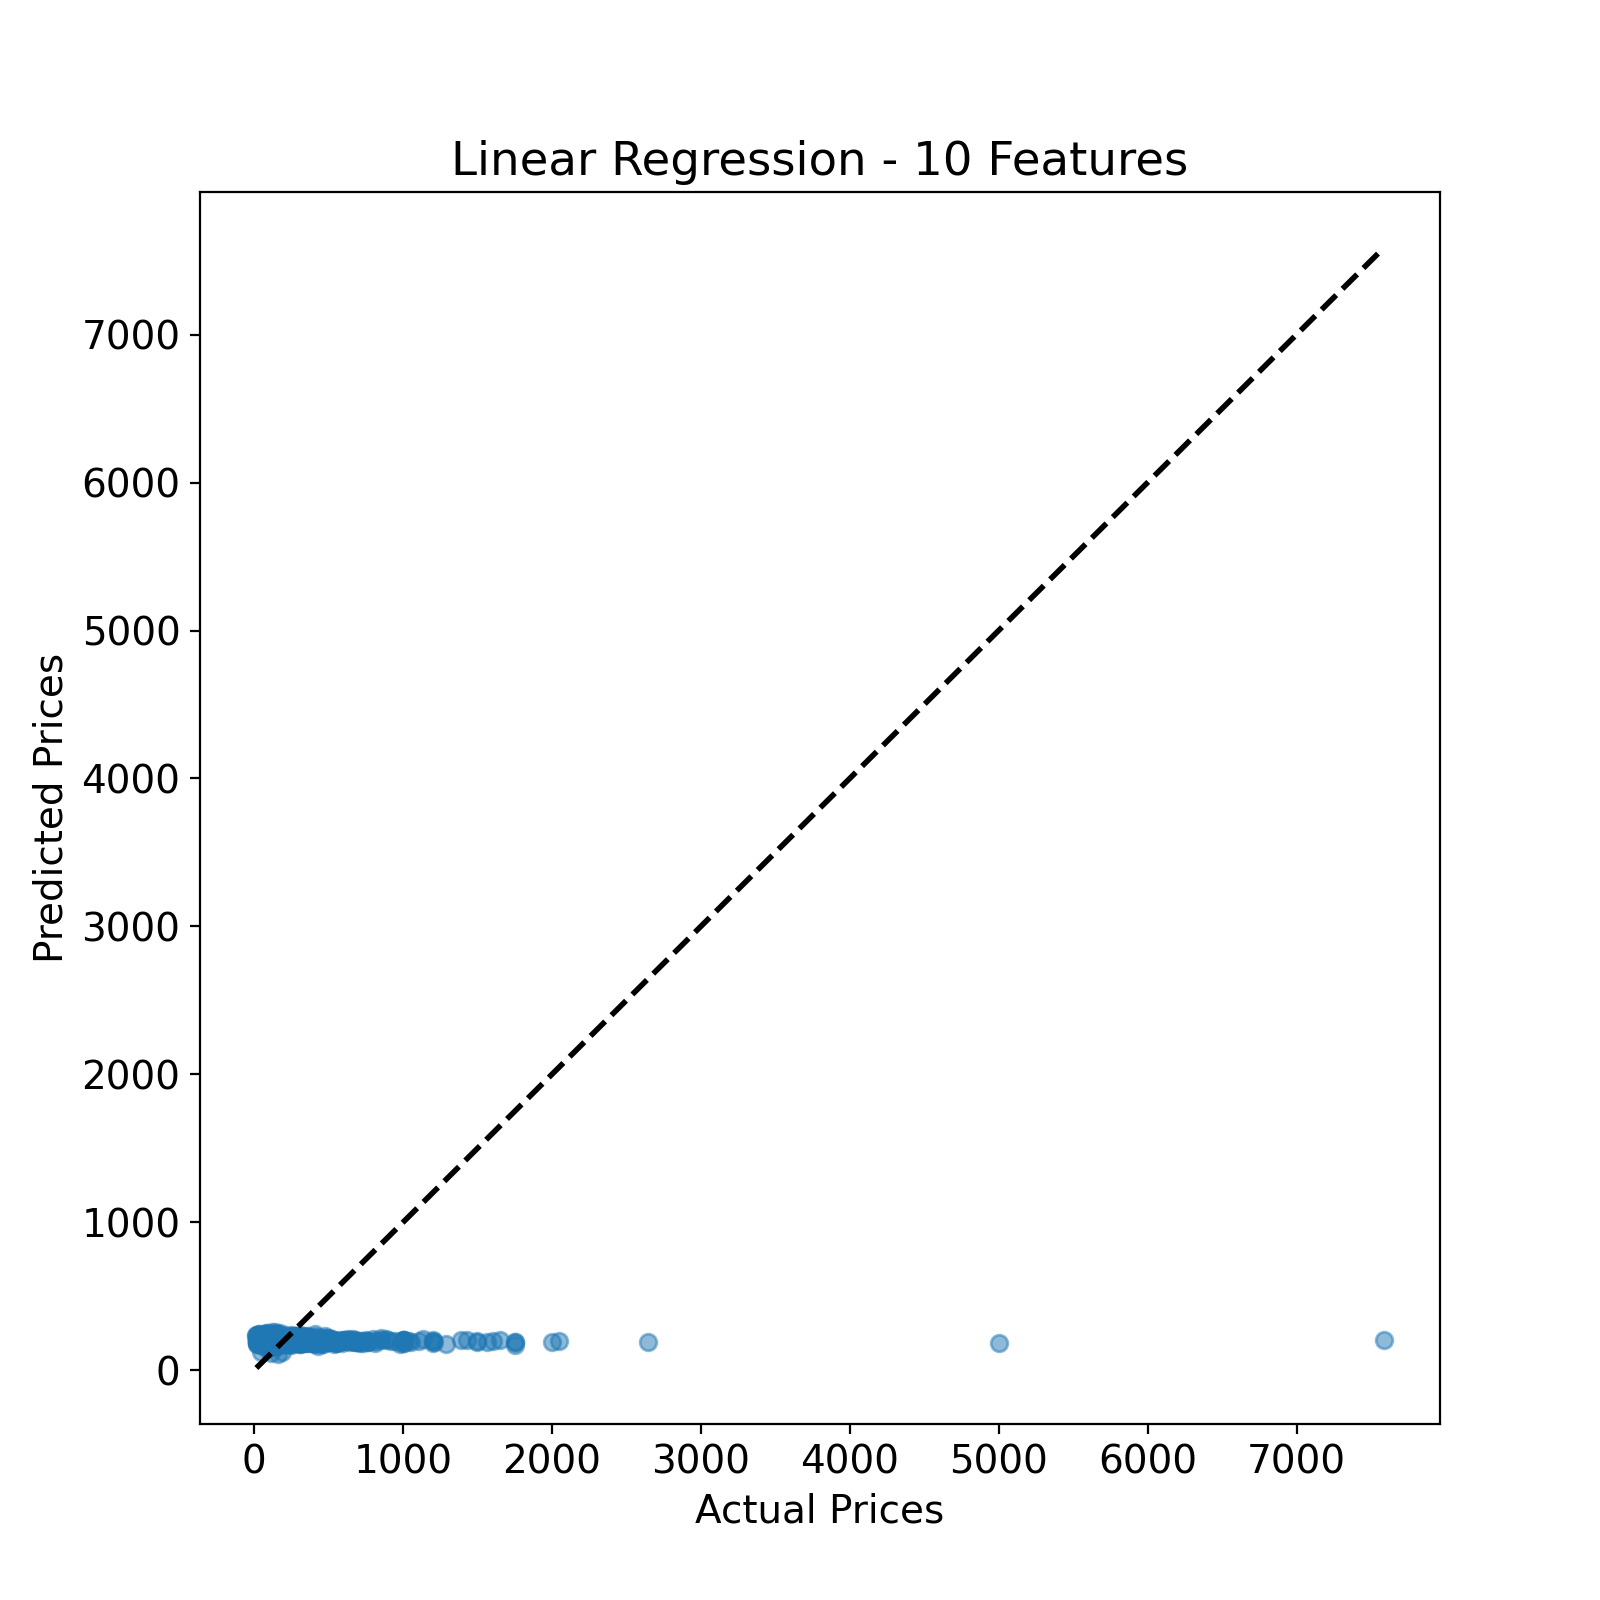

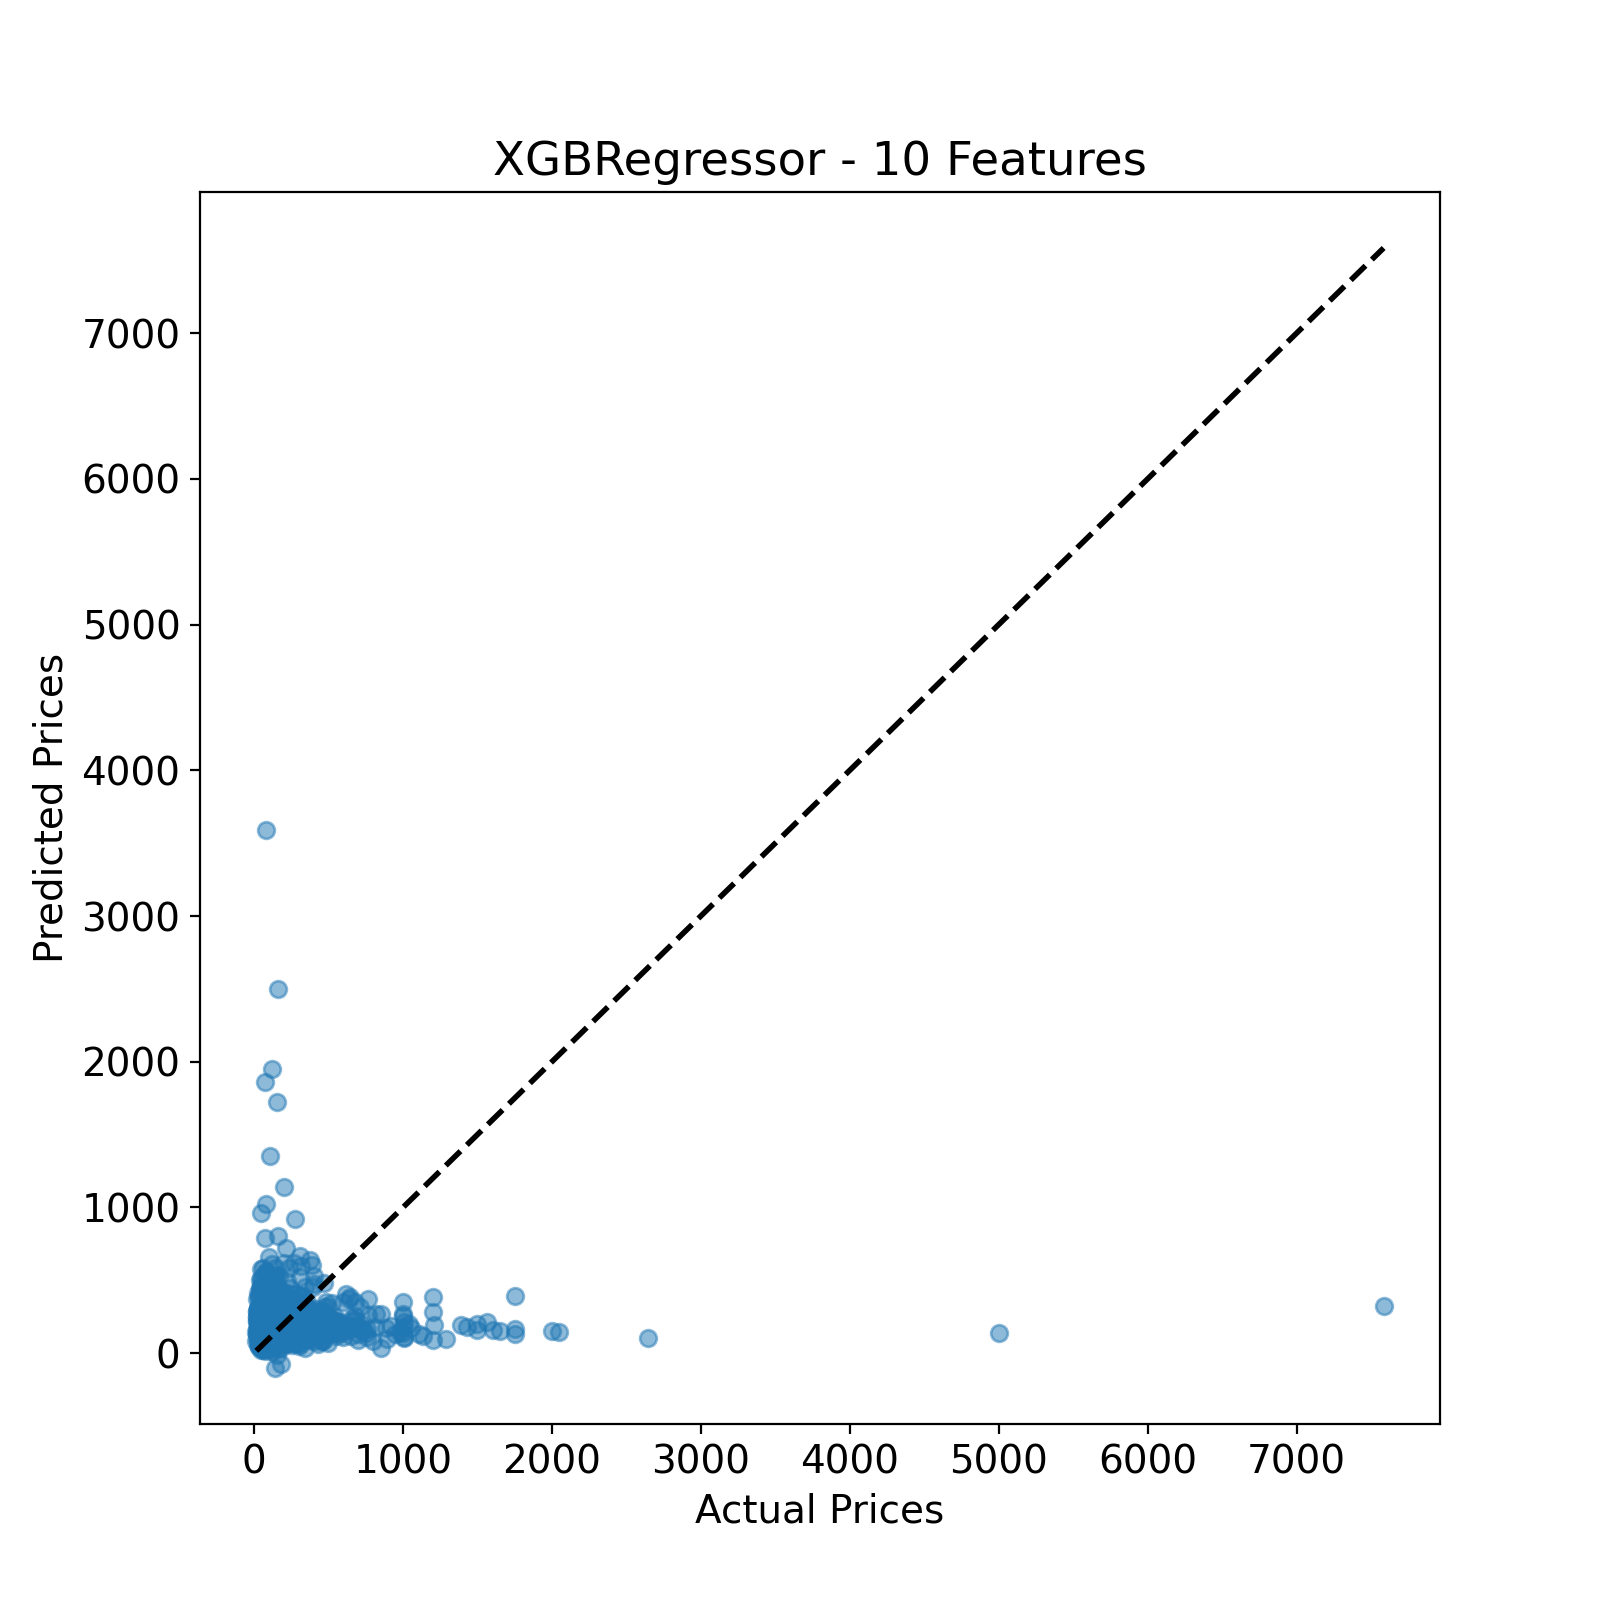

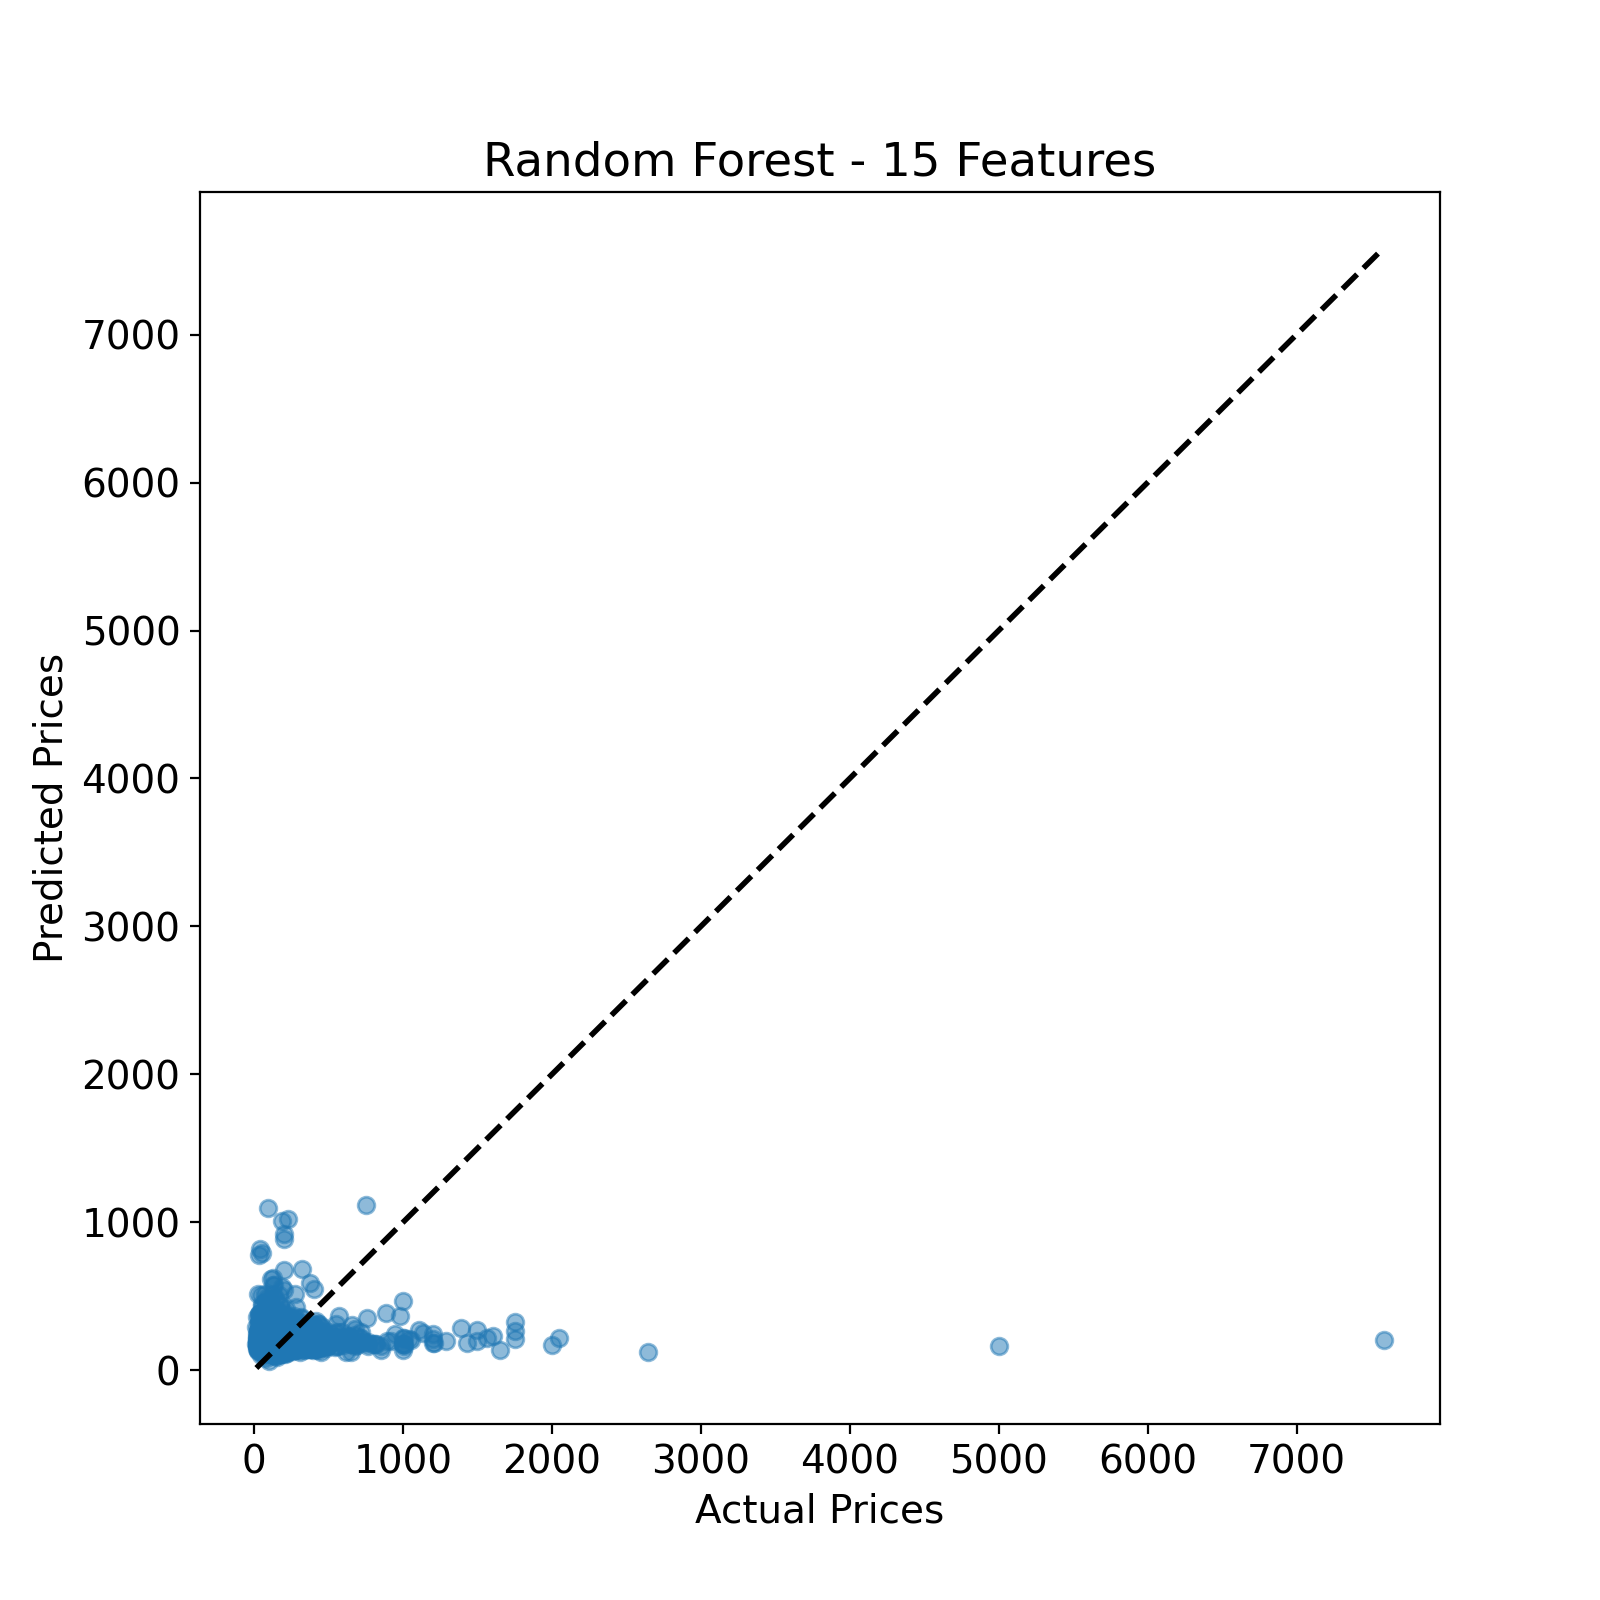

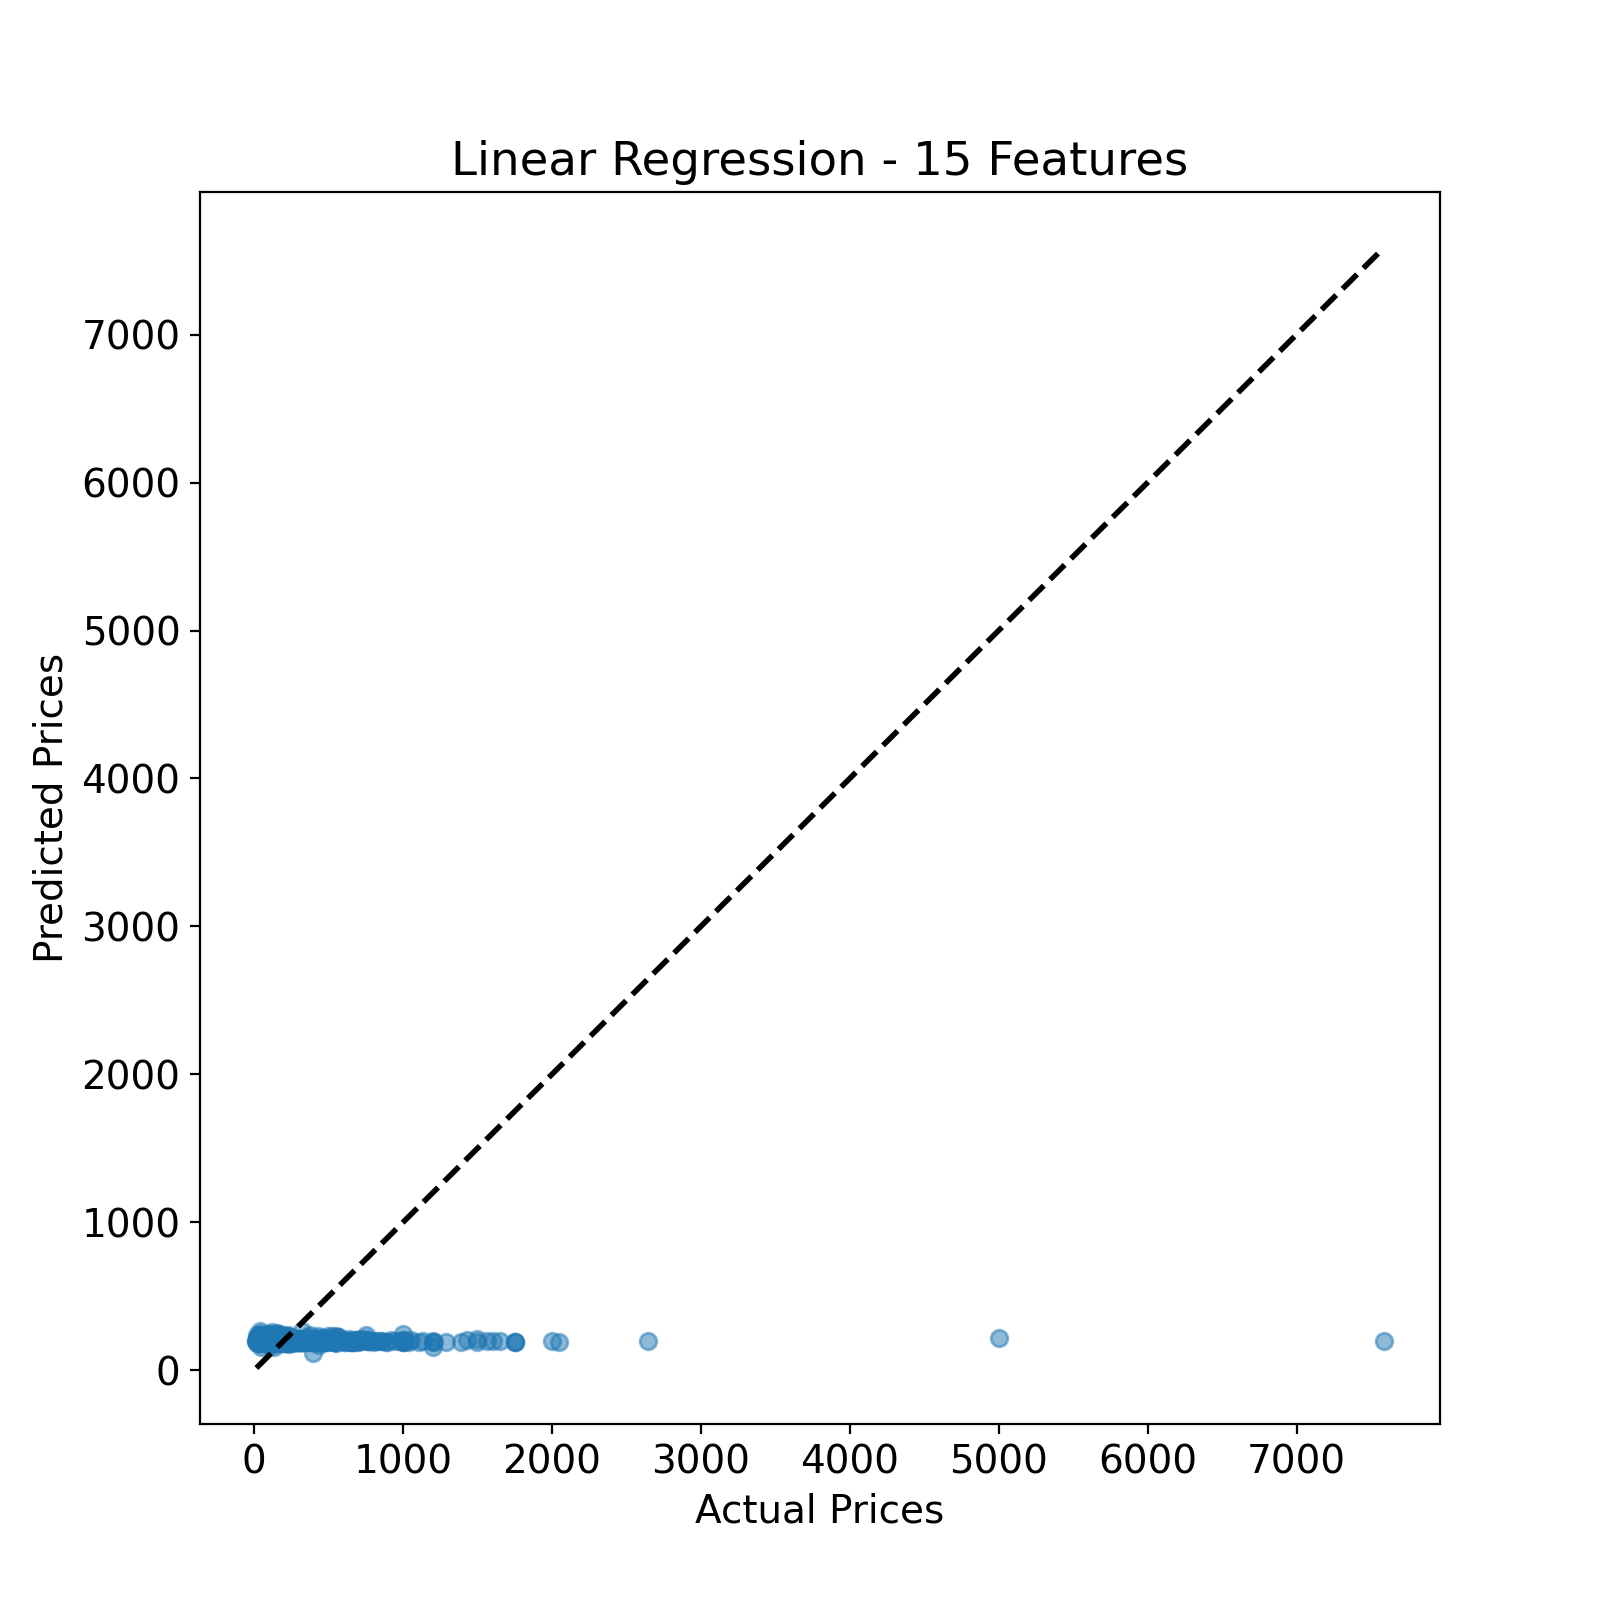

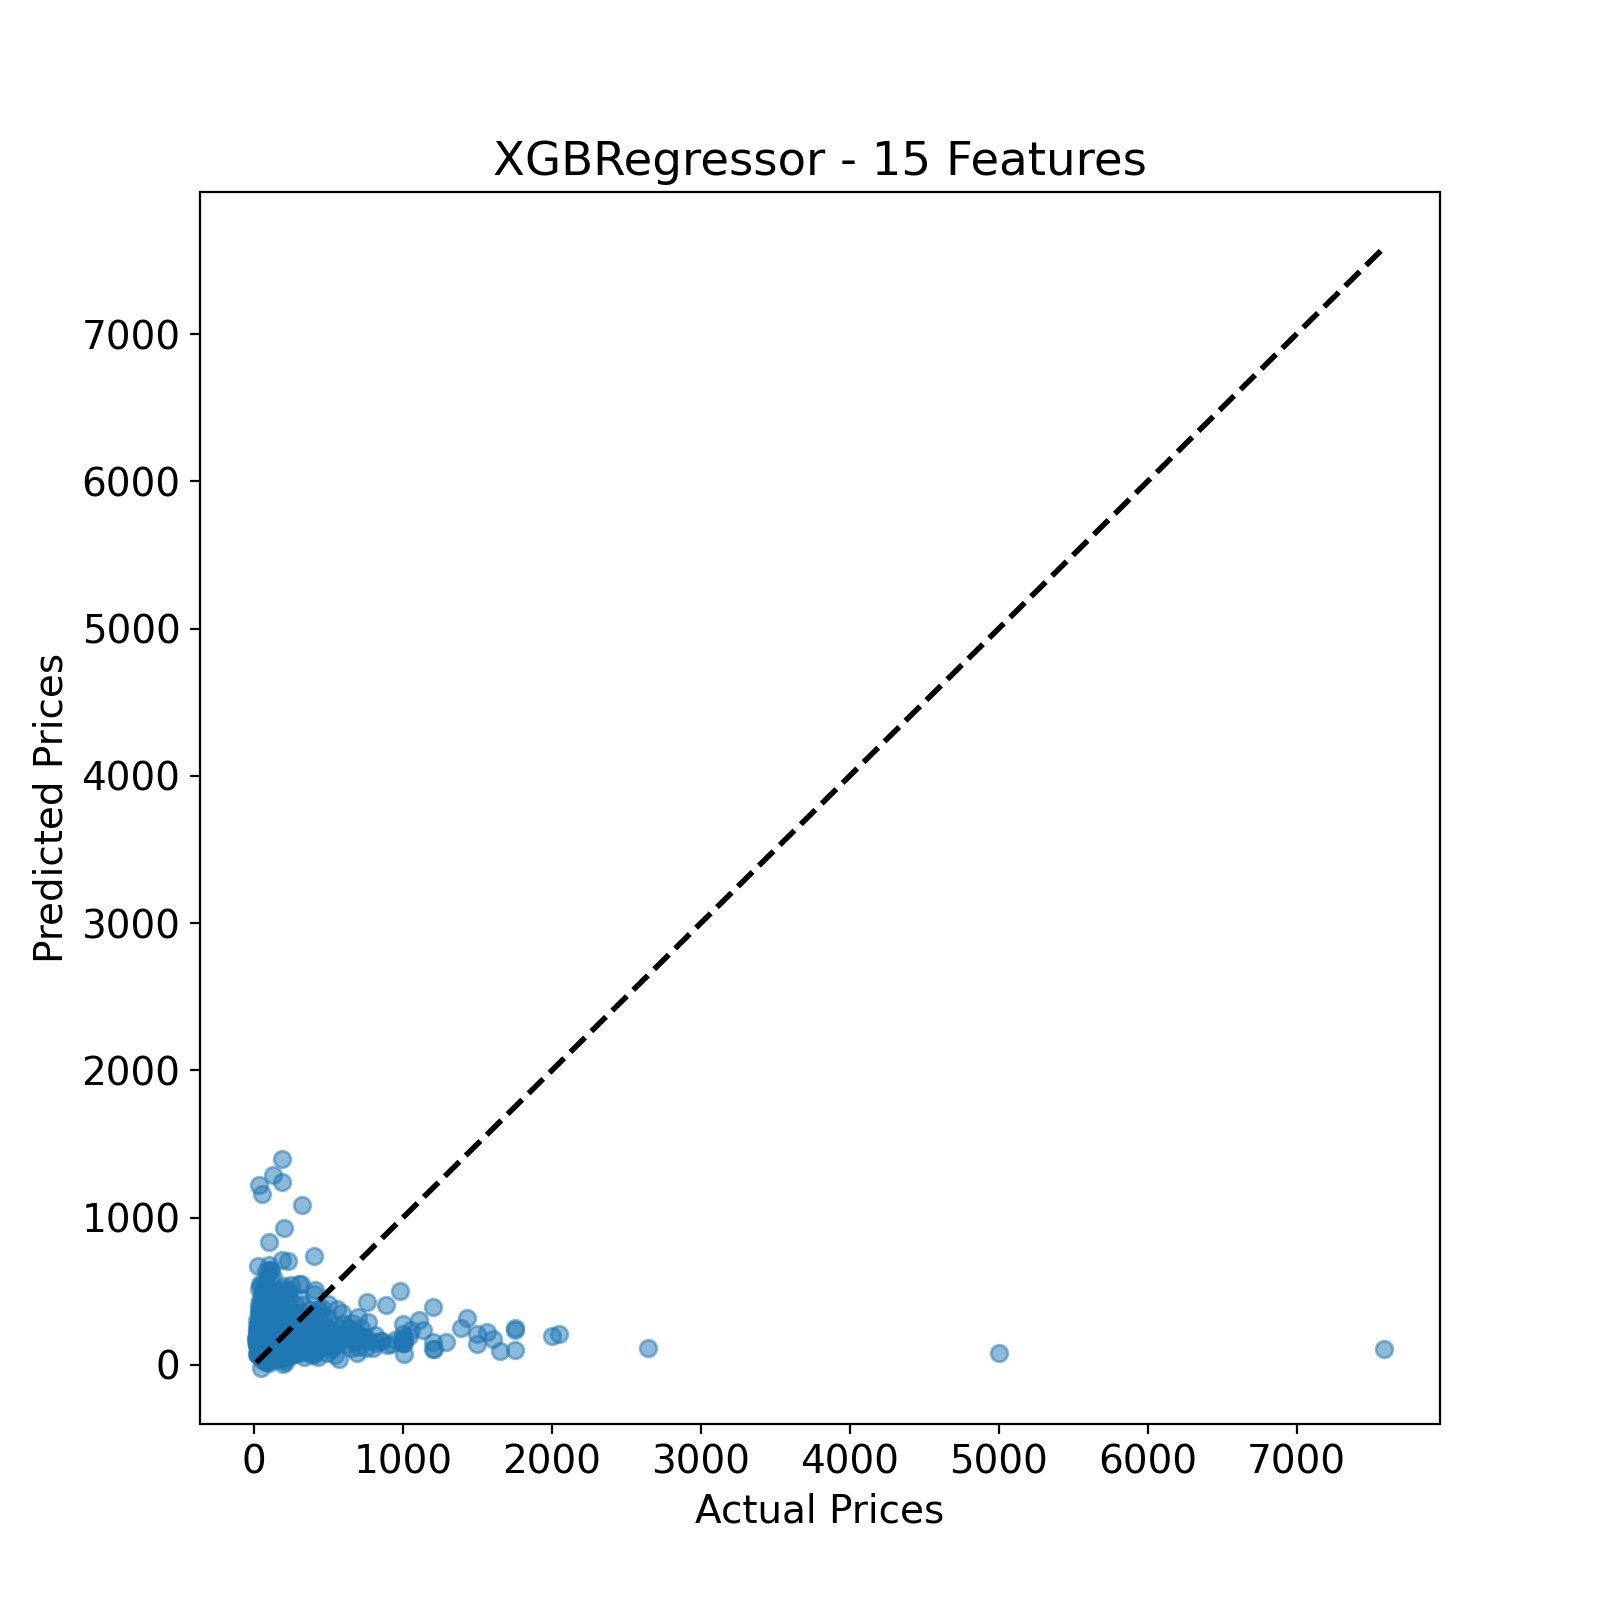

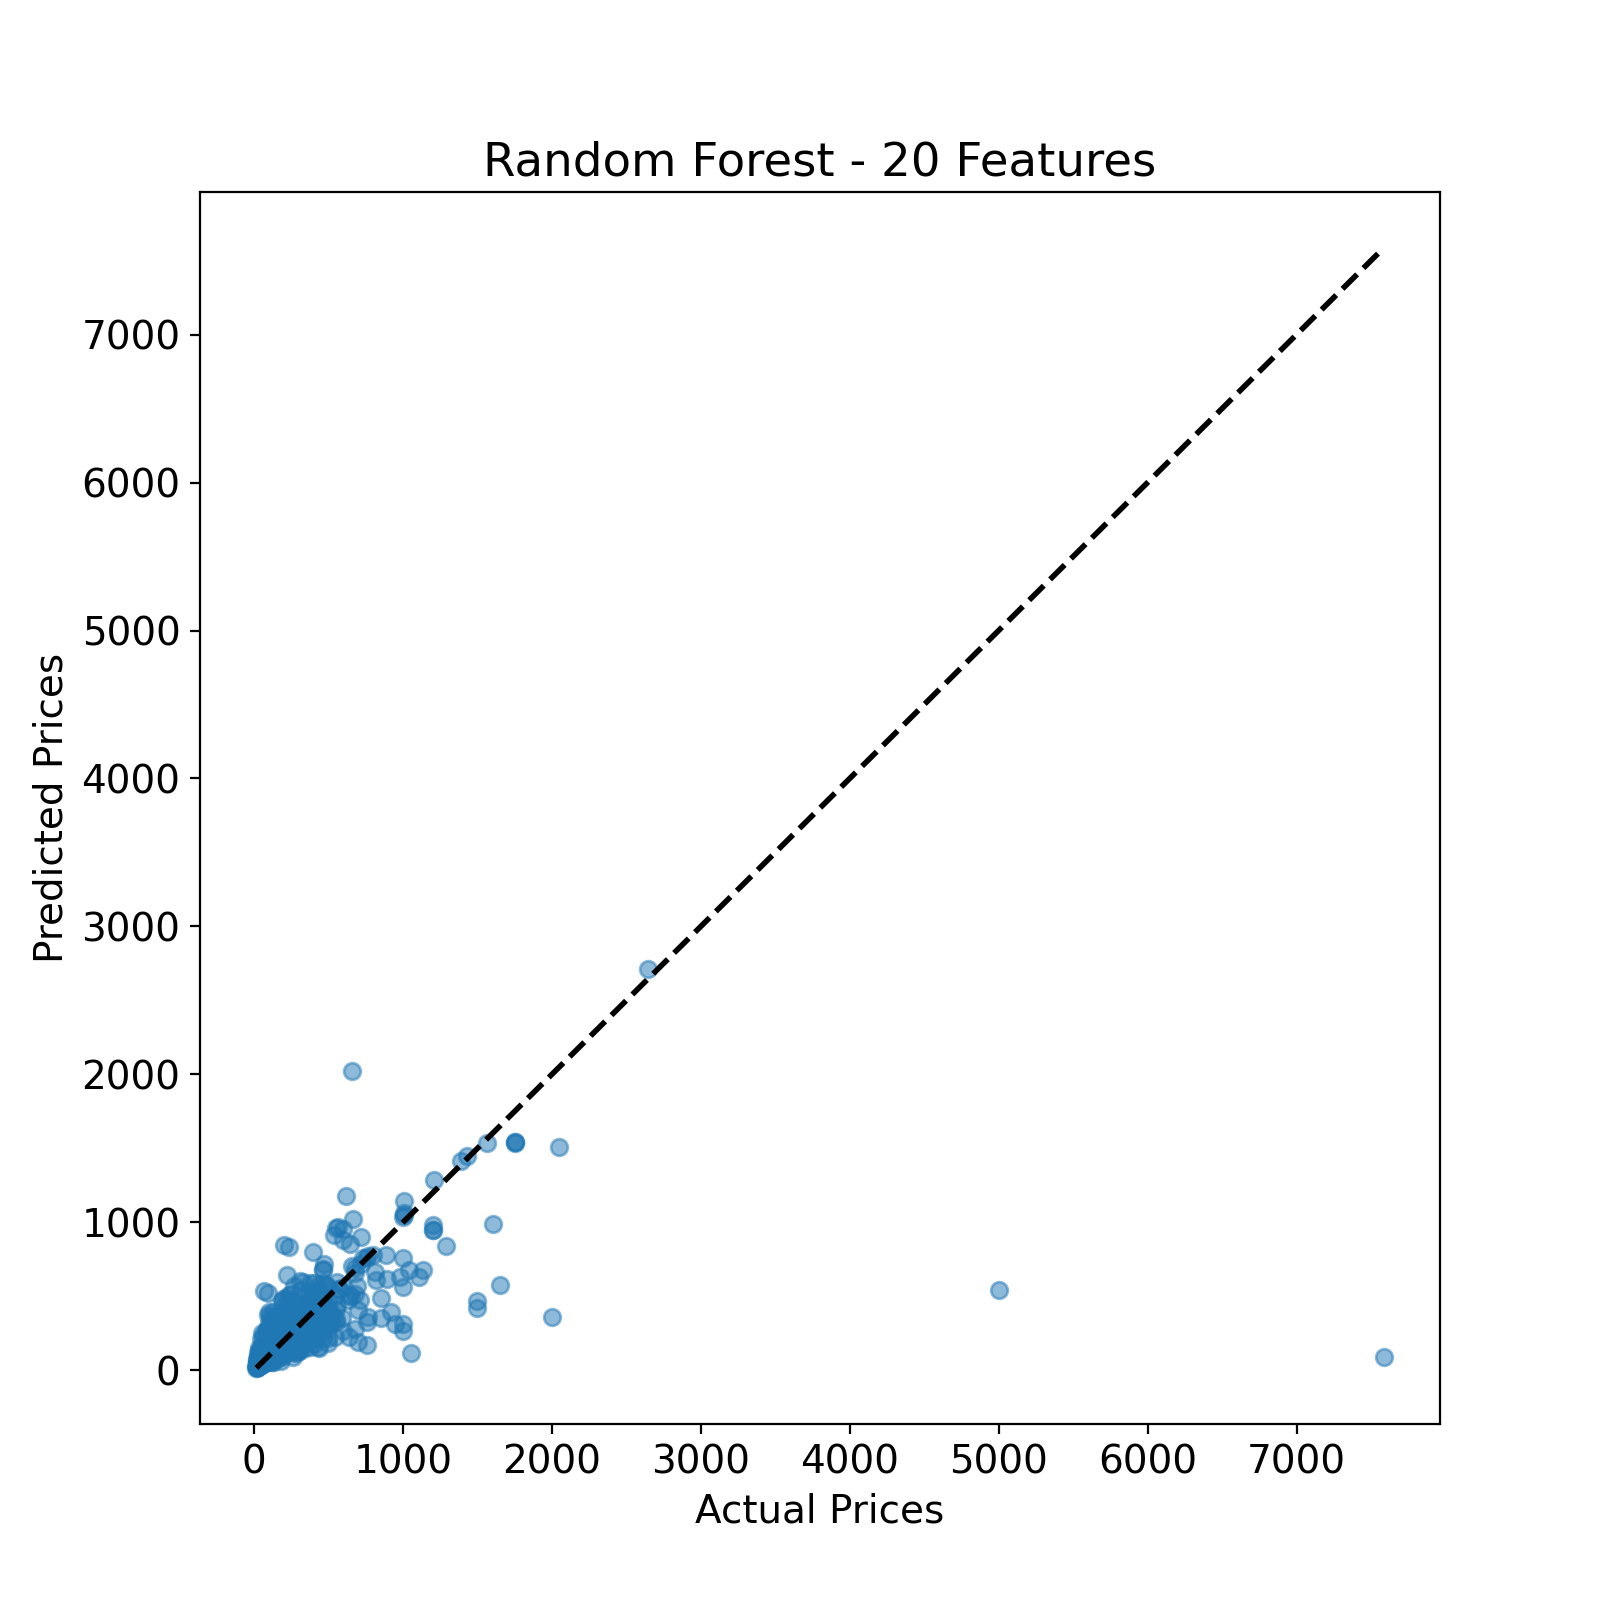

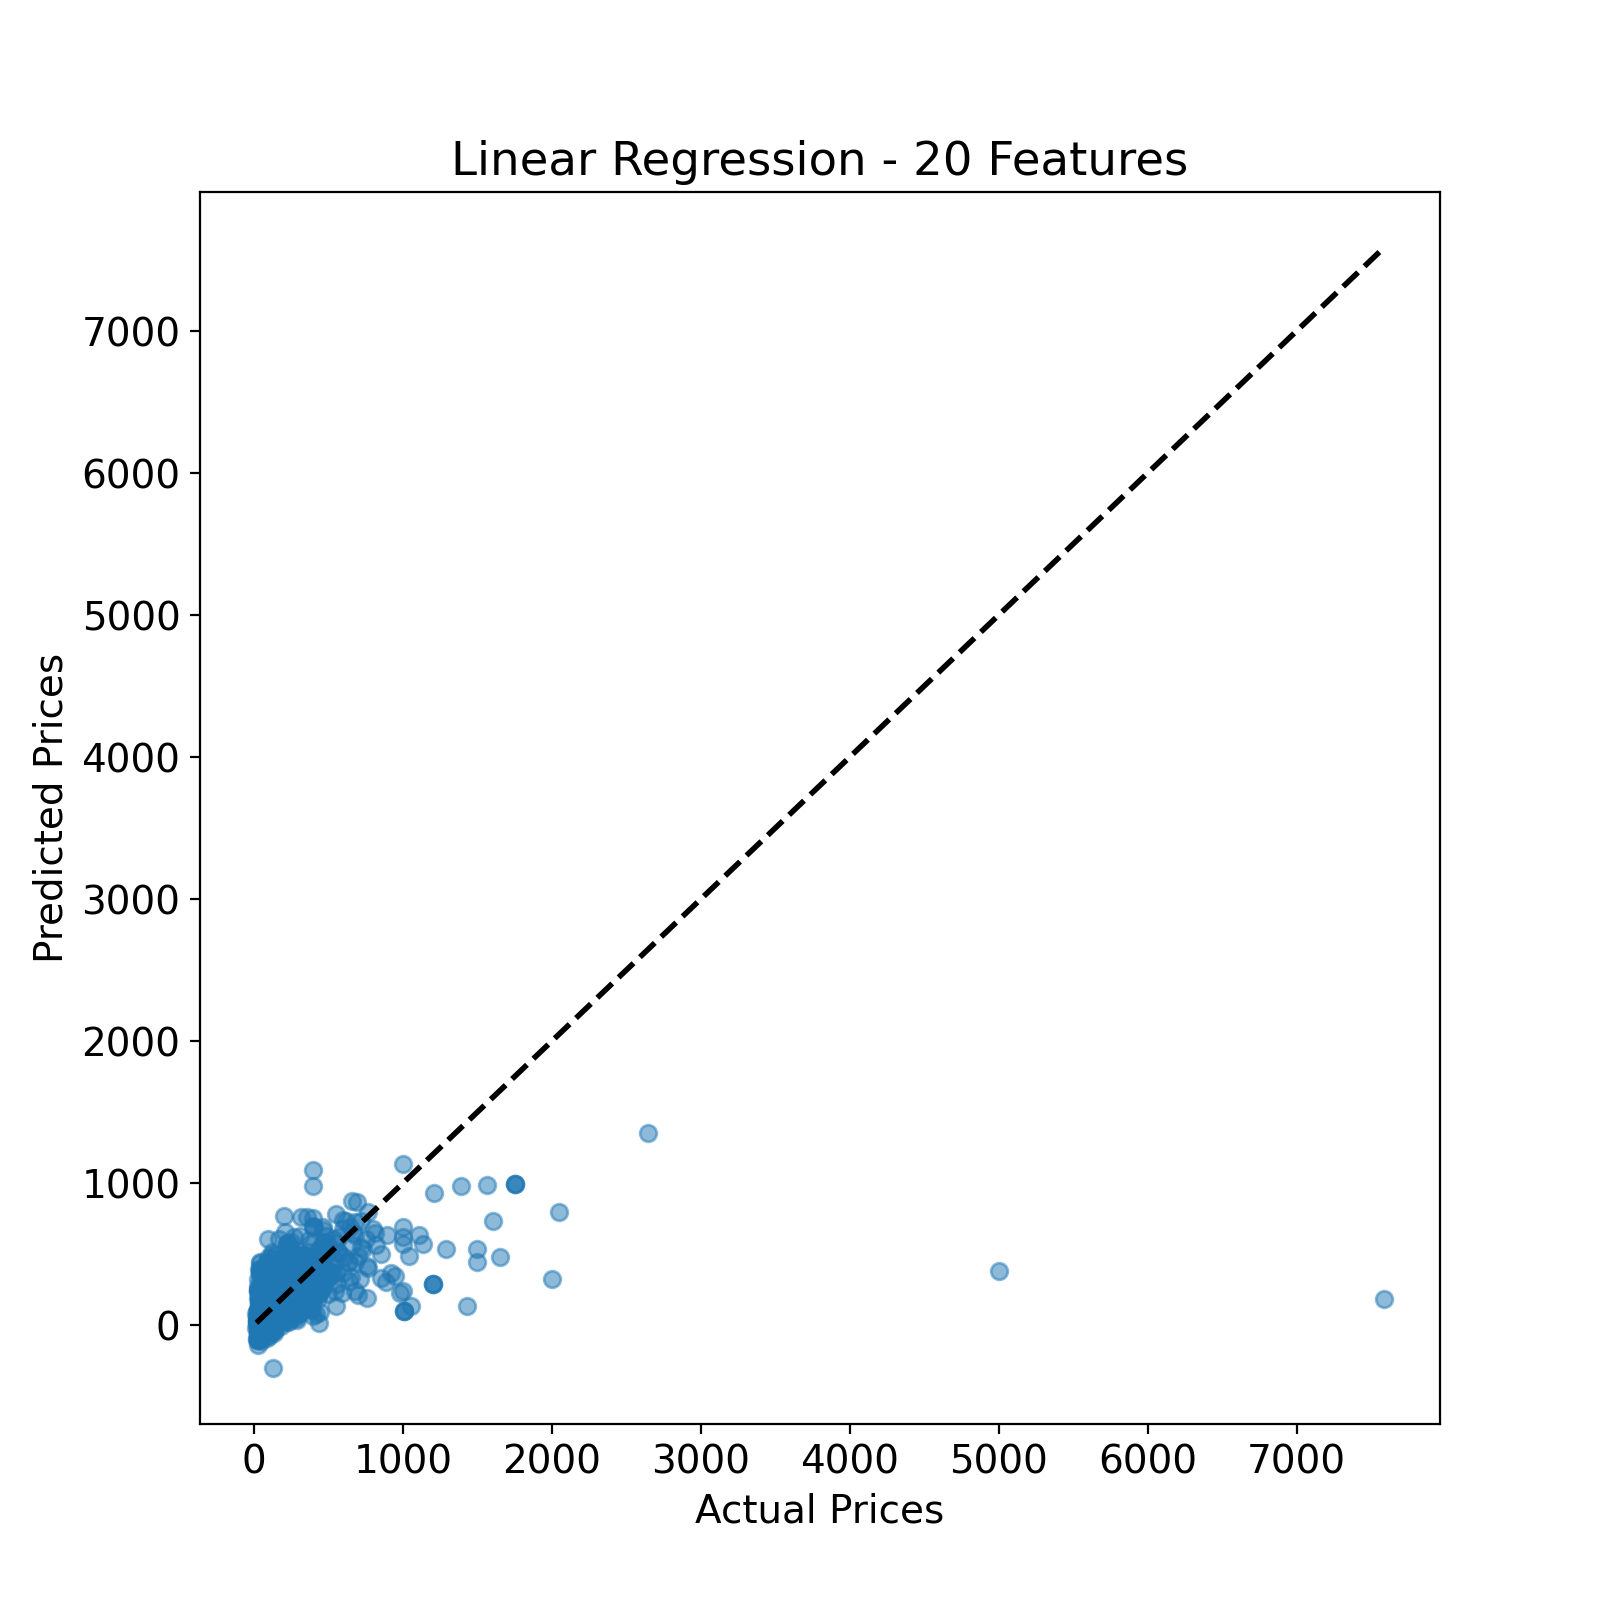

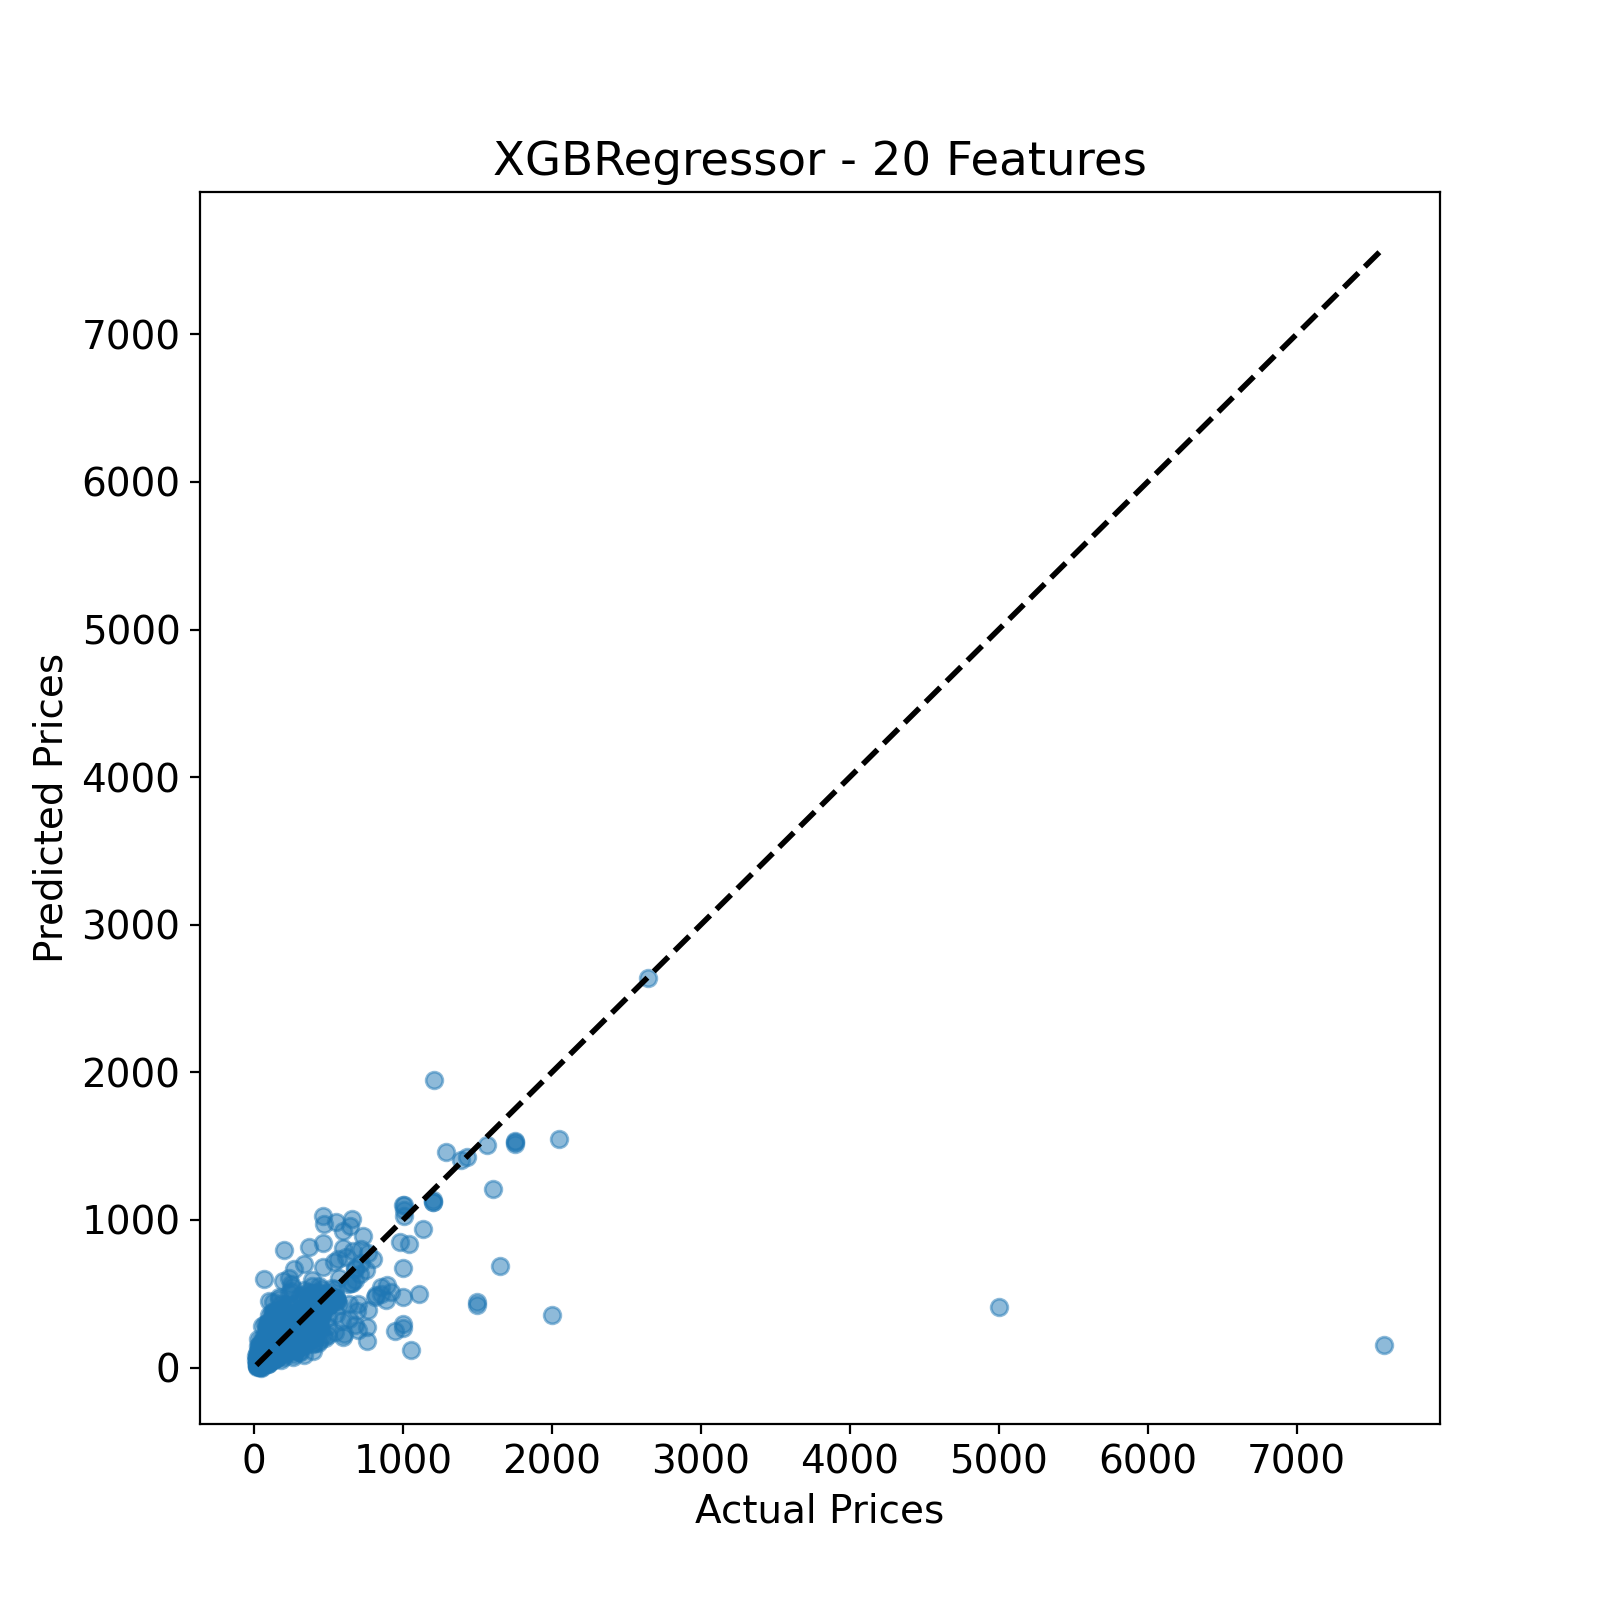

In [115]:
plot_actual_vs_predicted(y_test, y_pred_rf_10, 'Random Forest - 10 Features')
plot_actual_vs_predicted(y_test, y_pred_lin_10, 'Linear Regression - 10 Features')
plot_actual_vs_predicted(y_test, y_pred_xgb_10, 'XGBRegressor - 10 Features')

plot_actual_vs_predicted(y_test, y_pred_rf_15, 'Random Forest - 15 Features')
plot_actual_vs_predicted(y_test, y_pred_lin_15, 'Linear Regression - 15 Features')
plot_actual_vs_predicted(y_test, y_pred_xgb_15, 'XGBRegressor - 15 Features')

plot_actual_vs_predicted(y_test, y_pred_rf_20, 'Random Forest - 20 Features')
plot_actual_vs_predicted(y_test, y_pred_lin_20, 'Linear Regression - 20 Features')
plot_actual_vs_predicted(y_test, y_pred_xgb_20, 'XGBRegressor - 20 Features')

**Analysis**

The analysis aims to predict Airbnb prices using different combinations of features. Three sets of features (10, 15, and 20) were evaluated with the Random Forest, Linear Regression, and XGBRegressor models. The results reveal an improvement in performance with increasing number of features, especially with 20 features. The Random Forest model outperforms the others, showing a net with a positive r2_score, suggesting a better fit to the data.

Potential reasons for these findings could include the inherent complexity of relationships between Airbnb location features and price. Adding more features may have allowed the models, particularly Random Forest, to better capture the variability in the data. However, this can also lead to overfitting to the training data, hence the need for validation on independent test datasets.

Alternatively, the models' moderate performance may be explained by the essentially complex and dynamic nature of the Airbnb rental market, where many factors can influence prices and more likely models are needed to capture these nuances. Parameter adjustments, deeper exploration of features, and use of advanced techniques could also help improve Airbnb price prediction.

## prepare data for d3.js interactive visualization

create a time-series dataset combining airbnb listings and crime incidents for interactive visualization

In [11]:
import json
from datetime import datetime
import numpy as np

print("preparing data for d3.js visualization...")

# prepare airbnb data
airbnb_prep = df_listings.copy()
airbnb_prep = airbnb_prep.dropna(subset=['price', 'latitude', 'longitude'])
airbnb_prep['price'] = airbnb_prep['price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
airbnb_prep = airbnb_prep[airbnb_prep['price'] <= 10000]
airbnb_prep['date'] = pd.to_datetime(airbnb_prep['last_scraped'])
airbnb_prep['year'] = airbnb_prep['date'].dt.year
airbnb_prep['quarter'] = airbnb_prep['date'].dt.quarter
airbnb_prep['year_quarter'] = airbnb_prep['year'].astype(str) + '-Q' + airbnb_prep['quarter'].astype(str)

# prepare crime data - ALL CRIME TYPES, quarterly aggregation
crime_prep = df_crime.copy()
crime_prep['Date'] = pd.to_datetime(crime_prep['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
crime_prep = crime_prep[crime_prep['Date'].dt.year >= 2018]
# remove domestic crimes only
crime_prep = crime_prep[~crime_prep['Domestic']]
crime_prep = crime_prep[
    (crime_prep['latitude'] >= 41) & 
    (crime_prep['latitude'] <= 42.5) & 
    (crime_prep['longitude'] >= -88.5) & 
    (crime_prep['longitude'] <= -87)
]
# sample 10% of crimes for visualization (to reduce file size)
crime_prep = crime_prep.sample(frac=0.10, random_state=42)
crime_prep['year'] = crime_prep['Date'].dt.year
crime_prep['quarter'] = crime_prep['Date'].dt.quarter
crime_prep['year_quarter'] = crime_prep['year'].astype(str) + '-Q' + crime_prep['quarter'].astype(str)

print(f"airbnb records: {len(airbnb_prep)}")
print(f"crime records (all types): {len(crime_prep)}")
print(f"crime types: {crime_prep['Primary Type'].nunique()}")
print(f"top crime types: {crime_prep['Primary Type'].value_counts().head(5).to_dict()}")
print(f"date range: {crime_prep['Date'].min()} to {crime_prep['Date'].max()}")

preparing data for d3.js visualization...
airbnb records: 8528
crime records (all types): 114279
crime types: 32
top crime types: {'THEFT': 29945, 'CRIMINAL DAMAGE': 13678, 'BATTERY': 11684, 'DECEPTIVE PRACTICE': 9883, 'MOTOR VEHICLE THEFT': 8681}
date range: 2018-01-01 00:00:00 to 2024-01-03 00:00:00


In [17]:
import json

# get all unique periods (quarters) from crime data
periods = sorted(list(crime_prep['year_quarter'].unique().tolist()))

# airbnb data is a snapshot (all from one scrape date)
# store locations once to avoid duplication
airbnb_locations = []
for _, row in airbnb_prep.iterrows():
    airbnb_locations.append({
        'lat': float(row['latitude']),
        'lon': float(row['longitude']),
        'price': float(row['price']),
        'room_type': str(row['room_type']),
        'neighborhood': str(row.get('neighbourhood_cleansed', 'Unknown'))
    })

# aggregate crime data by quarter
crime_by_period = []
for period in periods:
    period_data = crime_prep[crime_prep['year_quarter'] == period]
    if len(period_data) > 0:
        locations = []
        for _, row in period_data.iterrows():
            locations.append({
                'lat': float(row['latitude']),
                'lon': float(row['longitude']),
                'type': str(row['Primary Type']),
                'description': str(row.get('Description', ''))
            })
        crime_by_period.append({
            'period': period,
            'count': len(period_data),
            'locations': locations
        })

# create bounds
all_lats = list(airbnb_prep['latitude']) + list(crime_prep['latitude'])
all_lons = list(airbnb_prep['longitude']) + list(crime_prep['longitude'])

chicago_data = {
    'periods': periods,
    'airbnb': {
        'count': len(airbnb_locations),
        'locations': airbnb_locations,
        'note': 'snapshot from 2023-Q3 scrape, same for all periods'
    },
    'crimes': crime_by_period,
    'bounds': {
        'lat_min': float(min(all_lats)),
        'lat_max': float(max(all_lats)),
        'lon_min': float(min(all_lons)),
        'lon_max': float(max(all_lons))
    }
}

# save to file
with open('data/chicago_timeseries.json', 'w') as f:
    json.dump(chicago_data, f, indent=2)

print(f"exported {len(periods)} quarterly periods")
print(f"periods: {periods[:3]} ... {periods[-3:]}")
print(f"airbnb listings: {len(airbnb_locations)} (snapshot, same for all periods)")
print(f"total crime incidents: {sum([p['count'] for p in crime_by_period])}")

# check file size
import os
file_size_mb = os.path.getsize('data/chicago_timeseries.json') / (1024 * 1024)
print(f"file size: {file_size_mb:.2f} MB")

exported 25 quarterly periods
periods: ['2018-Q1', '2018-Q2', '2018-Q3'] ... ['2023-Q3', '2023-Q4', '2024-Q1']
airbnb listings: 8528 (snapshot, same for all periods)
total crime incidents: 114279
file size: 18.89 MB


In [18]:
import shutil

shutil.copy('data/chicago_timeseries.json', 'src/data/chicago_timeseries.json')
print("✅ data synced to src/data/ for parcel bundler")

✅ data synced to src/data/ for parcel bundler


## view the interactive map visualization

**important**: run the data sync cell above to copy data to `src/data/` folder

### start the visualization

**recommended method: python http server**

```bash
python3 -m http.server 8000
```

then open: **http://localhost:8000/src/chicago-map.html**

this serves files directly without transformation, ensuring json files load correctly.

**alternative: parcel bundler (requires additional setup)**

```bash
npm run dev
```

note: parcel may transform json files, causing loading issues. use python server for reliability.

### visualization features

**geographic context**:
- 98 chicago neighborhoods with interactive boundaries
- accurate mercator projection centered on chicago
- neighborhood names on hover

**data visualization**:
- 8,528 airbnb listings (green dots, size scales with price)
- 3,783 crime incidents (red dots, homicides only)
- 73 monthly time periods (2018-01 to 2024-01)

**interactive controls**:
- **zoom**: scroll wheel (1x to 20x magnification)
- **pan**: click and drag to move around map
- **reset view**: click 🔍 button to return to default
- **play/pause**: ▶️/⏸️ for automatic time progression
- **timeline**: click anywhere to jump to that period
- **tooltips**: hover over dots or neighborhoods for details

### troubleshooting

if you see json parsing errors:
1. ensure data sync cell was run
2. use python http server (not parcel)
3. hard refresh browser (cmd+shift+r or ctrl+shift+r)

## download chicago geojson for map visualization (optional)

this will download the chicago neighborhood boundaries for the d3.js map

In [23]:
import requests
import json

url = "https://raw.githubusercontent.com/blackmad/neighborhoods/master/chicago.geojson"

try:
    response = requests.get(url)
    response.raise_for_status()
    
    geojson_data = response.json()
    
    with open('data/chicago_neighborhoods.geojson', 'w') as f:
        json.dump(geojson_data, f)
    
    print(f"✅ chicago neighborhoods geojson saved")
    print(f"features: {len(geojson_data['features'])} neighborhoods")
except Exception as e:
    print(f"⚠️ could not download geojson: {e}")
    print("visualization will use simplified boundary instead")

✅ chicago neighborhoods geojson saved
features: 98 neighborhoods
